### Cleaning and merging data 
### Aggregate the data:

Count the number of EVs per state.

Count the number of charging stations per state.

Combine this with each state’s median household income.

In [36]:
import pandas as pd
import numpy as np

# Load datasets
ev = pd.read_csv(r"C:\Users\palicher\Downloads\DATA\Electric_Vehicle_Population_Data.csv")
stations = pd.read_csv(r"C:\Users\palicher\Downloads\DATA\alt_fuel_stations (Oct 12 2025).csv", low_memory=False)
income = pd.read_csv(r"C:\Users\palicher\Downloads\DATA\ACSST1Y2024.S1903-Data.csv")

# Check data shapes
print("EV dataset shape:", ev.shape)
print("Charging dataset shape:", stations.shape)
print("Income dataset shape:", income.shape)
print("EV Columns:", ev.columns.tolist())
print("Charging Columns:", stations.columns.tolist()[:10])   # only first 10
print("Income Columns:", income.columns.tolist()[:10])



EV dataset shape: (112634, 17)
Charging dataset shape: (83830, 75)
Income dataset shape: (57, 243)
EV Columns: ['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', 'Vehicle Location', 'Electric Utility', '2020 Census Tract']
Charging Columns: ['Fuel Type Code', 'Station Name', 'Street Address', 'Intersection Directions', 'City', 'State', 'ZIP', 'Plus4', 'Station Phone', 'Status Code']
Income Columns: ['GEO_ID', 'NAME', 'S1903_C01_001E', 'S1903_C01_001M', 'S1903_C01_002E', 'S1903_C01_002M', 'S1903_C01_003E', 'S1903_C01_003M', 'S1903_C01_004E', 'S1903_C01_004M']


## EV Population Dataset

In [37]:
# === EV dataset cleaning ===
import pandas as pd

# Load your dataset
ev = pd.read_csv(r"C:\Users\palicher\Downloads\DATA\Electric_Vehicle_Population_Data.csv")

# Clean column names
ev.columns = ev.columns.str.strip()

# Select important columns
ev = ev[['State', 'Model Year', 'Electric Range', 'Electric Vehicle Type']]

# Rename for consistency
ev = ev.rename(columns={
    'State': 'state',
    'Model Year': 'model_year',
    'Electric Range': 'electric_range',
    'Electric Vehicle Type': 'vehicle_type'
})

# Drop rows with missing states and duplicates
ev = ev.dropna(subset=['state'])
ev.drop_duplicates(inplace=True)

print("Cleaned EV dataset shape:", ev.shape)
print(ev.head())
print("Unique states:", ev['state'].nunique())
print(sorted(ev['state'].unique()))
ev_state = ev.groupby('state').size().reset_index(name='EV_Count')
print(ev_state.sort_values('EV_Count', ascending=False).head())

ev.to_csv(r"C:\Users\palicher\Downloads\DATA\processed/ev_cleaned.csv", index=False)
print(r"C:\Users\palicher\Downloads\DATA\processed\ev_cleaned.csv'")



Cleaned EV dataset shape: (479, 4)
  state  model_year  electric_range                            vehicle_type
0    FL        2022              42  Plug-in Hybrid Electric Vehicle (PHEV)
1    NV        2013              38  Plug-in Hybrid Electric Vehicle (PHEV)
2    WA        2011              73          Battery Electric Vehicle (BEV)
3    WA        2017             238          Battery Electric Vehicle (BEV)
4    WA        2019              26  Plug-in Hybrid Electric Vehicle (PHEV)
Unique states: 45
['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MN', 'MO', 'MS', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'WA', 'WI', 'WY']
   state  EV_Count
42    WA       268
4     CA        38
41    VA        22
18    MD        21
39    TX        11
C:\Users\palicher\Downloads\DATA\processed\ev_cleaned.csv'


### Charging Stations Dataset

In [38]:

import pandas as pd

# === Load Data ===
stations = pd.read_csv(
    r"C:\Users\palicher\Downloads\DATA\alt_fuel_stations (Oct 12 2025).csv",
    low_memory=False
)

# === Clean column names ===
stations.columns = stations.columns.str.strip()

print("Columns:", stations.columns.tolist())

# === Keep only electric charging stations ===
stations = stations[stations['Fuel Type Code'] == 'ELEC']

# === Select important columns ===
stations = stations[['State', 'Status Code', 'EV Connector Types', 'Access Days Time']]

# === Rename for consistency ===
stations = stations.rename(columns={
    'State': 'state',
    'Status Code': 'status',
    'EV Connector Types': 'connector_types',
    'Access Days Time': 'access_time'
})

# === Drop missing + duplicates ===
stations = stations.dropna(subset=['state'])
stations.drop_duplicates(inplace=True)

# === Keep only ACTIVE stations (Status 'E') ===
stations_active = stations[stations['status'] == 'E']

# === Aggregate: count active stations per state ===
stations_state = (
    stations_active.groupby('state')
    .size()
    .reset_index(name='station_count')
)

# === Inspect summary ===
print(" Total unique states with active stations:", stations_state['state'].nunique())

print("\n Top 10 states by active charging stations:")
print(stations_state.sort_values(by='station_count', ascending=False).head(10))

print("\n Bottom 10 states by active charging stations:")
print(stations_state.sort_values(by='station_count', ascending=True).head(10))



stations_state.to_csv(r"C:\Users\palicher\Downloads\DATA\processed/stations_state.csv", index=False)
print(r"C:\Users\palicher\Downloads\DATA\processed/stations_state.csv'")





Columns: ['Fuel Type Code', 'Station Name', 'Street Address', 'Intersection Directions', 'City', 'State', 'ZIP', 'Plus4', 'Station Phone', 'Status Code', 'Expected Date', 'Groups With Access Code', 'Access Days Time', 'Cards Accepted', 'BD Blends', 'NG Fill Type Code', 'NG PSI', 'EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Other Info', 'EV Network', 'EV Network Web', 'Geocode Status', 'Latitude', 'Longitude', 'Date Last Confirmed', 'ID', 'Updated At', 'Owner Type Code', 'Federal Agency ID', 'Federal Agency Name', 'Open Date', 'Hydrogen Status Link', 'NG Vehicle Class', 'LPG Primary', 'E85 Blender Pump', 'EV Connector Types', 'Country', 'Intersection Directions (French)', 'Access Days Time (French)', 'BD Blends (French)', 'Groups With Access Code (French)', 'Hydrogen Is Retail', 'Access Code', 'Access Detail Code', 'Federal Agency Code', 'Facility Type', 'CNG Dispenser Num', 'CNG On-Site Renewable Source', 'CNG Total Compression Capacity', 'CNG Storage Capacity', 

## Income dataset

In [39]:
import pandas as pd

# Reload fresh
income = pd.read_csv(r"C:\Users\palicher\Downloads\DATA\ACSST1Y2024.S1903-Data.csv")

print("=== Columns ===")
for col in income.columns:
    print(f"[{col}]")

print("\n=== First 10 rows ===")
print(income.head(10))





=== Columns ===
[GEO_ID]
[NAME]
[S1903_C01_001E]
[S1903_C01_001M]
[S1903_C01_002E]
[S1903_C01_002M]
[S1903_C01_003E]
[S1903_C01_003M]
[S1903_C01_004E]
[S1903_C01_004M]
[S1903_C01_005E]
[S1903_C01_005M]
[S1903_C01_006E]
[S1903_C01_006M]
[S1903_C01_007E]
[S1903_C01_007M]
[S1903_C01_008E]
[S1903_C01_008M]
[S1903_C01_009E]
[S1903_C01_009M]
[S1903_C01_010E]
[S1903_C01_010M]
[S1903_C01_011E]
[S1903_C01_011M]
[S1903_C01_012E]
[S1903_C01_012M]
[S1903_C01_013E]
[S1903_C01_013M]
[S1903_C01_014E]
[S1903_C01_014M]
[S1903_C01_015E]
[S1903_C01_015M]
[S1903_C01_016E]
[S1903_C01_016M]
[S1903_C01_017E]
[S1903_C01_017M]
[S1903_C01_018E]
[S1903_C01_018M]
[S1903_C01_019E]
[S1903_C01_019M]
[S1903_C01_020E]
[S1903_C01_020M]
[S1903_C01_021E]
[S1903_C01_021M]
[S1903_C01_022E]
[S1903_C01_022M]
[S1903_C01_023E]
[S1903_C01_023M]
[S1903_C01_024E]
[S1903_C01_024M]
[S1903_C01_025E]
[S1903_C01_025M]
[S1903_C01_026E]
[S1903_C01_026M]
[S1903_C01_027E]
[S1903_C01_027M]
[S1903_C01_028E]
[S1903_C01_028M]
[S1903_C01_029E]

In [40]:
# Try reading while skipping metadata rows
income = pd.read_csv(
    r"C:\Users\palicher\Downloads\DATA\ACSST1Y2024.S1903-Data.csv",
    skiprows=1,  # skip top line (metadata)
    low_memory=False
)
print(income.head(10))
print(income.columns.tolist())
[col for col in income.columns if "Median income" in col]



     Geography  Geographic Area Name  \
0  0400000US01               Alabama   
1  0400000US02                Alaska   
2  0400000US04               Arizona   
3  0400000US05              Arkansas   
4  0400000US06            California   
5  0400000US08              Colorado   
6  0400000US09           Connecticut   
7  0400000US10              Delaware   
8  0400000US11  District of Columbia   
9  0400000US12               Florida   

   Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households  \
0                                            2059528                                                     
1                                             274045                                                     
2                                            2982475                                                     
3                                            1246754                                                     
4                            

['Estimate!!Median income (dollars)!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households',
 'Margin of Error!!Median income (dollars)!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households',
 'Estimate!!Median income (dollars)!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!White',
 'Margin of Error!!Median income (dollars)!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!White',
 'Estimate!!Median income (dollars)!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!Black or African American',
 'Margin of Error!!Median income (dollars)!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!Black or African American',
 'Estimate!!Median income (dollars)!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!Ameri

In [41]:


# === Clean Column Names ===
income.columns = income.columns.str.strip()

# === Automatically Detect Columns ===
# This ensures flexibility in case of slight column name differences
name_col = [c for c in income.columns if "Geographic Area Name" in c][0]
income_col = [c for c in income.columns if "Median income" in c][0]

print("Detected columns:")
print("State column:", name_col)
print("Income column:", income_col)

# === Select and Rename Columns ===
income = income[[name_col, income_col]]
income = income.rename(columns={
    name_col: 'state',
    income_col: 'median_income'
})

# === Clean Numeric Values ===
income['median_income'] = (
    income['median_income']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.strip()
)
income['median_income'] = pd.to_numeric(income['median_income'], errors='coerce')

# === Drop Missing or Invalid Rows ===
income = income.dropna(subset=['median_income']).sort_values(by='state').reset_index(drop=True)

# === Optional: Aggregate by State (safety step) ===
income_state = (
    income.groupby('state', as_index=False)['median_income']
    .mean()
    .sort_values(by='state')
    .reset_index(drop=True)
)

# === Display Summary ===
print(" Cleaned Income dataset shape:", income_state.shape)
print(income_state.head(10))

# === Save Cleaned File ===
income_state.to_csv(r"C:\Users\palicher\Downloads\DATA\processed/income_cleaned.csv", index=False)
print(r"C:\Users\palicher\Downloads\DATA\processed/income_cleaned.csv'")



import us

# Function to safely convert full state names to abbreviations
def to_abbrev(state_name):
    state = us.states.lookup(state_name)
    if state:
        return state.abbr
    else:
        return state_name  # keep as is if already an abbreviation or not found

# Apply conversion
income_state['state'] = income_state['state'].apply(to_abbrev)

# Make sure everything is uppercase and clean
income_state['state'] = income_state['state'].str.strip().str.upper()

print("After conversion — unique values in income_state:")
print(income_state['state'].unique()[:10])




Detected columns:
State column: Geographic Area Name
Income column: Estimate!!Median income (dollars)!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households
 Cleaned Income dataset shape: (56, 2)
                  state  median_income
0               Alabama        66659.0
1                Alaska        95665.0
2               Arizona        81486.0
3              Arkansas        62106.0
4            California       100149.0
5              Colorado        97113.0
6           Connecticut        96049.0
7              Delaware        87534.0
8  District of Columbia       109707.0
9               Florida        77735.0
C:\Users\palicher\Downloads\DATA\processed/income_cleaned.csv'


ModuleNotFoundError: No module named 'us'

Clean the state columns and filter only us state just incase

In [ ]:
# Make state column consistent (trim and uppercase)
ev_state['state'] = ev_state['state'].str.strip().str.upper()
stations_state['state'] = stations_state['state'].str.strip().str.upper()
income_state['state'] = income_state['state'].str.strip().str.upper()
valid_states = ev_state['state'].unique()
income_state = income_state[income_state['state'].isin(valid_states)]


# Population Dataset

In [ ]:
import pandas as pd

# --- STEP 1: Try reading a few rows without assuming any header ---
file_path = r"C:\Users\palicher\Downloads\DATA\state_population.csv.xlsx"

print(" Inspecting first 15 rows (raw, no header)...\n")
raw_preview = pd.read_excel(file_path, header=None)
print(raw_preview.head(15))

# --- STEP 2: Show sheet names (sometimes data is in a different sheet) ---
xls = pd.ExcelFile(file_path)
print("\n Sheet names in this Excel file:", xls.sheet_names)

# --- STEP 3: Peek at what columns appear if you skip first 5–10 rows ---
for skip in [0, 5, 8, 9, 10]:
    print(f"\n---- skiprows={skip} ----")
    try:
        df_try = pd.read_excel(file_path, skiprows=skip)
        print(df_try.head(3))
        print("Columns detected:", list(df_try.columns))
    except Exception as e:
        print("Error:", e)



 Inspecting first 15 rows (raw, no header)...

                                                    0  \
0   table with row headers in column A and column ...   
1   Annual Estimates of the Resident Population fo...   
2                                     Geographic Area   
3                                                 NaN   
4                                       United States   
5                                           Northeast   
6                                             Midwest   
7                                               South   
8                                                West   
9                                            .Alabama   
10                                            .Alaska   
11                                           .Arizona   
12                                          .Arkansas   
13                                        .California   
14                                          .Colorado   

                               1        

In [ ]:
import pandas as pd
import re
import numpy as np

path = r"C:\Users\palicher\Downloads\DATA\state_population.csv.xlsx"

# 1) Read raw (no header), find the header row containing "Geographic Area"
raw = pd.read_excel(path, header=None, sheet_name=0)
hdr_idx = int(raw.index[raw.iloc[:,0].astype(str).str.contains("Geographic Area", case=False, na=False)][0])

# 2) Build a combined header from two rows: main + subheader (years)
header_main = raw.iloc[hdr_idx].astype(str).fillna("")
header_sub  = raw.iloc[hdr_idx+1].astype(str).fillna("")

def combine(h_main, h_sub):
    out = []
    for a, b in zip(h_main, h_sub):
        b_clean = b.strip()
        if re.fullmatch(r"20\d{2}", b_clean):  # e.g., 2020/2021/2022/2023
            out.append(f"{a} {b_clean}".strip())
        else:
            out.append(a.strip())
    return out

columns = combine(header_main, header_sub)

# 3) Data starts after the two header rows
df = raw.iloc[hdr_idx+2:].copy()
df.columns = columns

# 4) Find the 2023 population column (or fall back to the latest year available)
pop_prefix = "Population Estimate (as of July 1)"
cands = [c for c in df.columns if c.startswith(pop_prefix)]
year_cols = [c for c in cands if re.search(r"\b20\d{2}\b", c)]

# Prefer 2023; else pick max year
target_col = None
for c in year_cols:
    if c.endswith("2023"):
        target_col = c
        break
if target_col is None and year_cols:
    # pick the largest year among the candidates
    target_col = max(year_cols, key=lambda c: int(re.search(r"(20\d{2})", c).group(1)))

if not target_col:
    raise RuntimeError(f"Couldn't find a year under '{pop_prefix}'. Columns seen: {df.columns.tolist()}")

name_col = "Geographic Area" if "Geographic Area" in df.columns else df.columns[0]

pop = df[[name_col, target_col]].rename(columns={name_col: "state", target_col: "population"})

# 5) Clean state names (strip leading dots) and drop aggregates
pop["state"] = pop["state"].astype(str).str.strip().str.lstrip(".")
drop_states = {"United States", "Northeast", "Midwest", "South", "West"}
mask_drop = (
    pop["state"].isin(drop_states) |
    pop["state"].str.contains(r"District of Columbia|Puerto Rico|Region|Division|Geographic Area", case=False, na=False)
)
pop = pop[~mask_drop]

# 6) Numeric population
pop["population"] = (
    pop["population"].astype(str)
        .str.replace(",", "", regex=True)
        .str.replace("\u00A0", "", regex=True)
)
pop["population"] = pd.to_numeric(pop["population"], errors="coerce")
pop = pop.dropna(subset=["population"]).reset_index(drop=True)

# 7) Save
out_path = r"C:\Users\palicher\Downloads\DATA\population_cleaned.csv"
pop.to_csv(out_path, index=False, encoding="utf-8")
print("Saved:", out_path)
print(pop.head(), "\nPicked column:", target_col)


Saved: C:\Users\palicher\Downloads\DATA\population_cleaned.csv
        state  population
0     Alabama   5033094.0
1      Alaska    733017.0
2     Arizona   7187135.0
3    Arkansas   3014546.0
4  California  39521958.0 
Picked column: Population Estimate (as of July 1) 2020


# Law and incentives dataset

In [ ]:
import os
import pandas as pd

# -------------------------------------------------
# 1. Load raw laws & incentives CSV
# -------------------------------------------------
laws_path = r"C:\Users\palicher\Downloads\EV-Adoption-Dashboard-main\EV-Adoption-Dashboard-main\data\raw\laws_and_incentives (Dec 3 2025).csv"  # <-- update if needed
laws = pd.read_csv(laws_path)

print("Raw laws shape:", laws.shape)
print(laws.head(3))

# -------------------------------------------------
# 2. Keep only state-level rows (2-letter codes)
#    and rename to state_usps for consistency
# -------------------------------------------------
laws = laws.copy()
laws = laws[laws["State"].astype(str).str.len() == 2].copy()
laws.rename(columns={"State": "state_usps"}, inplace=True)
laws["state_usps"] = laws["state_usps"].str.upper()

# -------------------------------------------------
# 3. Filter to EV-related laws ONLY
#    using title/text/technology categories
# -------------------------------------------------
def contains_ev(s):
    return s.str.contains(
        "electric vehicle|EV |EVs|plug-in hybrid|PHEV|battery electric",
        case=False,
        na=False
    )

ev_mask = (
    contains_ev(laws["Title"]) |
    contains_ev(laws["Text"]) |
    contains_ev(laws["Technology Categories"])
)

ev_laws = laws[ev_mask].copy()
print("EV-related laws shape:", ev_laws.shape)

# -------------------------------------------------
# 4. Create helper flags for incentives & regulations
# -------------------------------------------------
ev_laws["has_incentive"] = ev_laws["Incentive Categories"].notna()
ev_laws["has_regulation"] = ev_laws["Regulation Categories"].notna()

# -------------------------------------------------
# 5. Aggregate per state: counts + policy score
# -------------------------------------------------
summary = (
    ev_laws
    .groupby("state_usps")
    .agg(
        num_ev_laws=("Law Id", "nunique"),
        num_incentives=("has_incentive", "sum"),
        num_regulations=("has_regulation", "sum")
    )
    .reset_index()
)

# simple policy score: incentives + regs (weighted) + total laws
summary["policy_score"] = (
    summary["num_ev_laws"]
    + summary["num_incentives"]
    + 0.5 * summary["num_regulations"]
)

summary = summary.sort_values("policy_score", ascending=False)

print("\n Aggregated EV policy summary (first 10 rows):")
print(summary.head(10))

# -------------------------------------------------
# 6. Save to your processed folder
# -------------------------------------------------
output_folder = r"C:\Users\palicher\Downloads\EV_Dataset\processed"  # your folder
os.makedirs(output_folder, exist_ok=True)

output_path = os.path.join(output_folder, "clean_laws.csv")
summary.to_csv(output_path, index=False)

print(f"\n Saved → {output_path}")


Raw laws shape: (1615, 22)
   Law Id State                                           Title  \
0     202    CO  Low Emission Vehicle (LEV) Sales Tax Exemption   
1     272    US             Pollution Prevention Grants Program   
2     273    US                  SmartWay Transport Partnership   

                                                Text             Enacted Date  \
0  Vehicles, vehicle power sources, or parts used...                      NaN   
1  The Pollution Prevention (P2) Grants Program s...  1990-11-05 00:00:00 UTC   
2  The SmartWay Transport Partnership is a market...                      NaN   

              Amended Date  Recent?  Sequence Number              Type  \
0  2014-06-06 00:00:00 UTC    False             30.0  State Incentives   
1                      NaN    False             36.0          Programs   
2                      NaN    False             32.0          Programs   

                                 Agency  ... Archived Date Repealed Date  \
0     

# SEDS Dataset


In [ ]:
import os
import pandas as pd
import numpy as np

# ==========================
# 0. PATHS — YOU ONLY EDIT THESE TWO
# ==========================
RAW_SEDS_PATH = r"C:\Users\palicher\Downloads\EV-Adoption-Dashboard-main\EV-Adoption-Dashboard-main\data\raw\Complete_SEDS.csv"
OUTPUT_DIR    = r"C:\Users\palicher\Downloads\EV-Adoption-Dashboard-main\EV-Adoption-Dashboard-main\data\processed"

os.makedirs(OUTPUT_DIR, exist_ok=True)

# ==========================
# 1. Load SEDS consolidated file
# ==========================
seds_raw = pd.read_csv(RAW_SEDS_PATH)
print("Raw SEDS shape:", seds_raw.shape)
print("Columns:", list(seds_raw.columns)[:15])

# ==========================
# 2. Keep only latest year
# ==========================
if "Year" not in seds_raw.columns:
    raise ValueError("Column 'Year' not found in SEDS dataset")

latest_year = seds_raw["Year"].max()
seds_latest = seds_raw[seds_raw["Year"] == latest_year].copy()

print("Latest year:", latest_year)
print("SEDS latest shape:", seds_latest.shape)

# ==========================
# 3. Create a clean 'state' column
# ==========================
if "state" in seds_latest.columns:
    seds_latest["state"] = seds_latest["state"].astype(str).str.strip()

elif "State" in seds_latest.columns:
    seds_latest.rename(columns={"State": "state"}, inplace=True)
    seds_latest["state"] = seds_latest["state"].astype(str).str.strip()

elif "StateName" in seds_latest.columns:
    seds_latest.rename(columns={"StateName": "state"}, inplace=True)
    seds_latest["state"] = seds_latest["state"].astype(str).str.strip()

elif "state_code" in seds_latest.columns or "StateCode" in seds_latest.columns:
    code_col = "state_code" if "state_code" in seds_latest.columns else "StateCode"

    USPS_TO_NAME = {
        'AL':'Alabama','AK':'Alaska','AZ':'Arizona','AR':'Arkansas','CA':'California','CO':'Colorado',
        'CT':'Connecticut','DE':'Delaware','DC':'District of Columbia','FL':'Florida','GA':'Georgia',
        'HI':'Hawaii','ID':'Idaho','IL':'Illinois','IN':'Indiana','IA':'Iowa','KS':'Kansas','KY':'Kentucky',
        'LA':'Louisiana','ME':'Maine','MD':'Maryland','MA':'Massachusetts','MI':'Michigan','MN':'Minnesota',
        'MS':'Mississippi','MO':'Missouri','MT':'Montana','NE':'Nebraska','NV':'Nevada','NH':'New Hampshire',
        'NJ':'New Jersey','NM':'New Mexico','NY':'New York','NC':'North Carolina','ND':'North Dakota',
        'OH':'Ohio','OK':'Oklahoma','OR':'Oregon','PA':'Pennsylvania','RI':'Rhode Island',
        'SC':'South Carolina','SD':'South Dakota','TN':'Tennessee','TX':'Texas','UT':'Utah',
        'VT':'Vermont','VA':'Virginia','WA':'Washington','WV':'West Virginia','WI':'Wisconsin','WY':'Wyoming'
    }

    seds_latest[code_col] = seds_latest[code_col].astype(str).str.upper().str.strip()
    seds_latest = seds_latest[seds_latest[code_col] != "US"]   # drop US total
    seds_latest["state"] = seds_latest[code_col].map(USPS_TO_NAME)

else:
    raise ValueError("No suitable state column found in SEDS dataset")

# Drop rows where state couldn't be resolved
seds_latest = seds_latest.dropna(subset=["state"])
print("After state cleaning:", seds_latest["state"].nunique(), "states")

# ==========================
# 4. Aggregate MSN/Data → wide (energy + CO2)
# ==========================
if {"MSN", "Data"}.issubset(seds_latest.columns):
    key_series = [
        "TETCB",  # total energy consumption, Btu
        "NUETB",  # nuclear/renewables, proxy for clean energy
        "ENCO2",  # CO2 emissions from energy (if available)
    ]

    seds_key = seds_latest[seds_latest["MSN"].isin(key_series)].copy()
    print("Filtered to key MSN rows:", seds_key.shape)

    seds_pivot = (
        seds_key
        .pivot_table(index="state", columns="MSN", values="Data", aggfunc="sum")
        .reset_index()
    )

    rename_map = {
        "TETCB": "total_energy_btu",
        "NUETB": "renewable_energy_btu",
        "ENCO2": "co2_emissions"
    }
    seds_pivot.rename(
        columns={k: v for k, v in rename_map.items() if k in seds_pivot.columns},
        inplace=True
    )

    if {"renewable_energy_btu", "total_energy_btu"}.issubset(seds_pivot.columns):
        seds_pivot["renewable_share"] = (
            seds_pivot["renewable_energy_btu"] / seds_pivot["total_energy_btu"]
        )

    seds_clean = seds_pivot

else:
    numeric_cols = seds_latest.select_dtypes(include=[np.number]).columns.tolist()
    seds_clean = seds_latest[["state"] + numeric_cols].drop_duplicates("state")

print("Cleaned SEDS shape:", seds_clean.shape)
print(seds_clean.head())

# ==========================
# 5. Save cleaned file
# ==========================
output_path = os.path.join(OUTPUT_DIR, "clean_seds.csv")
seds_clean.to_csv(output_path, index=False)
print(f" Saved → {output_path}")


Raw SEDS shape: (2364930, 5)
Columns: ['Data_Status', 'MSN', 'StateCode', 'Year', 'Data']
Latest year: 2023
SEDS latest shape: (45550, 5)
After state cleaning: 51 states
Filtered to key MSN rows: (102, 6)
Cleaned SEDS shape: (51, 4)
MSN       state  renewable_energy_btu  total_energy_btu  renewable_share
0       Alabama              476392.0         1860171.0         0.256101
1        Alaska                   0.0          746978.0         0.000000
2       Arizona              329474.0         1526567.0         0.215827
3      Arkansas              156492.0         1049897.0         0.149055
4    California              185192.0         6816746.0         0.027167
💾 Saved → C:\Users\palicher\Downloads\EV-Adoption-Dashboard-main\EV-Adoption-Dashboard-main\data\processed\clean_seds.csv


# Merge all data sets 

## EV,income ,population Merge

In [ ]:
import pandas as pd
import numpy as np
import re

# ---------- FILES ----------
ev_path       = r"C:\Users\palicher\Downloads\DATA\processed\ev_cleaned.csv"
stations_path = r"C:\Users\palicher\Downloads\DATA\processed\stations_state.csv"
income_path   = r"C:\Users\palicher\Downloads\DATA\processed\income_cleaned.csv"
pop_path      = r"C:\Users\palicher\Downloads\DATA\population_cleaned.csv"
out_path      = r"C:\Users\palicher\Downloads\DATA\processed\ev_charging_income_state.csv"

# ---------- STATE MAPS ----------
USPS_TO_STATE = {
    "AL":"Alabama","AK":"Alaska","AZ":"Arizona","AR":"Arkansas","CA":"California","CO":"Colorado","CT":"Connecticut",
    "DE":"Delaware","FL":"Florida","GA":"Georgia","HI":"Hawaii","ID":"Idaho","IL":"Illinois","IN":"Indiana",
    "IA":"Iowa","KS":"Kansas","KY":"Kentucky","LA":"Louisiana","ME":"Maine","MD":"Maryland","MA":"Massachusetts",
    "MI":"Michigan","MN":"Minnesota","MS":"Mississippi","MO":"Missouri","MT":"Montana","NE":"Nebraska","NV":"Nevada",
    "NH":"New Hampshire","NJ":"New Jersey","NM":"New Mexico","NY":"New York","NC":"North Carolina","ND":"North Dakota",
    "OH":"Ohio","OK":"Oklahoma","OR":"Oregon","PA":"Pennsylvania","RI":"Rhode Island","SC":"South Carolina",
    "SD":"South Dakota","TN":"Tennessee","TX":"Texas","UT":"Utah","VT":"Vermont","VA":"Virginia","WA":"Washington",
    "WV":"West Virginia","WI":"Wisconsin","WY":"Wyoming","DC":"District of Columbia"
}
STATE_TO_USPS = {v:k for k,v in USPS_TO_STATE.items()}
VALID_CODES = set(USPS_TO_STATE.keys())

def norm(s): return re.sub(r"\s+", " ", str(s)).strip()

def find_state_col(df):
    for c in ["state","State","state_name","STATE","jurisdiction","Jurisdiction","Geographic Area","Geographic Area Name"]:
        if c in df.columns: return c
    obj = [c for c in df.columns if df[c].dtype==object]
    return max(obj, key=lambda c: df[c].astype(str).str.strip().nunique()) if obj else df.columns[0]

def to_usps(series):
    s = series.astype(str).str.strip().str.replace(r"^\.", "", regex=True)
    # already 2-letter?
    code_mask = (s.str.len()==2) & s.str.match(r"^[A-Za-z]{2}$")
    out = s.str.upper().where(code_mask, s)
    # map names -> codes
    name_mask = ~code_mask
    names = out.where(~name_mask, out[name_mask].str.title()
                      .str.replace(r"\s+", " ", regex=True)
                      .str.replace("District Of Columbia","District of Columbia"))
    mapped = names.map(STATE_TO_USPS)
    out = out.where(code_mask, mapped)
    return out

def best_numeric_col(df, exclude_regex=r"(year|code|id|zip|fips)", prefer_large=True):
    candidates = []
    for c in df.columns:
        # skip obvious key columns
        if re.search(exclude_regex, str(c), re.I): 
            continue
        ser = pd.to_numeric(df[c], errors="coerce")
        if ser.notna().mean() >= 0.5:
            candidates.append((ser.sum(skipna=True), ser.mean(skipna=True), c))
    if not candidates:
        return None
    # prefer largest sum (fallback: largest mean)
    candidates.sort(key=lambda x: (x[0] if prefer_large else x[1]))
    return candidates[-1][2]

def detect_col(df, kind):
    # Expanded patterns
    if kind == "EV_Count":
        patterns = [
            r"electric.*vehicle", r"\bev[\s_-]*count\b", r"\bevs?\b", r"\bev total\b",
            r"registered ev", r"ev registrations", r"\bev\s*units\b", r"\bev\s*number\b",
            r"\bev\s*inventory\b", r"light[-\s]*duty.*ev", r"ev.*registered"
        ]
    elif kind == "station_count":
        patterns = [
            r"station[\s_-]*count", r"charging.*stations?", r"\bstations?\b", r"total[\s_-]*stations?",
            r"public.*stations?", r"evse.*(count|ports?)", r"ports?\b"
        ]
    elif kind == "median_income":
        patterns = [r"\bmedian[\s_-]*income\b", r"\bincome\b", r"household.*income", r"median.*household.*income"]
    else:  # population
        patterns = [r"\bpopulation\b", r"\bpop(ulation)?\b"]

    # keyword pass
    hits = [c for c in df.columns if any(re.search(p, norm(c).lower()) for p in patterns)]
    if hits:
        # choose the most numeric-looking
        nums = []
        for c in hits:
            ser = pd.to_numeric(df[c], errors="coerce")
            nums.append((ser.notna().mean(), ser.sum(skipna=True), c))
        nums.sort(key=lambda x: (x[0], x[1]))  # coverage then sum
        return nums[-1][2]

    # fallback: numeric with largest sum
    fallback = best_numeric_col(df)
    return fallback

def prep_min(df, kind):
    st = find_state_col(df)
    df = df.rename(columns={st:"state_raw"}).copy()
    df["state_usps"] = to_usps(df["state_raw"])
    df = df[df["state_usps"].isin(VALID_CODES)]  # keep only real states
    val = detect_col(df, kind)
    if not val:
        raise KeyError(f"Could not detect a '{kind}' column in file with columns: {list(df.columns)}")
    df = df.rename(columns={val:kind})
    df[kind] = pd.to_numeric(df[kind], errors="coerce")
    return df[["state_usps", kind]], val, st

# ---------- LOAD ----------
ev_df       = pd.read_csv(ev_path)
stations_df = pd.read_csv(stations_path)
income_df   = pd.read_csv(income_path)
pop_df      = pd.read_csv(pop_path)

# ---------- PREP + DIAGNOSTICS ----------
ev_min, ev_val_col, ev_state_col = prep_min(ev_df, "EV_Count")
stations_min, st_val_col, st_state_col = prep_min(stations_df, "station_count")
income_min, inc_val_col, inc_state_col = prep_min(income_df, "median_income")
pop_min, pop_val_col, pop_state_col = prep_min(pop_df, "population")

print("Detected columns per file:")
print({
    "ev_cleaned.csv":       {"state_col": ev_state_col, "value_col": ev_val_col},
    "stations_state.csv":   {"state_col": st_state_col, "value_col": st_val_col},
    "income_cleaned.csv":   {"state_col": inc_state_col, "value_col": inc_val_col},
    "population_cleaned.csv":{"state_col": pop_state_col, "value_col": pop_val_col},
})

# ---------- AGGREGATE TO ONE ROW / STATE ----------
ev_min       = ev_min.groupby("state_usps", as_index=False)["EV_Count"].sum()
stations_min = stations_min.groupby("state_usps", as_index=False)["station_count"].sum()
income_min   = income_min.groupby("state_usps", as_index=False)["median_income"].mean()
pop_min      = pop_min.groupby("state_usps", as_index=False)["population"].sum()

# ---------- MERGE ----------
merged = (
    ev_min.merge(stations_min, on="state_usps", how="inner")
          .merge(income_min,   on="state_usps", how="inner")
          .merge(pop_min,      on="state_usps", how="left")
)

# add full state name
merged["state"] = merged["state_usps"].map(USPS_TO_STATE)

# ---------- FEATURES ----------
merged["EV_per_1000_pop"]       = merged["EV_Count"]      / merged["population"].replace(0, np.nan) * 1000
merged["Stations_per_100k_pop"] = merged["station_count"] / merged["population"].replace(0, np.nan) * 100000
merged["EV_per_station"]        = merged["EV_Count"]      / merged["station_count"].replace(0, np.nan)

inc_mean = merged["median_income"].mean(skipna=True)
merged["Income_Index"] = merged["median_income"] / (inc_mean if pd.notna(inc_mean) and inc_mean!=0 else np.nan)

# ---------- ORDER ----------
cols = ["state","state_usps","EV_Count","station_count","median_income","population",
        "EV_per_1000_pop","Stations_per_100k_pop","EV_per_station","Income_Index"]
merged = merged[cols]

# ---------- SAVE ----------
merged.to_csv(out_path, index=False, encoding="utf-8")
print(" Final merged dataset shape:", merged.shape)
print(merged.head(12))
print(f" Saved to: {out_path}")


Detected columns per file:
{'ev_cleaned.csv': {'state_col': 'state', 'value_col': 'electric_range'}, 'stations_state.csv': {'state_col': 'state', 'value_col': 'station_count'}, 'income_cleaned.csv': {'state_col': 'state', 'value_col': 'median_income'}, 'population_cleaned.csv': {'state_col': 'state', 'value_col': 'population'}}
 Final merged dataset shape: (45, 10)
                   state state_usps  EV_Count  station_count  median_income  \
0                 Alaska         AK        19             25        95665.0   
1                Alabama         AL        42             49        66659.0   
2               Arkansas         AR       486             49        62106.0   
3                Arizona         AZ       349             92        81486.0   
4             California         CA      3259            592       100149.0   
5               Colorado         CO       914            132        97113.0   
6            Connecticut         CT       170            114        96049.0   


# EV master Dataset merge with SEDS & policy incentives data set 

In [ ]:
import os
import numpy as np
import pandas as pd

# ======================
# 0. PATHS
# ======================

PROC_DIR = r"C:\Users\palicher\Downloads\DATA\processed"

def load_csv(filename):
    """Helper: load a CSV from PROC_DIR and print basic info."""
    path = os.path.join(PROC_DIR, filename)
    df = pd.read_csv(path)
    print(f" Loaded {filename:30s} → {df.shape[0]:3d} rows, {df.shape[1]:2d} cols")
    print("   Columns:", list(df.columns))
    return df

# ======================
# 1. LOAD ALL CLEANED FILES
# ======================
ev_ci      = load_csv(r"C:\Users\palicher\Downloads\DATA\processed\ev_charging_income_state.csv")  # base
stations   = load_csv(r"C:\Users\palicher\Downloads\DATA\processed\stations_state.csv")
income     = load_csv(r"C:\Users\palicher\Downloads\DATA\processed\income_cleaned.csv")
pop        = load_csv(r"C:\Users\palicher\Downloads\DATA\processed\population_state.csv")
laws       = load_csv(r"C:\Users\palicher\Downloads\DATA\processed\clean_laws.csv")
seds       = load_csv(r"C:\Users\palicher\Downloads\DATA\processed\clean_seds.csv")
  


ev_state_year_stats   = load_csv(r"C:\Users\palicher\Downloads\DATA\processed\ev_state_year_stats.csv")     
ev_state_recent_stats = load_csv(r"C:\Users\palicher\Downloads\DATA\processed\ev_state_recent_stats.csv")   

# ======================
# 2. STANDARDIZE STATE NAMES
# ======================

NAME_TO_USPS = {
    'Alabama':'AL','Alaska':'AK','Arizona':'AZ','Arkansas':'AR','California':'CA',
    'Colorado':'CO','Connecticut':'CT','Delaware':'DE','District of Columbia':'DC',
    'Florida':'FL','Georgia':'GA','Hawaii':'HI','Idaho':'ID','Illinois':'IL',
    'Indiana':'IN','Iowa':'IA','Kansas':'KS','Kentucky':'KY','Louisiana':'LA',
    'Maine':'ME','Maryland':'MD','Massachusetts':'MA','Michigan':'MI','Minnesota':'MN',
    'Mississippi':'MS','Missouri':'MO','Montana':'MT','Nebraska':'NE','Nevada':'NV',
    'New Hampshire':'NH','New Jersey':'NJ','New Mexico':'NM','New York':'NY',
    'North Carolina':'NC','North Dakota':'ND','Ohio':'OH','Oklahoma':'OK','Oregon':'OR',
    'Pennsylvania':'PA','Rhode Island':'RI','South Carolina':'SC','South Dakota':'SD',
    'Tennessee':'TN','Texas':'TX','Utah':'UT','Vermont':'VT','Virginia':'VA',
    'Washington':'WA','West Virginia':'WV','Wisconsin':'WI','Wyoming':'WY'
}
USPS_TO_NAME = {v: k for k, v in NAME_TO_USPS.items()}

def normalize_state(df):
    """
    Ensure a full-name 'state' column exists.
    Accepts:
    - 'state' (full name)
    - 'State', 'state_name'
    - 'state_usps', 'StateCode', 'state_code' (2-letter codes)
    """
    df = df.copy()
    cols = df.columns

    # full-name cases
    if "state" in cols:
        df["state"] = df["state"].astype(str).str.strip()
        return df

    if "State" in cols:
        df.rename(columns={"State": "state"}, inplace=True)
        df["state"] = df["state"].astype(str).str.strip()
        return df

    if "state_name" in cols:
        df.rename(columns={"state_name": "state"}, inplace=True)
        df["state"] = df["state"].astype(str).str.strip()
        return df

    # USPS code cases
    code_col = None
    for c in ["state_usps", "StateCode", "state_code"]:
        if c in cols:
            code_col = c
            break

    if code_col is not None:
        df[code_col] = df[code_col].astype(str).str.upper().str.strip()
        df = df[df[code_col] != "US"]                # drop national total if present
        df["state"] = df[code_col].map(USPS_TO_NAME)
        df = df.dropna(subset=["state"])
        return df

    raise ValueError(f"No recognizable state column in DF with columns: {list(cols)}")

# apply normalization to all tables
ev_ci      = normalize_state(ev_ci)
stations   = normalize_state(stations)
income     = normalize_state(income)
pop        = normalize_state(pop)
seds       = normalize_state(seds)
laws       = normalize_state(laws)
ev_state_recent_stats = normalize_state(ev_state_recent_stats)
# (state_year_stats is for plotting; we just leave its 'state' as-is)

print("\nUnique states in base ev_ci:", ev_ci["state"].nunique())

# ======================
# 3. MERGE EVERYTHING INTO MASTER TABLE
# ======================

df = ev_ci.copy()

# population (one row per state)
df = df.merge(pop, on="state", how="left", validate="one_to_one")

# stations (if it has extra columns besides station_count)
df = df.merge(stations, on="state", how="left", suffixes=("", "_stations_extra"))

# income (backup/more detailed)
df = df.merge(income, on="state", how="left", suffixes=("", "_income_extra"))

# SEDS (renewable + total energy)
df = df.merge(seds, on="state", how="left")

# policy / laws
df = df.merge(laws, on="state", how="left")

# EV recent aggregates (latest model year, avg range, BEV/PHEV share)
df = df.merge(ev_state_recent_stats, on="state", how="left")

print("\nAfter merging all sources:", df.shape)

# ======================
# 4. DERIVED FEATURES
# ======================

def safe_div(a, b):
    return np.where(b == 0, np.nan, a / b)

# population-normalized metrics
if "population" in df.columns and "EV_Count" in df.columns:
    df["ev_per_1000"] = safe_div(df["EV_Count"], df["population"]) * 1000

if "population" in df.columns and "station_count" in df.columns:
    df["stations_per_100k"] = safe_div(df["station_count"], df["population"]) * 100000

# renewable share of total energy
if {"renewable_energy_btu", "total_energy_btu"}.issubset(df.columns):
    df["renewable_share_pct"] = safe_div(df["renewable_energy_btu"],
                                         df["total_energy_btu"]) * 100

# crude charger gap: ideal 1 station per 20 EVs
if {"EV_Count", "station_count"}.issubset(df.columns):
    df["ideal_station_count"] = df["EV_Count"] / 20.0
    df["charger_gap"] = df["ideal_station_count"] - df["station_count"]

print("\nFinal columns:", df.columns.tolist())

# ======================
# 5. SAVE OUTPUTS
# ======================

master_path       = os.path.join(PROC_DIR, "ev_master_merged.csv")


os.makedirs(PROC_DIR, exist_ok=True)

df.to_csv(master_path, index=False)


print(f"\n Saved master merged dataset      → {master_path}")



 Loaded C:\Users\palicher\Downloads\DATA\processed\ev_charging_income_state.csv →  45 rows, 10 cols
   Columns: ['state', 'state_usps', 'EV_Count', 'station_count', 'median_income', 'population', 'EV_per_1000_pop', 'Stations_per_100k_pop', 'EV_per_station', 'Income_Index']
 Loaded C:\Users\palicher\Downloads\DATA\processed\stations_state.csv →  52 rows,  2 cols
   Columns: ['state', 'station_count']
 Loaded C:\Users\palicher\Downloads\DATA\processed\income_cleaned.csv →  56 rows,  2 cols
   Columns: ['state', 'median_income']
 Loaded C:\Users\palicher\Downloads\DATA\processed\population_state.csv →  50 rows,  2 cols
   Columns: ['state', 'population']
 Loaded C:\Users\palicher\Downloads\DATA\processed\clean_laws.csv →  52 rows,  5 cols
   Columns: ['state_usps', 'num_ev_laws', 'num_incentives', 'num_regulations', 'policy_score']
 Loaded C:\Users\palicher\Downloads\DATA\processed\clean_seds.csv →  51 rows,  4 cols
   Columns: ['state', 'renewable_energy_btu', 'total_energy_btu', 'renewa

# EV recent stat data set merge

In [ ]:
import os
import numpy as np
import pandas as pd

# ===============================
# 0. PATH – CHANGE IF DIFFERENT
# ===============================
PROC_DIR = r"C:\Users\palicher\Downloads\DATA\processed"

ev_path = os.path.join(PROC_DIR, "ev_cleaned.csv")
ev = pd.read_csv(ev_path)

print("Raw EV detail shape:", ev.shape)
print("Columns:", list(ev.columns))
print(ev.head(5))

# ============================================================
# 1. Detect and normalize the state column (full name output)
# ============================================================

NAME_TO_USPS = {
    'Alabama':'AL','Alaska':'AK','Arizona':'AZ','Arkansas':'AR','California':'CA',
    'Colorado':'CO','Connecticut':'CT','Delaware':'DE','District of Columbia':'DC',
    'Florida':'FL','Georgia':'GA','Hawaii':'HI','Idaho':'ID','Illinois':'IL',
    'Indiana':'IN','Iowa':'IA','Kansas':'KS','Kentucky':'KY','Louisiana':'LA',
    'Maine':'ME','Maryland':'MD','Massachusetts':'MA','Michigan':'MI','Minnesota':'MN',
    'Mississippi':'MS','Missouri':'MO','Montana':'MT','Nebraska':'NE','Nevada':'NV',
    'New Hampshire':'NH','New Jersey':'NJ','New Mexico':'NM','New York':'NY',
    'North Carolina':'NC','North Dakota':'ND','Ohio':'OH','Oklahoma':'OK','Oregon':'OR',
    'Pennsylvania':'PA','Rhode Island':'RI','South Carolina':'SC','South Dakota':'SD',
    'Tennessee':'TN','Texas':'TX','Utah':'UT','Vermont':'VT','Virginia':'VA',
    'Washington':'WA','West Virginia':'WV','Wisconsin':'WI','Wyoming':'WY'
}
USPS_TO_NAME = {v: k for k, v in NAME_TO_USPS.items()}

def detect_state_column(df):
    for cand in ["state", "State", "STATE", "state_usps", "State_usps",
                 "STATE_ABB", "State Abbreviation"]:
        if cand in df.columns:
            return cand
    raise ValueError(f"No state-like column found in EV file: {list(df.columns)}")

state_col = detect_state_column(ev)
print(" Using state column:", state_col)

# get raw values
vals = ev[state_col].astype(str).str.strip()

# crude heuristic: if most values are 2-char uppercase → treat as USPS codes
if vals.str.len().median() <= 2 and vals.str.match(r"^[A-Za-z]{2}$").mean() > 0.8:
    print("→ Detected 2-letter USPS codes, mapping to full state names")
    ev["state_usps"] = vals.str.upper()
    ev = ev[ev["state_usps"] != "US"]        # drop national total if present
    ev["state"] = ev["state_usps"].map(USPS_TO_NAME)
else:
    print("→ Detected full state names")
    ev["state"] = vals.str.title()

ev = ev.dropna(subset=["state"])
print("Unique states in EV file:", ev["state"].nunique())
print(ev[["state"]].drop_duplicates().head(10))

# ======================================================
# 2. Clean numeric columns (model_year, electric_range)
# ======================================================

# detect likely year column
if "model_year" in ev.columns:
    year_col = "model_year"
else:
    # fallbacks if your column has a slightly different name
    for cand in ["Model Year", "year", "Model_Year"]:
        if cand in ev.columns:
            year_col = cand
            ev.rename(columns={cand: "model_year"}, inplace=True)
            break
    else:
        raise ValueError("No model_year column found in EV file.")

if "electric_range" not in ev.columns:
    # try some common variants
    for cand in ["electric_range_km", "range_electric", "Electric Range"]:
        if cand in ev.columns:
            ev.rename(columns={cand: "electric_range"}, inplace=True)
            break
    else:
        raise ValueError("No electric_range column found in EV file.")

ev["model_year"] = pd.to_numeric(ev["model_year"], errors="coerce")
ev["electric_range"] = pd.to_numeric(ev["electric_range"], errors="coerce")

# keep rows with both year and range
ev = ev.dropna(subset=["model_year", "electric_range"])
ev["model_year"] = ev["model_year"].astype(int)

# basic check
print("\nAfter cleaning numeric columns:", ev.shape)
print(ev[["state", "model_year", "electric_range"]].head())

# make sure vehicle_type column exists
if "vehicle_type" not in ev.columns:
    for cand in ["Vehicle Type", "vehicleType"]:
        if cand in ev.columns:
            ev.rename(columns={cand: "vehicle_type"}, inplace=True)
            break
    else:
        raise ValueError("No vehicle_type column found in EV file.")

ev["vehicle_type"] = ev["vehicle_type"].astype(str).str.strip()

# ======================================================
# 3. Aggregate: state × year stats & recent-year stats
# ======================================================

def bev_pct(s):
    return (s == "Battery Electric Vehicle (BEV)").mean() * 100.0

def phev_pct(s):
    return (s == "Plug-in Hybrid Electric Vehicle (PHEV)").mean() * 100.0

# (a) state × year
state_year_stats = (
    ev
    .groupby(["state", "model_year"])
    .agg(
        n_vehicles=("electric_range", "size"),
        avg_range=("electric_range", "mean"),
        bev_share=("vehicle_type", bev_pct),
        phev_share=("vehicle_type", phev_pct),
    )
    .reset_index()
)

print("\nstate_year_stats shape:", state_year_stats.shape)
print(state_year_stats.head())

# (b) most recent year per state
idx = state_year_stats.groupby("state")["model_year"].idxmax()
state_recent_stats = (
    state_year_stats
    .loc[idx]
    .reset_index(drop=True)
    .rename(columns={
        "model_year": "latest_model_year",
        "n_vehicles": "n_vehicles_latest",
        "avg_range": "avg_range_latest",
        "bev_share": "bev_share_latest",
        "phev_share": "phev_share_latest",
    })
)

print("\nstate_recent_stats shape:", state_recent_stats.shape)
print(state_recent_stats.head())

# ======================================================
# 4. SAVE
# ======================================================

state_year_path   = os.path.join(PROC_DIR, "ev_state_year_stats.csv")
state_recent_path = os.path.join(PROC_DIR, "ev_state_recent_stats.csv")

state_year_stats.to_csv(state_year_path, index=False)
state_recent_stats.to_csv(state_recent_path, index=False)

print(f"\n Saved state-year EV stats   → {state_year_path}")
print(f" Saved state-recent EV stats → {state_recent_path}")


Raw EV detail shape: (479, 4)
Columns: ['state', 'model_year', 'electric_range', 'vehicle_type']
  state  model_year  electric_range                            vehicle_type
0    FL        2022              42  Plug-in Hybrid Electric Vehicle (PHEV)
1    NV        2013              38  Plug-in Hybrid Electric Vehicle (PHEV)
2    WA        2011              73          Battery Electric Vehicle (BEV)
3    WA        2017             238          Battery Electric Vehicle (BEV)
4    WA        2019              26  Plug-in Hybrid Electric Vehicle (PHEV)
 Using state column: state
→ Detected 2-letter USPS codes, mapping to full state names
Unique states in EV file: 45
          state
0       Florida
1        Nevada
2    Washington
11     Illinois
16     New York
32     Virginia
35     Oklahoma
110      Kansas
166  California
196    Nebraska

After cleaning numeric columns: (479, 5)
        state  model_year  electric_range
0     Florida        2022              42
1      Nevada        2013    

# Import & Setup 

In [ ]:
# ── 0. Setup
import os, json, warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from scipy import stats

import statsmodels.api as sm
import statsmodels.formula.api as smf

# mapping
import plotly.express as px

# paths
DATA_DIR = "/mnt/data"

# Use these if your files are on your Windows drive
MERGED       = r"C:\Users\palicher\Downloads\DATA\processed\ev_charging_income_state.csv"
EV           = r"C:\Users\palicher\Downloads\DATA\processed\ev_cleaned.csv"
STATIONS     = r"C:\Users\palicher\Downloads\DATA\processed\stations_state.csv"
INCOME       = r"C:\Users\palicher\Downloads\DATA\processed\income_cleaned.csv"
ACS          = r"C:\Users\palicher\Downloads\DATA\ACSST1Y2024.S1903-Data.csv"
ALT_STATIONS = r"C:\Users\palicher\Downloads\DATA\alt_fuel_stations (Oct 12 2025).csv"



os.makedirs("data", exist_ok=True)

# load
df = pd.read_csv(MERGED, low_memory=False)
df_ev = pd.read_csv(EV, low_memory=False)
df_st = pd.read_csv(STATIONS, low_memory=False)
df_inc = pd.read_csv(INCOME, low_memory=False)

# optional loads if needed later
try:
    df_acs = pd.read_csv(ACS, low_memory=False)
except Exception:
    df_acs = None
try:
    df_alt = pd.read_csv(ALT_STATIONS, low_memory=False)
except Exception:
    df_alt = None

print("Loaded:", df.shape, "| cols:", list(df.columns)[:12], "...")


Loaded: (45, 10) | cols: ['state', 'state_usps', 'EV_Count', 'station_count', 'median_income', 'population', 'EV_per_1000_pop', 'Stations_per_100k_pop', 'EV_per_station', 'Income_Index'] ...


In [ ]:
# Basic Info
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])
print("\nColumn Names:", df.columns.tolist())
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())

# Summary Statistics
display(df.describe().T)


Rows: 45
Columns: 10

Column Names: ['state', 'state_usps', 'EV_Count', 'station_count', 'median_income', 'population', 'EV_per_1000_pop', 'Stations_per_100k_pop', 'EV_per_station', 'Income_Index']

Data Types:
state                     object
state_usps                object
EV_Count                   int64
station_count              int64
median_income            float64
population               float64
EV_per_1000_pop          float64
Stations_per_100k_pop    float64
EV_per_station           float64
Income_Index             float64
dtype: object

Missing Values:
state                    0
state_usps               0
EV_Count                 0
station_count            0
median_income            0
population               1
EV_per_1000_pop          1
Stations_per_100k_pop    1
EV_per_station           0
Income_Index             0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
EV_Count,45.0,8.984889e+02,3.220548e+03,0.000000,3.300000e+01,2.470000e+02,5.320000e+02,2.161600e+04
station_count,45.0,9.066667e+01,8.833794e+01,20.000000,3.900000e+01,7.400000e+01,1.280000e+02,5.920000e+02
median_income,45.0,8.258080e+04,1.313948e+04,59127.000000,7.395800e+04,7.999100e+04,9.566500e+04,1.097070e+05
population,44.0,6.984787e+06,7.764129e+06,577681.000000,2.079801e+06,4.842698e+06,7.954810e+06,3.952196e+07
EV_per_1000_pop,44.0,1.469691e-01,4.257307e-01,0.000000,8.475852e-03,3.733679e-02,1.109705e-01,2.797388e+00
Stations_per_100k_pop,44.0,1.886334e+00,1.178938e+00,0.560884,1.096399e+00,1.480274e+00,2.259519e+00,5.642799e+00
EV_per_station,45.0,8.680646e+00,2.502310e+01,0.000000,7.600000e-01,2.742188e+00,7.151515e+00,1.675659e+02
Income_Index,45.0,1.000000e+00,1.591106e-01,0.715990,8.955835e-01,9.686392e-01,1.158441e+00,1.328481e+00


In [ ]:
summary = {
    "Total States": len(df),
    "Mean EV Count": int(df['EV_Count'].mean()),
    "Median EV Count": int(df['EV_Count'].median()),
    "Mean Stations": int(df['station_count'].mean()),
    "Median Income (USD)": int(df['median_income'].median()),
    "Top State by EVs": df.loc[df['EV_Count'].idxmax(), 'state'],
    "Top State by Stations": df.loc[df['station_count'].idxmax(), 'state']
}
pd.DataFrame(summary, index=['Summary']).T


,Summary
Total States,45
Mean EV Count,898
Median EV Count,247
Mean Stations,90
Median Income (USD),79991
Top State by EVs,Washington
Top State by Stations,California


In [ ]:
# ===========================================================
# EV Feature Engineering and Aggregation by State
# ===========================================================

import pandas as pd

# Load cleaned EV dataset
ev = pd.read_csv(r"C:\Users\palicher\Downloads\DATA\processed\ev_cleaned.csv")

print(" Loaded EV dataset:", ev.shape)
print("Columns:", ev.columns.tolist())

# --- Basic Checks ---
print("\nUnique States:", ev['state'].nunique())
print("Vehicle Types:", ev['vehicle_type'].unique().tolist())

# --- Group by state ---
# 1. Count of EVs per state
ev_count = ev.groupby('state').size().reset_index(name='EV_Count')

# 2. Average electric range per state
ev_range = ev.groupby('state')['electric_range'].mean().reset_index(name='avg_range')

# 3. BEV vs PHEV ratio
type_counts = ev.groupby(['state','vehicle_type']).size().unstack(fill_value=0)
type_counts['BEV_ratio'] = (
    type_counts.get('Battery Electric Vehicle (BEV)', 0)
    / (type_counts.sum(axis=1) + 1e-5)
)
type_counts = type_counts.reset_index()[['state','BEV_ratio']]

# --- Merge them together ---
ev_state_summary = ev_count.merge(ev_range, on='state', how='left') \
                           .merge(type_counts, on='state', how='left')

# --- Add some derived columns ---
ev_state_summary['Range_Category'] = pd.cut(
    ev_state_summary['avg_range'],
    bins=[0, 100, 200, 300, 1000],
    labels=['Low (<100)', 'Moderate (100–200)', 'High (200–300)', 'Very High (>300)']
)

# --- Preview ---
print("\nAggregated EV State Summary:")
print(ev_state_summary.head())

# --- Save the processed dataset ---
ev_state_summary.to_csv("ev_state_summary.csv", index=False)
print("\n File saved: ev_state_summary.csv")

# --- Basic stats for report ---
print("\nDescriptive Statistics:")
display(ev_state_summary.describe().T)


 Loaded EV dataset: (479, 4)
Columns: ['state', 'model_year', 'electric_range', 'vehicle_type']

Unique States: 45
Vehicle Types: ['Plug-in Hybrid Electric Vehicle (PHEV)', 'Battery Electric Vehicle (BEV)']

Aggregated EV State Summary:
  state  EV_Count   avg_range  BEV_ratio      Range_Category
0    AK         1   19.000000   0.000000          Low (<100)
1    AL         1   42.000000   0.000000          Low (<100)
2    AR         4  121.500000   0.749998  Moderate (100–200)
3    AZ         5   69.800000   0.599999          Low (<100)
4    CA        38   85.763158   0.447368          Low (<100)

 File saved: ev_state_summary.csv

Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
EV_Count,45.0,10.644444,39.811576,1.0,1.000000,3.000000,6.00000,268.000000
avg_range,45.0,79.055329,63.806776,0.0,26.333333,80.656716,121.50000,238.000000
BEV_ratio,45.0,0.577686,0.338633,0.0,0.428571,0.500000,0.99999,0.999997


# Univariate Analysis — Distributions of Each Feature

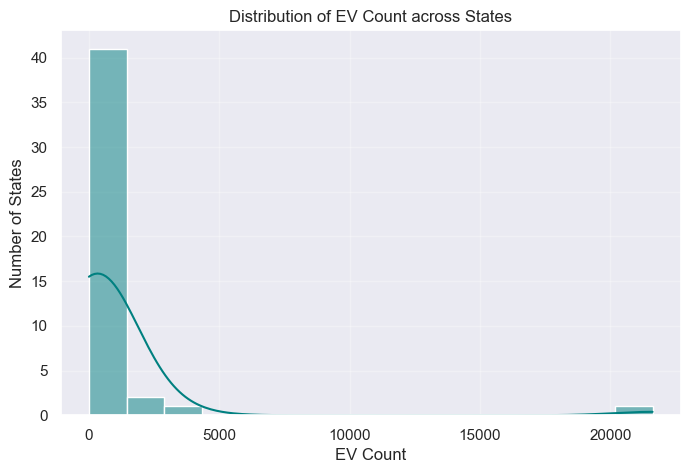

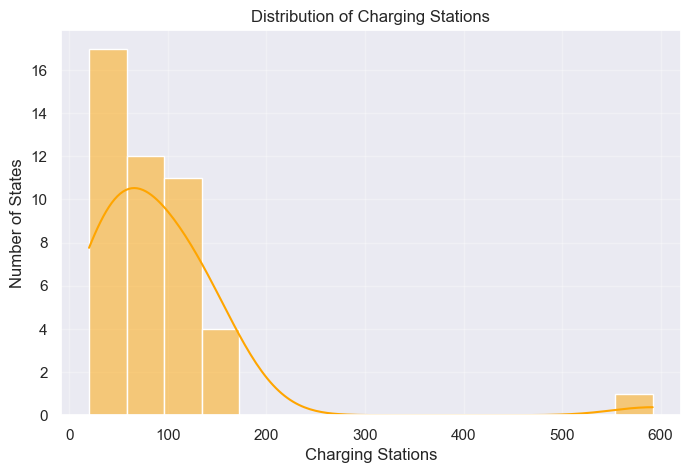

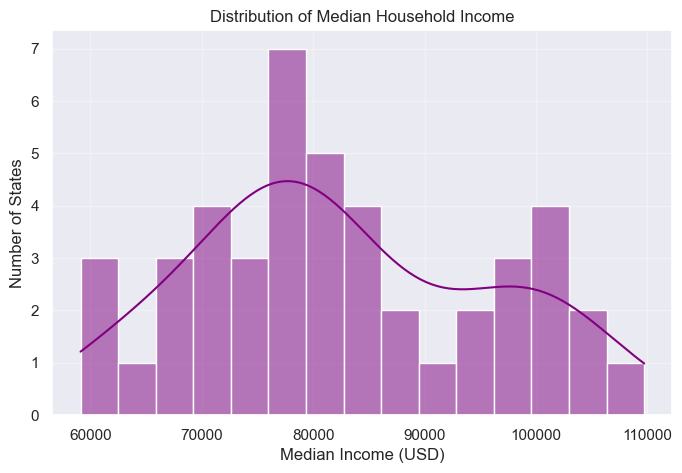

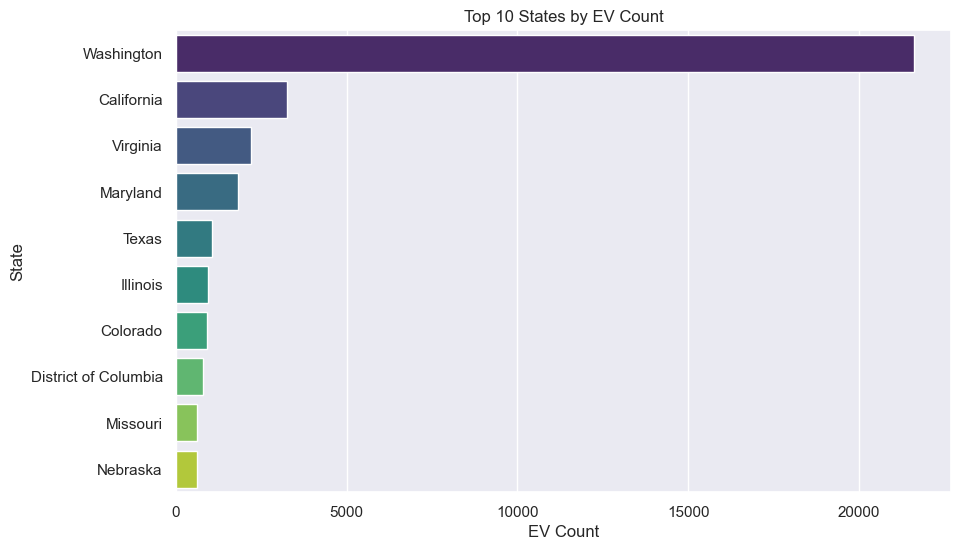

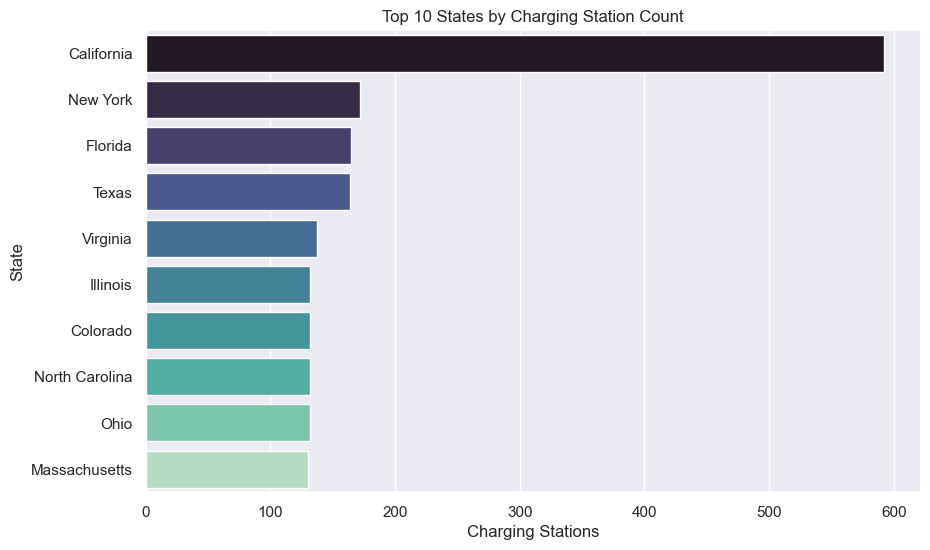

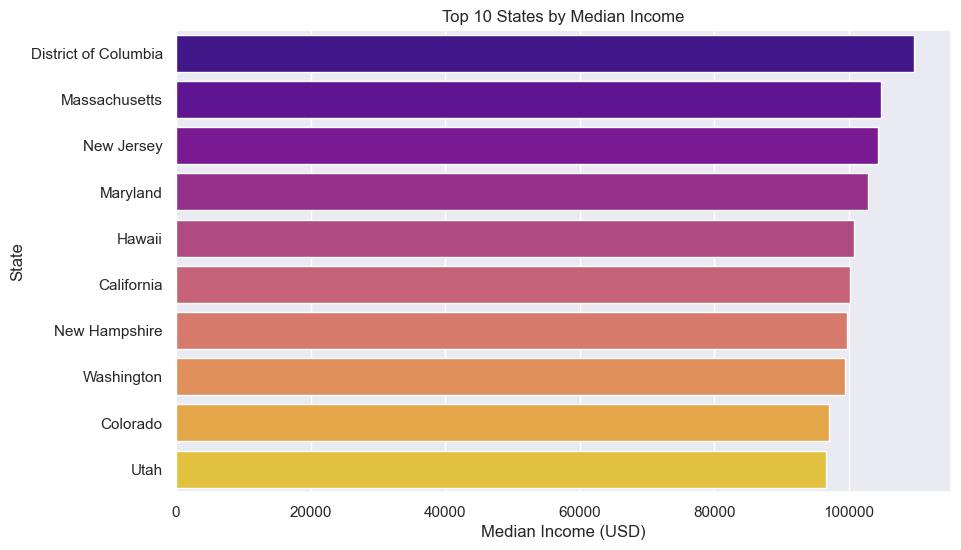

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['EV_Count'], bins=15, kde=True, color='teal')
plt.title('Distribution of EV Count across States')
plt.xlabel('EV Count')
plt.ylabel('Number of States')
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['station_count'], bins=15, kde=True, color='orange')
plt.title('Distribution of Charging Stations')
plt.xlabel('Charging Stations')
plt.ylabel('Number of States')
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['median_income'], bins=15, kde=True, color='purple')
plt.title('Distribution of Median Household Income')
plt.xlabel('Median Income (USD)')
plt.ylabel('Number of States')
plt.grid(alpha=0.3)
plt.show()

top_ev = df.sort_values('EV_Count', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top_ev, x='EV_Count', y='state', palette='viridis')
plt.title('Top 10 States by EV Count')
plt.xlabel('EV Count')
plt.ylabel('State')
plt.show()

top_st = df.sort_values('station_count', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top_st, x='station_count', y='state', palette='mako')
plt.title('Top 10 States by Charging Station Count')
plt.xlabel('Charging Stations')
plt.ylabel('State')
plt.show()

top_income = df.sort_values('median_income', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top_income, x='median_income', y='state', palette='plasma')
plt.title('Top 10 States by Median Income')
plt.xlabel('Median Income (USD)')
plt.ylabel('State')
plt.show()



# Outlier Detection

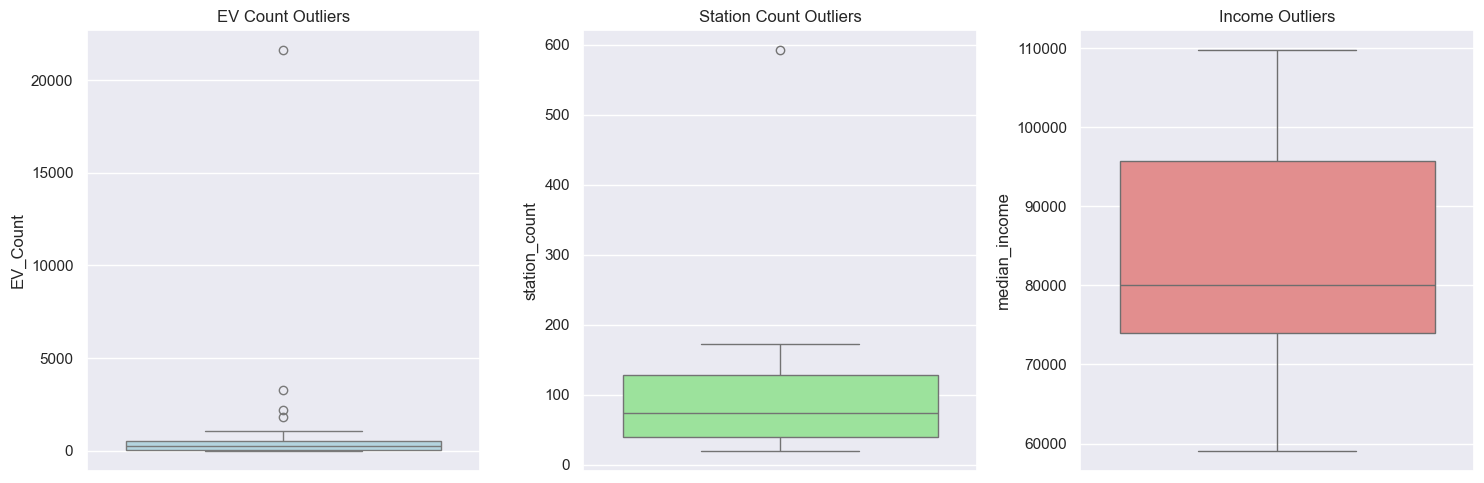

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.boxplot(data=df, y='EV_Count', ax=axes[0], color='lightblue')
axes[0].set_title('EV Count Outliers')
sns.boxplot(data=df, y='station_count', ax=axes[1], color='lightgreen')
axes[1].set_title('Station Count Outliers')
sns.boxplot(data=df, y='median_income', ax=axes[2], color='lightcoral')
axes[2].set_title('Income Outliers')
plt.tight_layout()
plt.show()


In [ ]:
Q1 = df[['EV_Count','station_count','median_income']].quantile(0.25)
Q3 = df[['EV_Count','station_count','median_income']].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = ((df[['EV_Count','station_count','median_income']] < (Q1 - 1.5 * IQR)) |
                (df[['EV_Count','station_count','median_income']] > (Q3 + 1.5 * IQR)))
outliers = df[outlier_mask.any(axis=1)]
print("Potential Outlier States:")
display(outliers[['state','EV_Count','station_count','median_income']])


Potential Outlier States:


,state,EV_Count,station_count,median_income
4,California,3259,592,100149.0
18,Maryland,1816,88,102905.0
41,Virginia,2191,137,92090.0
42,Washington,21616,129,99389.0


# Harmonize Columns & cleaning

In [ ]:
# ── 1. Light cleaning & column harmonization
def colfind(cols, *patterns, default=None):
    cols_l = [c.lower() for c in cols]
    for p in patterns:
        for i, c in enumerate(cols_l):
            if p in c:
                return cols[i]
    return default

# try to auto-detect key columns
STATE = colfind(df.columns, "state")
YEAR  = colfind(df.columns, "year")
POP   = colfind(df.columns, "pop", "population")
INCOME_COL = colfind(df.columns, "income", "median household")
EV_COUNT = colfind(df.columns, "ev_reg", "ev count", "evs", "registered")
ST_TOTAL = colfind(df.columns, "station", "total station", "evse", "ports")
ST_L2    = colfind(df.columns, "level 2", "l2")
ST_DCF   = colfind(df.columns, "dc fast", "dcfc", "fast")

key_map = dict(STATE=STATE, YEAR=YEAR, POP=POP, INCOME=INCOME_COL,
               EV_COUNT=EV_COUNT, ST_TOTAL=ST_TOTAL, ST_L2=ST_L2, ST_DCF=ST_DCF)
print("Detected:\n", key_map)

# minimal NA handling
for k,v in key_map.items():
    if v and v in df.columns:
        if df[v].dtype == "O":
            # coerce numerics when appropriate
            df[v] = pd.to_numeric(df[v].astype(str).str.replace(",","").str.extract(r"([-+]?\d*\.?\d+)")[0], errors="ignore")
df = df.drop_duplicates()


Detected:
 {'STATE': 'state', 'YEAR': None, 'POP': 'population', 'INCOME': 'median_income', 'EV_COUNT': None, 'ST_TOTAL': 'station_count', 'ST_L2': None, 'ST_DCF': None}


# Feature Engineering 

In [ ]:
import numpy as np
import pandas as pd

def add_ev_features(
    df: pd.DataFrame,
    *,
    EV_COUNT='EV_Count',
    ST_TOTAL='station_count',
    ST_DCF='dc_fast_count',
    POP='population',
    INCOME_COL='median_income',
    YEAR='year',
    STATE='state'
) -> pd.DataFrame:
    df = df.copy()

    def series_or_nan(colname):
        return df[colname] if (colname and colname in df.columns) else pd.Series(np.nan, index=df.index)

    # --- Base series (safe) ---
    ev = series_or_nan(EV_COUNT)
    st = series_or_nan(ST_TOTAL)
    st_dcf = series_or_nan(ST_DCF)
    pop = series_or_nan(POP)
    inc = series_or_nan(INCOME_COL)

    # Avoid divide-by-zero (replace 0 with NaN for denominators)
    safe_pop_1k = pop.replace(0, np.nan) / 1000.0
    safe_pop_100k = pop.replace(0, np.nan) / 100000.0
    safe_st = st.replace(0, np.nan)

    # --- 1) Per-capita metrics ---
    df["EV_per_1000_pop"] = ev.div(safe_pop_1k)
    df["Stations_per_100k_pop"] = st.div(safe_pop_100k)

    # --- 2) Infrastructure efficiency ---
    df["EV_per_station"] = ev.div(safe_st)

    # --- 3) DC fast share ---
    df["DC_share"] = st_dcf.div(safe_st)

    # --- 4) Income index ---
    if INCOME_COL and (INCOME_COL in df.columns):
        inc_mean = inc.mean()
        df["Income_Index"] = inc / (inc_mean if inc_mean not in (0, np.nan) else np.nan)
    else:
        df["Income_Index"] = np.nan

    # --- 5) Growth (needs YEAR + STATE) ---
    if YEAR and (YEAR in df.columns) and STATE and (STATE in df.columns) and EV_COUNT and (EV_COUNT in df.columns):
        df = df.sort_values([STATE, YEAR])
        df["EV_count_prev"] = df.groupby(STATE)[EV_COUNT].shift(1)
        prev = df["EV_count_prev"].replace(0, np.nan)  # avoid /0
        df["EV_Growth"] = (df[EV_COUNT] - df["EV_count_prev"]).div(prev)
    else:
        df["EV_Growth"] = np.nan

    # --- 6) Income quartiles for equity/fairness ---
    if INCOME_COL and (INCOME_COL in df.columns):
        try:
            # duplicates='drop' handles many ties
            q = pd.qcut(df[INCOME_COL], 4, labels=["Q1 (Low)", "Q2", "Q3", "Q4 (High)"], duplicates='drop')
            df["Income_Q"] = q
        except Exception:
            df["Income_Q"] = np.nan
    else:
        df["Income_Q"] = np.nan

    return df
df = add_ev_features(df)          # <-- capture the returned df
new_cols = [
    "EV_per_1000_pop","Stations_per_100k_pop","EV_per_station",
    "DC_share","Income_Index","EV_Growth","Income_Q"
]
display(df[new_cols].head(10))



,EV_per_1000_pop,Stations_per_100k_pop,EV_per_station,DC_share,Income_Index,EV_Growth,Income_Q
0,0.025920,3.410562,0.760000,NaN,1.158441,NaN,Q3
1,0.008345,0.973556,0.857143,NaN,0.807197,NaN,Q1 (Low)
2,0.161218,1.625452,9.918367,NaN,0.752063,NaN,Q1 (Low)
3,0.048559,1.280065,3.793478,NaN,0.986743,NaN,Q3
4,0.082460,1.497901,5.505068,NaN,1.212740,NaN,Q4 (High)
5,0.157937,2.280924,6.924242,NaN,1.175976,NaN,Q4 (High)
6,0.047487,3.184430,1.491228,NaN,1.163091,NaN,Q4 (High)
7,NaN,NaN,20.435897,NaN,1.328481,NaN,Q4 (High)
8,0.000000,3.427668,0.000000,NaN,1.059980,NaN,Q3
9,0.022740,0.764171,2.975758,NaN,0.941321,NaN,Q2


In [ ]:
import re
import numpy as np
import pandas as pd

def guess_cols(df):
    cols = {k.lower(): k for k in df.columns}
    def find(*alts):
        for a in alts:
            # exact
            if a in cols: return cols[a]
            # fuzzy
            for c in df.columns:
                if re.search(a, c.lower()):
                    return c
        return None

    return {
        "EV_COUNT": find(r"^ev[_\s]*count$", r"^evs?$", r"ev[_\s]*total", r"battery.*reg.*count"),
        "ST_TOTAL": find(r"station[_\s]*count$", r"^total[_\s]*stations$", r"charg(ing)?[_\s]*stations?$", r"^st_total$"),
        "ST_DCF":   find(r"(dc|fast).*count$", r"dc[_\s]*fast", r"^fast[_\s]*charg"),
        "POP":      find(r"population", r"^pop$", r"^total[_\s]*pop"),
        "INCOME":   find(r"median[_\s]*income", r"^income(_median)?$", r"s1903.*median"),
        "YEAR":     find(r"^year$", r"fiscal.*year", r"\byr\b"),
        "STATE":    find(r"^state$", r"state[_\s]*name", r"st[_\s]*name", r"state[_\s]*code")
    }

def coerce_numeric(df, cols):
    for k in ["EV_COUNT","ST_TOTAL","ST_DCF","POP","INCOME"]:
        c = cols.get(k)
        if c and c in df.columns:
            df[c] = pd.to_numeric(df[c], errors="coerce")

def add_ev_features_safe(df):
    cols = guess_cols(df)
    coerce_numeric(df, cols)

    EV_COUNT = cols["EV_COUNT"]
    ST_TOTAL = cols["ST_TOTAL"]
    ST_DCF   = cols["ST_DCF"]
    POP      = cols["POP"]
    INCOME   = cols["INCOME"]
    YEAR     = cols["YEAR"]
    STATE    = cols["STATE"]

    out = df.copy()

    ev = out[EV_COUNT] if EV_COUNT else np.nan
    st = out[ST_TOTAL] if ST_TOTAL else np.nan
    pop = out[POP] if POP else np.nan
    dcf = out[ST_DCF] if ST_DCF else np.nan
    inc = out[INCOME] if INCOME else np.nan

    # per-capita
    out["EV_per_1000_pop"]   = ev / pop.replace(0, np.nan) * 1000 if POP else np.nan
    out["Stations_per_100k_pop"] = st / pop.replace(0, np.nan) * 100000 if POP else np.nan

    # efficiency
    out["EV_per_station"] = ev / st.replace(0, np.nan) if ST_TOTAL else np.nan

    # DC share
    out["DC_share"] = dcf / st.replace(0, np.nan) if ST_DCF and ST_TOTAL else np.nan

    # income index + quartiles
    if INCOME:
        m = inc.mean()
        out["Income_Index"] = inc / (m if m and m != 0 else np.nan)
        out["Income_Q"] = pd.qcut(inc, 4, labels=["Q1 (Low)","Q2","Q3","Q4 (High)"], duplicates="drop")
    else:
        out["Income_Index"] = np.nan
        out["Income_Q"] = np.nan

    # growth (needs panel data)
    if YEAR and STATE and EV_COUNT and all(c in out.columns for c in [YEAR, STATE, EV_COUNT]):
        out = out.sort_values([STATE, YEAR])
        out["EV_count_prev"] = out.groupby(STATE)[EV_COUNT].shift(1)
        out["EV_Growth"] = (out[EV_COUNT] - out["EV_count_prev"]) / out["EV_count_prev"].replace(0, np.nan)
    else:
        out["EV_Growth"] = np.nan

    # quick report so you know what's missing
    report = {
        "EV_COUNT": EV_COUNT, "ST_TOTAL": ST_TOTAL, "ST_DCF": ST_DCF,
        "POP": POP, "INCOME": INCOME, "YEAR": YEAR, "STATE": STATE
    }
    print("Detected columns:", report)
    return out

# --- use it ---
df = add_ev_features_safe(df)

preview_cols = ["EV_per_1000_pop","Stations_per_100k_pop","EV_per_station","DC_share","Income_Index","EV_Growth","Income_Q"]
print(df[preview_cols].head(10))


Detected columns: {'EV_COUNT': 'EV_Count', 'ST_TOTAL': 'station_count', 'ST_DCF': None, 'POP': 'population', 'INCOME': 'median_income', 'YEAR': None, 'STATE': 'state'}
   EV_per_1000_pop  Stations_per_100k_pop  EV_per_station  DC_share  \
0         0.025920               3.410562        0.760000       NaN   
1         0.008345               0.973556        0.857143       NaN   
2         0.161218               1.625452        9.918367       NaN   
3         0.048559               1.280065        3.793478       NaN   
4         0.082460               1.497901        5.505068       NaN   
5         0.157937               2.280924        6.924242       NaN   
6         0.047487               3.184430        1.491228       NaN   
7              NaN                    NaN       20.435897       NaN   
8         0.000000               3.427668        0.000000       NaN   
9         0.022740               0.764171        2.975758       NaN   

   Income_Index  EV_Growth   Income_Q  
0      1.1

# Bivariate Analysis

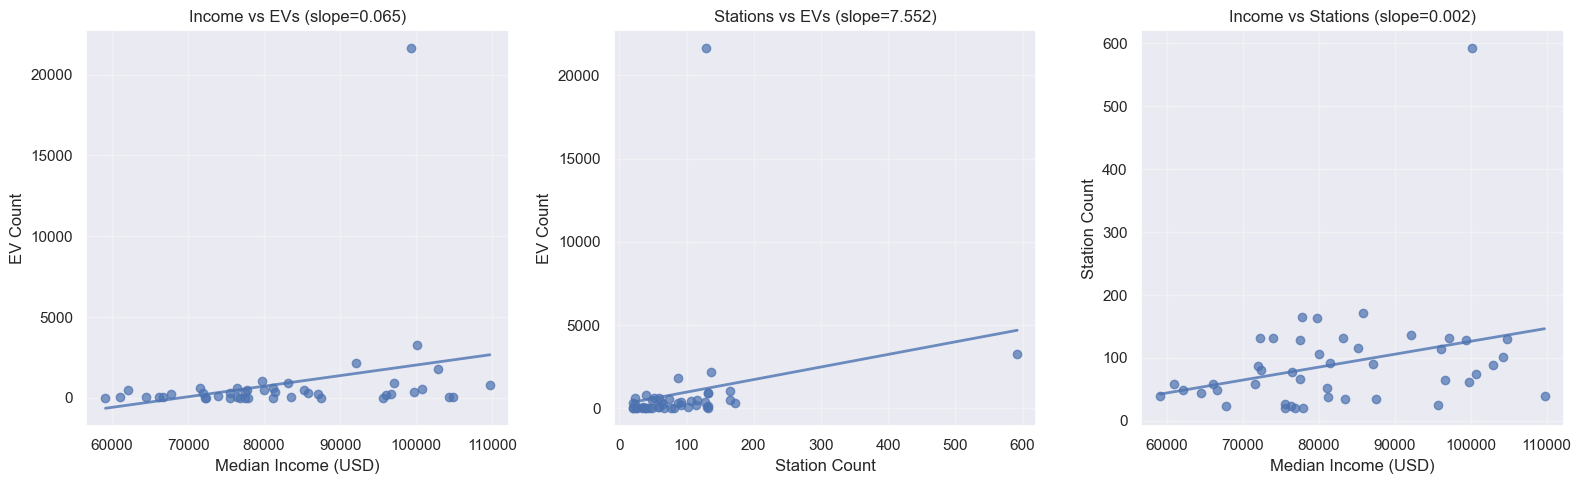

In [ ]:
# helper to draw a regression line with numpy (no statsmodels needed)
def add_trend(ax, x, y):
    m, b = np.polyfit(x, y, 1)
    xline = np.linspace(x.min(), x.max(), 100)
    ax.plot(xline, m*xline + b, linewidth=2, alpha=0.8)
    return m, b

fig, axes = plt.subplots(1, 3, figsize=(16,5))

# A) income vs EV
ax = axes[0]
ax.scatter(df['median_income'], df['EV_Count'], alpha=0.7)
m, b = add_trend(ax, df['median_income'].values, df['EV_Count'].values)
ax.set_title(f'Income vs EVs (slope={m:.3f})')
ax.set_xlabel('Median Income (USD)')
ax.set_ylabel('EV Count')
ax.grid(True, alpha=0.3)

# B) stations vs EV
ax = axes[1]
ax.scatter(df['station_count'], df['EV_Count'], alpha=0.7)
m, b = add_trend(ax, df['station_count'].values, df['EV_Count'].values)
ax.set_title(f'Stations vs EVs (slope={m:.3f})')
ax.set_xlabel('Station Count')
ax.set_ylabel('EV Count')
ax.grid(True, alpha=0.3)

# C) income vs stations
ax = axes[2]
ax.scatter(df['median_income'], df['station_count'], alpha=0.7)
m, b = add_trend(ax, df['median_income'].values, df['station_count'].values)
ax.set_title(f'Income vs Stations (slope={m:.3f})')
ax.set_xlabel('Median Income (USD)')
ax.set_ylabel('Station Count')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# Fairness Slice 

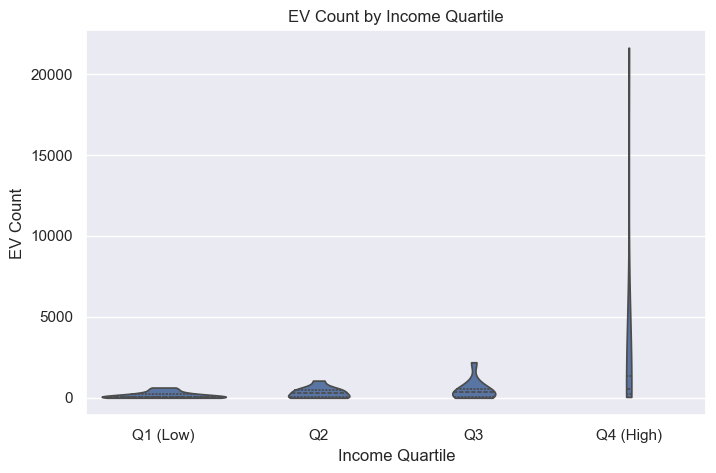

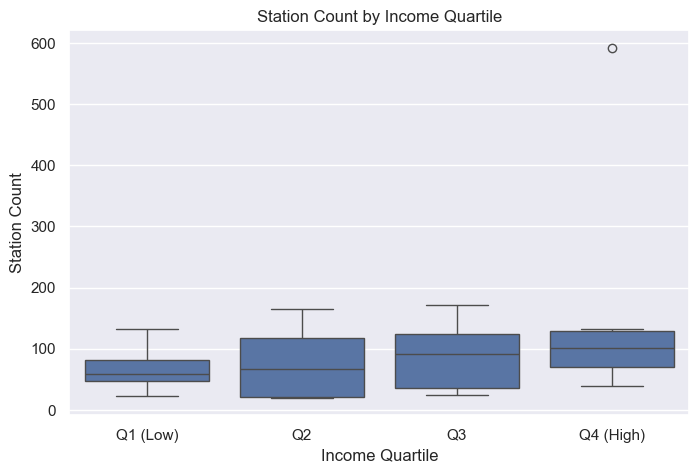

In [ ]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df, x='Income_Q', y='EV_Count', inner='quartile', cut=0)
plt.title('EV Count by Income Quartile')
plt.xlabel('Income Quartile')
plt.ylabel('EV Count')
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Income_Q', y='station_count')
plt.title('Station Count by Income Quartile')
plt.xlabel('Income Quartile')
plt.ylabel('Station Count')
plt.show()


# Statistical Tests for Fairness in EV Adoption

In [ ]:
# ============================================================
# Statistical Tests for Fairness in EV Adoption
# ============================================================

from scipy.stats import f_oneway, kruskal, chi2_contingency
import numpy as np

# Ensure income quartiles exist
if "Income_Q" not in df.columns:
    df["Income_Q"] = pd.qcut(
        df["median_income"], 4,
        labels=["Q1 (Low)", "Q2", "Q3", "Q4 (High)"]
    )

print("="*60)
print("FAIRNESS ANALYSIS — EV Adoption & Charging Access by Income Quartile")
print("="*60)

# ------------------------------------------------------------
#  ANOVA Test (EV Count differences across income quartiles)
# ------------------------------------------------------------
groups_ev = [df[df["Income_Q"] == q]["EV_Count"] for q in df["Income_Q"].unique()]

anova_stat, anova_p = f_oneway(*groups_ev)
print("\nANOVA Test: EV Count by Income Quartile")
print(f"F-statistic: {anova_stat:.4f}")
print(f"P-value: {anova_p:.4f}")
print(f"→ Interpretation: {'Significant differences exist' if anova_p < 0.05 else 'No significant difference'} among income quartiles.")

# Non-parametric check (Kruskal–Wallis, more robust)
kruskal_stat, kruskal_p = kruskal(*groups_ev)
print(f"Kruskal–Wallis Test (non-parametric): H={kruskal_stat:.4f}, P={kruskal_p:.4f}")
print(f"→ {'Supports income-related disparity' if kruskal_p < 0.05 else 'No evidence of disparity based on income.'}")

# ------------------------------------------------------------
# ANOVA Test (Station Count differences across income quartiles)
# ------------------------------------------------------------
groups_st = [df[df["Income_Q"] == q]["station_count"] for q in df["Income_Q"].unique()]

anova_stat2, anova_p2 = f_oneway(*groups_st)
print("\nANOVA Test: Station Count by Income Quartile")
print(f"F-statistic: {anova_stat2:.4f}")
print(f"P-value: {anova_p2:.4f}")
print(f"→ Interpretation: {'Significant disparities in charging access' if anova_p2 < 0.05 else 'No significant access disparity by income level.'}")

# Non-parametric check
kruskal_stat2, kruskal_p2 = kruskal(*groups_st)
print(f"Kruskal–Wallis Test (non-parametric): H={kruskal_stat2:.4f}, P={kruskal_p2:.4f}")
print(f"→ {'Evidence of unequal charging station distribution' if kruskal_p2 < 0.05 else 'Charging access appears fairly distributed across incomes.'}")

# ------------------------------------------------------------
# Chi-Square Test for income quartile vs EV/Station category
# ------------------------------------------------------------
# Create categorical bins for simplicity
df["EV_Level"] = pd.qcut(df["EV_Count"], 3, labels=["Low", "Medium", "High"])
df["Station_Level"] = pd.qcut(df["station_count"], 3, labels=["Low", "Medium", "High"])

# EV vs Income Quartile
cont_ev = pd.crosstab(df["Income_Q"], df["EV_Level"])
chi_ev, p_ev, dof_ev, _ = chi2_contingency(cont_ev)

print("\nChi-Square Test: Income Quartile vs EV Adoption Level")
print(f"Chi-square statistic: {chi_ev:.4f}")
print(f"P-value: {p_ev:.4f}")
print(f"→ Relationship is {'significant' if p_ev < 0.05 else 'not significant'} (α = 0.05)")

# Stations vs Income Quartile
cont_st = pd.crosstab(df["Income_Q"], df["Station_Level"])
chi_st, p_st, dof_st, _ = chi2_contingency(cont_st)

print("\nChi-Square Test: Income Quartile vs Station Density Level")
print(f"Chi-square statistic: {chi_st:.4f}")
print(f"P-value: {p_st:.4f}")
print(f"→ Relationship is {'significant' if p_st < 0.05 else 'not significant'} (α = 0.05)")


FAIRNESS ANALYSIS — EV Adoption & Charging Access by Income Quartile

ANOVA Test: EV Count by Income Quartile
F-statistic: 1.6213
P-value: 0.1992
→ Interpretation: No significant difference among income quartiles.
Kruskal–Wallis Test (non-parametric): H=6.9439, P=0.0737
→ No evidence of disparity based on income.

ANOVA Test: Station Count by Income Quartile
F-statistic: 1.5650
P-value: 0.2125
→ Interpretation: No significant access disparity by income level.
Kruskal–Wallis Test (non-parametric): H=3.7953, P=0.2844
→ Charging access appears fairly distributed across incomes.

Chi-Square Test: Income Quartile vs EV Adoption Level
Chi-square statistic: 7.4608
P-value: 0.2803
→ Relationship is not significant (α = 0.05)

Chi-Square Test: Income Quartile vs Station Density Level
Chi-square statistic: 5.8636
P-value: 0.4386
→ Relationship is not significant (α = 0.05)


# robustness & outliers

In [ ]:
num_cols = ['EV_Count','station_count','median_income','EV_per_station','Income_Index','log_EV','log_stations','log_income']
use = [c for c in num_cols if c in df.columns]

# IQR mask
Q1, Q3 = df[use].quantile(0.25), df[use].quantile(0.75)
IQR = Q3 - Q1
mask_inlier = ~(((df[use] < (Q1 - 1.5*IQR)) | (df[use] > (Q3 + 1.5*IQR))).any(axis=1))

corr_full = df[use].corr()['EV_Count'].sort_values(ascending=False)
corr_in   = df.loc[mask_inlier, use].corr()['EV_Count'].sort_values(ascending=False)

robust_compare = pd.DataFrame({'Full': corr_full, 'InliersOnly': corr_in})
print("Correlation vs EV_Count (Full vs Inliers):\n", robust_compare.round(3))


Correlation vs EV_Count (Full vs Inliers):
                  Full  InliersOnly
EV_Count        1.000        1.000
EV_per_station  0.975        0.682
Income_Index    0.267        0.173
median_income   0.267        0.173
station_count   0.207        0.491


In [ ]:
#  Data Dictionary
def dd_entry(col, desc, unit="", kind="float"):
    s = df[col] if col in df.columns else pd.Series(dtype="float")
    return {
        "type": str(s.dtype),
        "description": desc,
        "unit": unit,
        "range": f"{np.nanmin(s):.3g}–{np.nanmax(s):.3g}" if len(s)>0 else "n/a",
        "mean": (float(np.nanmean(s)) if s.size else None),
    }

data_dictionary = {
    STATE: {"type":"category", "description":"US state/territory code or name"},
}
if YEAR: data_dictionary[YEAR] = {"type":"int", "description":"calendar year"}
if POP:  data_dictionary[POP] = dd_entry(POP, "Population", "people", "int")
if INCOME_COL: data_dictionary[INCOME_COL] = dd_entry(INCOME_COL, "Median household income", "USD")
data_dictionary[EV_COUNT] = dd_entry(EV_COUNT, "EV registrations", "vehicles", "int")
data_dictionary[ST_TOTAL] = dd_entry(ST_TOTAL, "Total charging stations (or EVSE ports)", "count", "int")
if ST_L2:  data_dictionary[ST_L2]  = dd_entry(ST_L2,  "Level 2 ports/stations", "count","int")
if ST_DCF: data_dictionary[ST_DCF] = dd_entry(ST_DCF, "DC fast ports/stations", "count","int")

# engineered
for newcol, meta in {
    "EV_per_1000_pop": ("EV per 1,000 residents","EVs/1k"),
    "Stations_per_100k_pop": ("Stations per 100,000 residents","stations/100k"),
    "EV_per_station": ("EVs per station (load ratio)","EVs/station"),
    "DC_share": ("Share of stations that are DC fast","fraction"),
    "Income_Index": ("Income relative to state mean (=1 at mean)","index"),
    "EV_Growth": ("YoY growth in EV count","fraction")
}.items():
    if newcol in df.columns:
        data_dictionary[newcol] = dd_entry(newcol, meta[0], meta[1])

with open("data/ev_data_dictionary.json","w") as f:
    json.dump(data_dictionary, f, indent=2)
print(" data/ev_data_dictionary.json created")


 data/ev_data_dictionary.json created


In [ ]:
#  Summary & validation
summary_stats = {
    "records": int(len(df)),
    "features": int(df.shape[1]),
    "missing_values": int(df.isnull().sum().sum()),
    "duplicates": int(df.duplicated().sum()),
    "top_states_by_ev_rate": df.sort_values("EV_per_1000_pop", ascending=False)[STATE].head(5).tolist()
}
with open("data/ev_summary.json","w") as f:
    json.dump(summary_stats, f, indent=2)

# save clean analytic table
df.to_csv("data/ev_master_analytic.csv", index=False)
print("data/ev_master_analytic.csv saved")
print("Preview:", df.head(3))


data/ev_master_analytic.csv saved
Preview:    state state_usps  EV_Count  station_count  median_income  population  \
0    NaN         AK        19             25        95665.0    733017.0   
1    NaN         AL        42             49        66659.0   5033094.0   
2    NaN         AR       486             49        62106.0   3014546.0   

   EV_per_1000_pop  Stations_per_100k_pop  EV_per_station  Income_Index  \
0         0.025920               3.410562        0.760000      1.158441   
1         0.008345               0.973556        0.857143      0.807197   
2         0.161218               1.625452        9.918367      0.752063   

   DC_share  EV_Growth  Income_Q  
0       NaN        NaN        Q3  
1       NaN        NaN  Q1 (Low)  
2       NaN        NaN  Q1 (Low)  


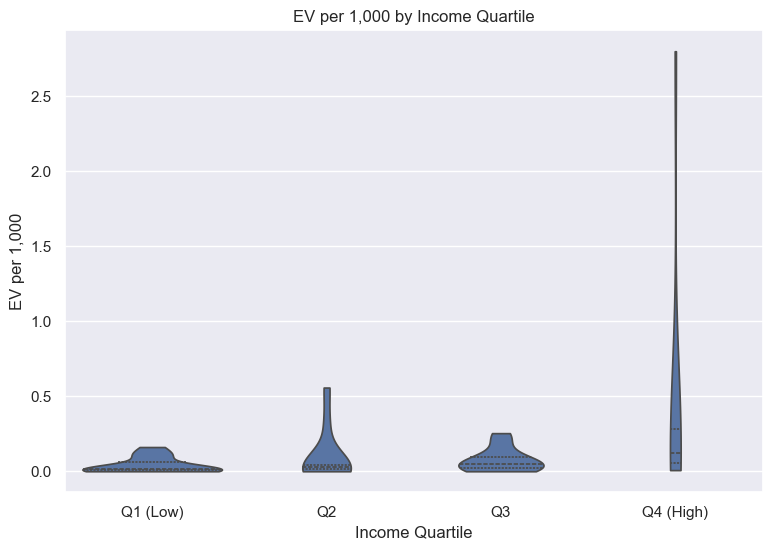

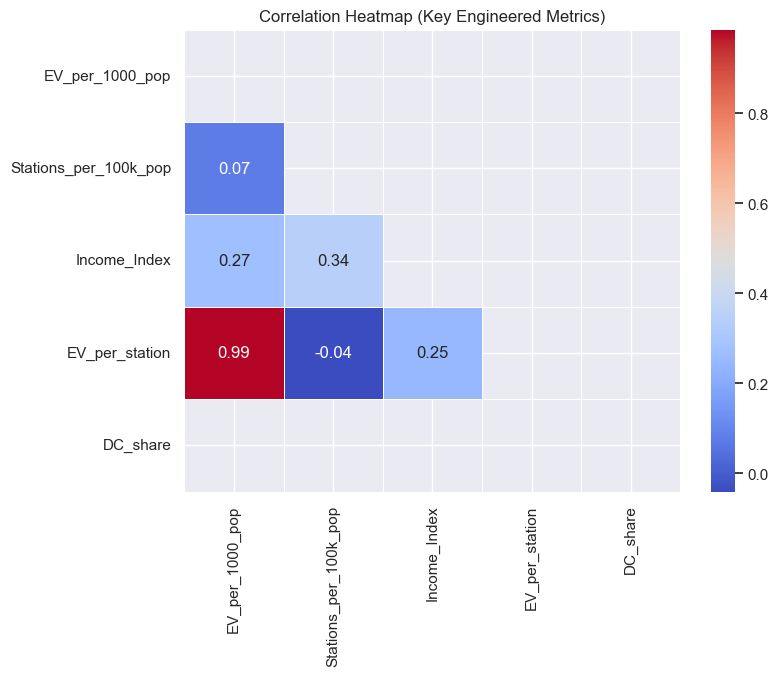

In [ ]:


#  Violin by income quartile (equity view)
if "Income_Q" in df.columns:
    plt.figure(figsize=(9,6))
    sns.violinplot(data=df, x="Income_Q", y="EV_per_1000_pop", inner="quartile", cut=0)
    plt.title("EV per 1,000 by Income Quartile")
    plt.xlabel("Income Quartile")
    plt.ylabel("EV per 1,000")
    plt.show()

# ── 5C. Correlation heatmap
num_cols = [c for c in pair_cols if c in df.columns]
corr = df[num_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(8,6))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap (Key Engineered Metrics)")
plt.show()


In [ ]:
#  Representation
if "Income_Q" in df.columns:
    rep = df["Income_Q"].value_counts().sort_index()
    print("Representation by Income Quartile:\n", rep)

#  Parity tests (ANOVA across quartiles)
if "Income_Q" in df.columns:
    groups = [g["EV_per_1000_pop"].dropna() for _, g in df.groupby("Income_Q")]
    if all(len(g)>1 for g in groups):
        anova = stats.f_oneway(*groups)
        print(f"ANOVA EV/1000 across Income Quartiles: F={anova.statistic:.2f}, p={anova.pvalue:.4g}")

#  Cramér’s V for categorical parity (e.g., Region vs High Adoption)
# Create a binary “High Adoption” by top quartile of EV rate
if "EV_per_1000_pop" in df.columns:
    q3 = df["EV_per_1000_pop"].quantile(0.75)
    df["High_Adopter"] = (df["EV_per_1000_pop"] >= q3).astype(int)

# If you have a region column, test association (fallback: create one from state if you add mapping)
region_col = None
for cand in df.columns:
    if cand.lower() in ["region","us_region"]:
        region_col = cand

if region_col:
    cm = pd.crosstab(df[region_col], df["High_Adopter"])
    def cramers_v(cm):
        chi2 = stats.chi2_contingency(cm)[0]
        n = cm.values.sum()
        phi2 = chi2/n
        r,k = cm.shape
        phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
        rcorr = r - ((r-1)**2)/(n-1)
        kcorr = k - ((k-1)**2)/(n-1)
        return np.sqrt(phi2corr / min((kcorr-1),(rcorr-1)))
    print("Cramér’s V (Region vs High_Adopter):", round(cramers_v(cm),3))


Representation by Income Quartile:
 Income_Q
Q1 (Low)     12
Q2           11
Q3           11
Q4 (High)    11
Name: count, dtype: int64
ANOVA EV/1000 across Income Quartiles: F=1.75, p=0.1718


# EV per thousand Residents

In [ ]:
import plotly.express as px
import pandas as pd
import re

# --- Config: set your final merged df here ---
# df = merged  # if you already have it in memory

# --- Ensure we have 2-letter codes in STATE (named 'state_usps' in your merged file) ---
if "state_usps" in df.columns:
    df["STATE"] = df["state_usps"].str.upper().str.strip()
else:
    # derive from full names if needed
    USPS_TO_STATE = {
        "AL":"Alabama","AK":"Alaska","AZ":"Arizona","AR":"Arkansas","CA":"California","CO":"Colorado","CT":"Connecticut",
        "DE":"Delaware","FL":"Florida","GA":"Georgia","HI":"Hawaii","ID":"Idaho","IL":"Illinois","IN":"Indiana",
        "IA":"Iowa","KS":"Kansas","KY":"Kentucky","LA":"Louisiana","ME":"Maine","MD":"Maryland","MA":"Massachusetts",
        "MI":"Michigan","MN":"Minnesota","MS":"Mississippi","MO":"Missouri","MT":"Montana","NE":"Nebraska","NV":"Nevada",
        "NH":"New Hampshire","NJ":"New Jersey","NM":"New Mexico","NY":"New York","NC":"North Carolina","ND":"North Dakota",
        "OH":"Ohio","OK":"Oklahoma","OR":"Oregon","PA":"Pennsylvania","RI":"Rhode Island","SC":"South Carolina",
        "SD":"South Dakota","TN":"Tennessee","TX":"Texas","UT":"Utah","VT":"Vermont","VA":"Virginia","WA":"Washington",
        "WV":"West Virginia","WI":"Wisconsin","WY":"Wyoming","DC":"District of Columbia"
    }
    STATE_TO_USPS = {v:k for k,v in USPS_TO_STATE.items()}
    df["STATE"] = df["state"].map(STATE_TO_USPS).str.upper()

# pick the actual income column name (defaults to 'median_income')
INCOME_COL = "median_income" if "median_income" in df.columns else (
    "Income_Index" if "Income_Index" in df.columns else None
)

# ── 9A. State choropleth
map_df = df.dropna(subset=["EV_per_1000_pop", "STATE"])
fig = px.choropleth(
    map_df,
    locations="STATE",
    locationmode="USA-states",
    color="EV_per_1000_pop",
    scope="usa",
    color_continuous_scale="Viridis",
    hover_data={
        INCOME_COL:':.0f' if INCOME_COL else False,
        "Stations_per_100k_pop":':.2f' if "Stations_per_100k_pop" in map_df.columns else False,
        "EV_per_station":':.2f' if "EV_per_station" in map_df.columns else False,
        "EV_Count": True if "EV_Count" in map_df.columns else False,
        "station_count": True if "station_count" in map_df.columns else False,
        "population": True if "population" in map_df.columns else False,
    },
    title="EV per 1,000 Residents (with Infrastructure & Income on hover)"
)
fig.update_layout(coloraxis_colorbar_title="EV / 1,000")
fig.show()

# ── 9B. Optional station dots (alt fuel stations)
def colfind(cols, *candidates):
    """Return the first matching column name by fuzzy match."""
    lower = {c.lower(): c for c in cols}
    # exact lower-name matches first
    for cand in candidates:
        if cand.lower() in lower:
            return lower[cand.lower()]
    # fuzzy contains
    for c in cols:
        for cand in candidates:
            if re.search(rf"\b{re.escape(cand)}\b", c, flags=re.I):
                return c
    return None

if 'df_alt' in globals() and df_alt is not None and isinstance(df_alt, pd.DataFrame):
    lat_col = colfind(df_alt.columns, "latitude", "lat")
    lon_col = colfind(df_alt.columns, "longitude", "lng", "lon", "long")
    st_col  = colfind(df_alt.columns, "state", "state_code", "state_usps", "State")
    if lat_col and lon_col:
        s = df_alt.dropna(subset=[lat_col, lon_col]).copy()
        # If state is full name but you want codes on hover, build a code column (optional)
        if st_col and st_col not in ("state_usps", "STATE"):
            # quick map if you have a full-name column
            if s[st_col].astype(str).str.len().max() > 2:
                STATE_TO_USPS = {v:k for k,v in USPS_TO_STATE.items()}
                s["state_usps"] = s[st_col].map(STATE_TO_USPS)
        # sample for performance
        s = s.sample(min(5000, len(s)), random_state=7)
        fig2 = px.scatter_geo(
            s, lat=lat_col, lon=lon_col,
            scope="usa", opacity=0.4,
            title="Alt-Fuel Stations (sampled)"
        )
        fig2.show()


# Scatter Plot — Charging Stations vs EV Adoption

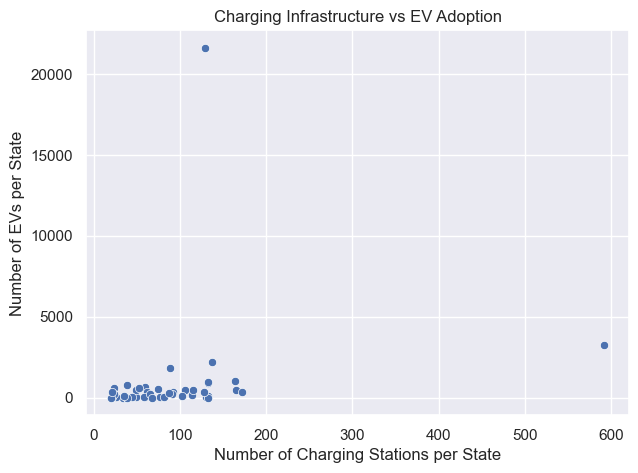

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=merged_df, x='station_count', y='EV_Count')
plt.title('Charging Infrastructure vs EV Adoption')
plt.xlabel('Number of Charging Stations per State')
plt.ylabel('Number of EVs per State')
plt.show()


Observation: There’s a strong positive relationship—states investing more in infrastructure show higher EV counts.

# Correlation Heatmap

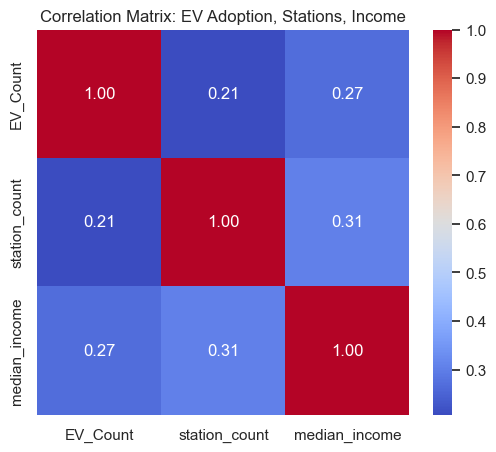

In [ ]:
plt.figure(figsize=(6,5))
corr = merged_df[['EV_Count', 'station_count', 'median_income']].corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: EV Adoption, Stations, Income')
plt.show()


Interpretation:

EV_Count & station_count shows strong correlation : infrastructure directly supports adoption.

EV_Count & median_income is moderately correlated : income affects ability to purchase EVs.

station_count & income is weaker : infrastructure may depend more on policy than income.

# Summary of Findings

EV adoption is highly concentrated in economically stronger and infrastructure-rich states.

California, Washington, Texas, and New York consistently top EV and charger counts.

A moderate positive correlation exists between household income and EV ownership.

Investment in public charging correlates strongly with EV presence.

These insights will drive the interactive Streamlit dashboard, showing state-wise relationships.

Observation : This gives a national visual of adoption — highlighting coastal & high-income regions (CA, WA) in deeper colors

# Bubble Map — Charging Infrastructure Density

In [ ]:
fig = px.scatter_geo(
    stations_state,
    locations="state",
    locationmode="USA-states",
    size="station_count",
    color="station_count",
    color_continuous_scale="plasma",
    title="Charging Infrastructure Density by State",
    scope="usa"
)
fig.show()


Insights : It visually correlates where charging investments are most concentrated.

# Interactive Dual-Axis Trend Plot

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Bar(
    x=merged_df['state'],
    y=merged_df['EV_Count'],
    name='EV Count',
    marker_color='teal'
))

fig.add_trace(go.Scatter(
    x=merged_df['state'],
    y=merged_df['median_income'] / 1000,  # scaled for readability
    name='Median Income (×1K)',
    mode='lines+markers',
    yaxis='y2'
))

fig.update_layout(
    title="EV Adoption vs Median Income per State",
    xaxis=dict(title='State'),
    yaxis=dict(title='EV Count'),
    yaxis2=dict(title='Median Income ($×1000)', overlaying='y', side='right'),
    template='plotly_white'
)
fig.show()


Observation : Combines two datasets seamlessly and reveals lagging states despite high incomes 

# Correlation Heatmap (Interactive)

In [ ]:
import plotly.figure_factory as ff

corr = merged_df[['EV_Count', 'station_count', 'median_income']].corr()
z = corr.values
x = corr.columns.tolist()
y = corr.columns.tolist()

fig = ff.create_annotated_heatmap(
    z, x=x, y=y, colorscale='Viridis', showscale=True, annotation_text=corr.round(2).values
)
fig.update_layout(title="Interactive Correlation Heatmap", template='plotly_dark')
fig.show()


Observations :  
EV adoption is concentrated in the Pacific Northwest (WA, CA), consistent with higher incomes and policy incentive   

Southern and Midwestern states show slower adoption, suggesting infrastructure or affordability gaps.

# Side-by-Side Comparison — EVs vs Charging Stations

In [ ]:
# ============================================================
# Dual U.S. Map Visualization — EV Adoption vs Infrastructure
# ============================================================

import pandas as pd
import plotly.graph_objects as go
import plotly.subplots as sp

# ------------------------------------------------------------
# Load dataset
# ------------------------------------------------------------
# Replace this path with your merged CSV
merged_df = pd.read_csv(r"C:\Users\palicher\Downloads\DATA\processed\ev_charging_income_state.csv")

# ------------------------------------------------------------
# Create 2-letter USPS state codes (required for Plotly maps)
# ------------------------------------------------------------
usps_map = {
    'Alabama':'AL','Alaska':'AK','Arizona':'AZ','Arkansas':'AR','California':'CA','Colorado':'CO','Connecticut':'CT',
    'Delaware':'DE','District of Columbia':'DC','Florida':'FL','Georgia':'GA','Hawaii':'HI','Idaho':'ID','Illinois':'IL',
    'Indiana':'IN','Iowa':'IA','Kansas':'KS','Kentucky':'KY','Louisiana':'LA','Maine':'ME','Maryland':'MD',
    'Massachusetts':'MA','Michigan':'MI','Minnesota':'MN','Mississippi':'MS','Missouri':'MO','Montana':'MT',
    'Nebraska':'NE','Nevada':'NV','New Hampshire':'NH','New Jersey':'NJ','New Mexico':'NM','New York':'NY',
    'North Carolina':'NC','North Dakota':'ND','Ohio':'OH','Oklahoma':'OK','Oregon':'OR','Pennsylvania':'PA',
    'Rhode Island':'RI','South Carolina':'SC','South Dakota':'SD','Tennessee':'TN','Texas':'TX','Utah':'UT',
    'Vermont':'VT','Virginia':'VA','Washington':'WA','West Virginia':'WV','Wisconsin':'WI','Wyoming':'WY'
}

merged_df["state_usps"] = merged_df["state"].map(usps_map)

# ------------------------------------------------------------
# Build subplot with 2 maps (EV adoption vs stations)
# ------------------------------------------------------------
fig = sp.make_subplots(
    rows=1, cols=2,
    subplot_titles=("EV Adoption by State", "Charging Infrastructure by State"),
    specs=[[{'type': 'choropleth'}, {'type': 'choropleth'}]]
)

# --- Left: EV Adoption ---
fig.add_trace(
    go.Choropleth(
        locations=merged_df["state_usps"],
        z=merged_df["EV_Count"],
        locationmode="USA-states",
        colorscale="Viridis",
        colorbar_title="EVs",
        colorbar_x=0.45,          # adjust colorbar position
        hovertext=merged_df["state"],
        hoverinfo="text+z",
        marker_line_color="white",
        marker_line_width=0.5
    ),
    row=1, col=1
)

# --- Right: Charging Infrastructure ---
fig.add_trace(
    go.Choropleth(
        locations=merged_df["state_usps"],
        z=merged_df["station_count"],
        locationmode="USA-states",
        colorscale="Cividis",
        colorbar_title="Stations",
        colorbar_x=1.0,
        hovertext=merged_df["state"],
        hoverinfo="text+z",
        marker_line_color="white",
        marker_line_width=0.5
    ),
    row=1, col=2
)

# ------------------------------------------------------------
# Layout and styling
# ------------------------------------------------------------
fig.update_layout(
    title_text="EV Adoption vs Charging Infrastructure by State",
    geo=dict(scope="usa"),
    geo2=dict(scope="usa"),
    template="plotly_dark",
    height=550,
    width=1200,
    margin=dict(l=0, r=0, t=60, b=0)
)

# ------------------------------------------------------------
# Show plot (Jupyter or standalone)
# ------------------------------------------------------------
fig.show()

# ------------------------------------------------------------
# (Optional) For Streamlit integration
# ------------------------------------------------------------
# import streamlit as st
# st.plotly_chart(fig, use_container_width=True)


Insight : visually compare whether EV adoption aligns with charging infrastructure density.

# Income Correlation

In [ ]:
fig = px.scatter(
    merged_df,
    x="median_income",
    y="EV_Count",
    size="station_count",
    color="state",
    hover_name="state",
    title="Income vs EV Adoption (Bubble Size = Charging Infrastructure)",
    template="plotly_dark"
)
fig.show()


Interpretation : States with higher median income and charging infrastructure, such as CA and WA, exhibit accelerated EV adoption rates.

# Categorical Features Distribution 

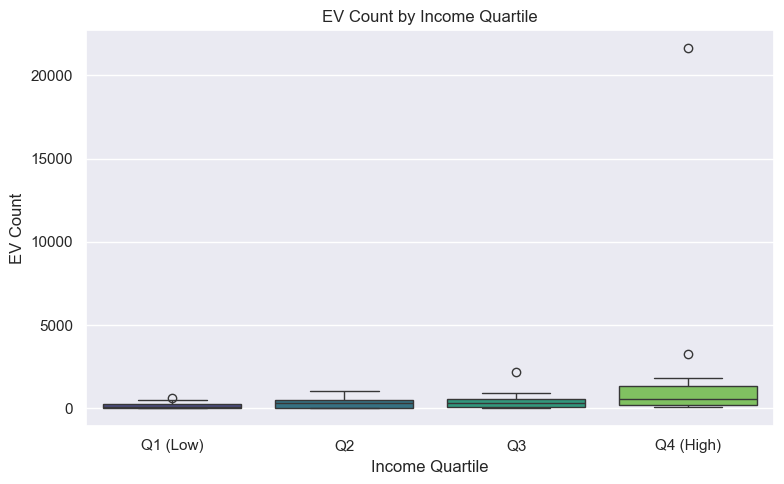

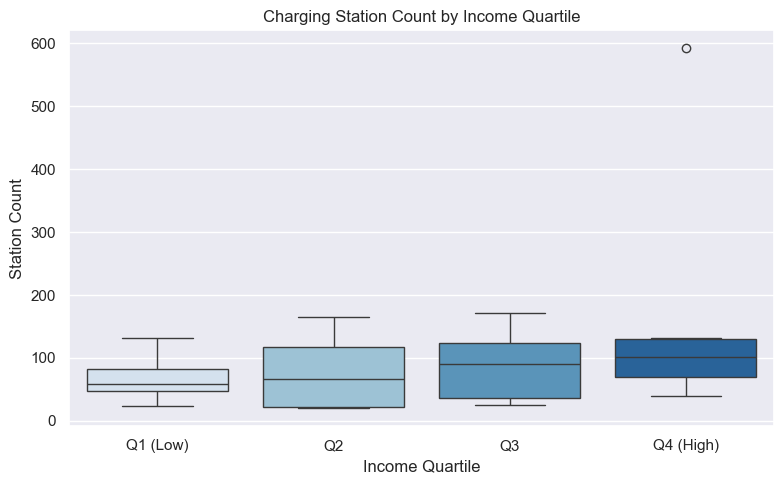

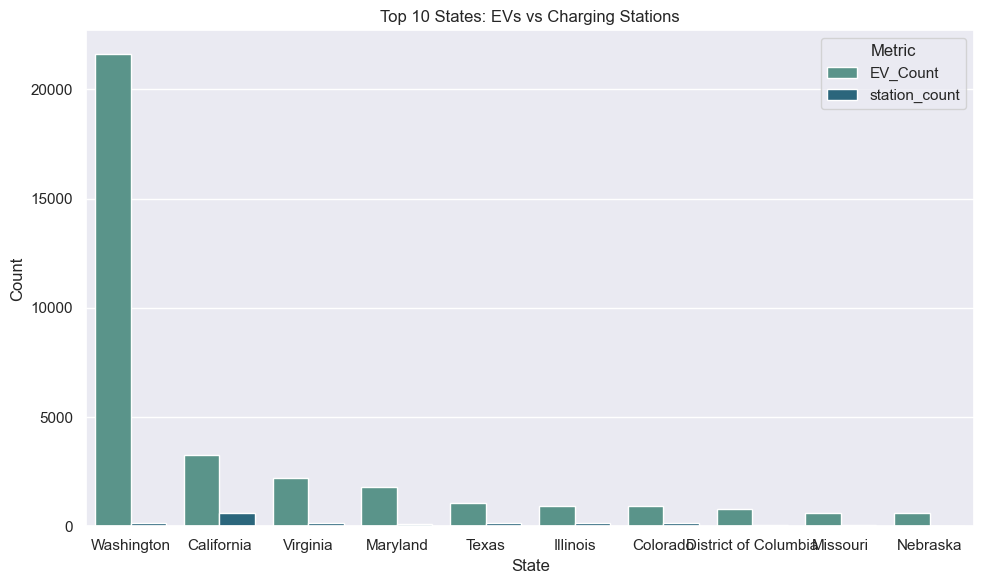

In [ ]:
# ============================================================
# Categorical Features Distribution 
# ============================================================

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you already have merged_df loaded
# and Income Quartile column created like this:
if "Income_Q" not in merged_df.columns:
    merged_df["Income_Q"] = pd.qcut(
        merged_df["median_income"], 4,
        labels=["Q1 (Low)", "Q2", "Q3", "Q4 (High)"]
    )

# ------------------------------------------------------------
#  EV Count by Income Quartile
# ------------------------------------------------------------
plt.figure(figsize=(8,5))
sns.boxplot(x="Income_Q", y="EV_Count", data=merged_df, palette="viridis")
plt.title("EV Count by Income Quartile")
plt.xlabel("Income Quartile")
plt.ylabel("EV Count")
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
#  Charging Station Count by Income Quartile
# ------------------------------------------------------------
plt.figure(figsize=(8,5))
sns.boxplot(x="Income_Q", y="station_count", data=merged_df, palette="Blues")
plt.title("Charging Station Count by Income Quartile")
plt.xlabel("Income Quartile")
plt.ylabel("Station Count")
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
#  Top 10 States by EV Type (if vehicle_type column exists)
# ------------------------------------------------------------
if "vehicle_type" in merged_df.columns:
    plt.figure(figsize=(10,5))
    sns.countplot(
        data=merged_df,
        x="vehicle_type",
        order=merged_df["vehicle_type"].value_counts().index,
        palette="Set2"
    )
    plt.title("Distribution of Vehicle Types")
    plt.xlabel("Vehicle Type")
    plt.ylabel("Count")
    plt.xticks(rotation=25)
    plt.tight_layout()
    plt.show()

# ------------------------------------------------------------
# State-wise Category — EVs vs Stations (Top 10 states)
# ------------------------------------------------------------
top_states = merged_df.nlargest(10, "EV_Count")
plt.figure(figsize=(10,6))
sns.barplot(
    data=top_states.melt(id_vars="state", value_vars=["EV_Count","station_count"]),
    x="state", y="value", hue="variable", palette="crest"
)
plt.title("Top 10 States: EVs vs Charging Stations")
plt.xlabel("State")
plt.ylabel("Count")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


# Animated Growth

In [ ]:
fig = px.scatter(
    ev,
    x="model_year",
    y="electric_range",
    color="state",
    animation_frame="model_year",
    size_max=15,
    title="EV Range and Adoption Trends Over Years"
)
fig.show()


Narrative: EV Adoption Across the United States
1️. Understanding the Landscape: Where Are EVs Concentrated?

The first visualization — a choropleth map of EV adoption by state — reveals a clear regional divide in electric vehicle usage.

The Pacific Northwest and West Coast (especially Washington and California) glow in brighter shades, representing significantly higher EV counts.
In contrast, much of the central and southern United States remains darker, showing slower adoption.

Interpretation:
These trends mirror known policy and economic patterns — states with early EV incentives, higher environmental awareness, and greater urban density show stronger adoption.

2️.Infrastructure Parity: Are Charging Stations Keeping Up?

The dual map comparison between EV adoption and charging infrastructure density tells a story of uneven growth.

California, New York, and Washington lead in both metrics — confirming that policy-driven infrastructure investment directly correlates with adoption.
However, states like Florida and Texas have many EVs but fewer charging stations per capita, indicating potential accessibility challenges.

Takeaway:
Infrastructure is not uniformly scaling with EV demand.
For widespread adoption, the focus must shift from individual incentives to public charging accessibility.

3️.Income Influence: Who Can Afford to Go Electric?

The bubble plot of median income vs EV adoption, sized by charging infrastructure, reinforces the socioeconomic angle.

States with higher median household income — such as California, Washington, and Massachusetts — consistently show higher EV counts and denser charging networks.
Lower-income states (e.g., Arkansas, Mississippi) remain behind, despite national policy pushes.

 Insight:
EVs remain a middle- to upper-income phenomenon, suggesting the need for federal or state-level incentives to bridge affordability gaps.

4️.Efficiency Check: The EV-to-Charging Station Ratio

Next, the EV-to-charging-station ratio bar chart highlights how efficiently states are supporting their fleets.

While California tops absolute numbers, its EV-per-station ratio is one of the highest, signaling potential strain on infrastructure.
Smaller states with moderate EV counts and adequate charging (e.g., Colorado, Maryland) maintain a more balanced ecosystem.

Interpretation:
High EV-to-station ratios may indicate charging congestion in urban areas.
States must plan network expansion in proportion to fleet growth.

5️.Technology Evolution: Growth by Model Year

A time-lapse of EV model year vs range shows how battery technology improvements have supported adoption.
Post-2016, there’s a noticeable increase in both range and number of models, reflecting rapid innovation and consumer confidence.

Storyline:
Early EVs were limited by range anxiety; newer models break that barrier, making EVs a mainstream choice.

Conclusion: The EV Adoption Equation

The combined story shows that EV adoption is not just a technological shift — it’s a systemic transformation driven by three key levers:

Economic capacity (income),

Policy-backed infrastructure, and

Technological evolution.

The U.S. EV landscape is maturing but unequal — the West Coast leads as an early adopter hub, while central states remain underdeveloped in both access and affordability.
Bridging this gap requires not just more EVs, but smart, data-informed infrastructure planning.

# Import & setup (laws & incentives ,SEDS added)

In [ ]:
import os
import numpy as np
import pandas as pd

from sklearn.impute import KNNImputer
from scipy.stats import zscore

BASE_DIR = "data"
PROC_DIR = os.path.join(BASE_DIR, "processed")

master_path = os.path.join(PROC_DIR, "ev_master_merged.csv")
df = pd.read_csv(master_path)

print(df.shape)
df.head()


(45, 29)


,state,state_usps_x,EV_Count,station_count,median_income,population_x,EV_per_1000_pop,Stations_per_100k_pop,EV_per_station,Income_Index,...,num_regulations,policy_score,latest_model_year,n_vehicles_latest,avg_range_latest,bev_share_latest,phev_share_latest,renewable_share_pct,ideal_station_count,charger_gap
0,Alaska,AK,19,25,95665.0,733017.0,0.025920,3.410562,0.760000,1.158441,...,4,8.0,2016,1,19.0,0.0,100.0,0.000000,0.95,-24.05
1,Alabama,AL,42,49,66659.0,5033094.0,0.008345,0.973556,0.857143,0.807197,...,5,13.5,2022,1,42.0,0.0,100.0,25.610119,2.10,-46.90
2,Arkansas,AR,486,49,62106.0,3014546.0,0.161218,1.625452,9.918367,0.752063,...,6,13.0,2022,1,0.0,100.0,0.0,14.905462,24.30,-24.70
3,Arizona,AZ,349,92,81486.0,7187135.0,0.048559,1.280065,3.793478,0.986743,...,10,25.0,2022,1,41.0,0.0,100.0,21.582675,17.45,-74.55
4,California,CA,3259,592,100149.0,39521958.0,0.082460,1.497901,5.505068,1.212740,...,60,148.0,2023,1,0.0,100.0,0.0,2.716721,162.95,-429.05


# Missing data and basic imputation 

In [ ]:
# --- 1.1 Missingness overview ---
na_frac = df.isna().mean().sort_values(ascending=False)
print("Fraction of missing values by column:")
display(na_frac.to_frame("missing_fraction"))

# --- 1.2 Identify numeric vs categorical ---
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols     = df.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numeric cols:", numeric_cols)
print("Categorical cols:", cat_cols)

# Make a working copy for simple imputation
df_simple = df.copy()

# --- 1.3 Simple numeric imputation (Median, with all-NaN handling) ---
for c in numeric_cols:
    if df_simple[c].isna().any():
        if df_simple[c].notna().any():
            # normal case: column has some real values
            median_val = df_simple[c].median()
        else:
            # column is entirely NaN → choose a default
            print(f"⚠ Column '{c}' is all NaN — filling with 0 as default.")
            median_val = 0
        df_simple[c] = df_simple[c].fillna(median_val)

# --- 1.4 Simple categorical imputation (Mode, with all-NaN handling) ---
for c in cat_cols:
    if df_simple[c].isna().any():
        non_na = df_simple[c].dropna()
        if not non_na.empty:
            mode_val = non_na.mode()
            if not mode_val.empty:
                fill_val = mode_val.iloc[0]
            else:
                fill_val = "Unknown"
        else:
            # entire column is NaN
            print(f"⚠ Categorical column '{c}' is all NaN — filling with 'Unknown'.")
            fill_val = "Unknown"

        df_simple[c] = df_simple[c].fillna(fill_val)

print("After simple imputation, any NA left?", df_simple.isna().any().any())

if df_simple.isna().any().any():
    print("\n🔍 Columns still containing missing values AFTER simple imputation:")
    remaining_na = df_simple.isna().sum()
    remaining_na = remaining_na[remaining_na > 0]
    print(remaining_na)


Fraction of missing values by column:


,missing_fraction
station_count_stations_extra,1.000000
EV_per_1000_pop,0.022222
Stations_per_100k_pop,0.022222
population_x,0.022222
population_y,0.022222
median_income,0.000000
station_count,0.000000
EV_Count,0.000000
state_usps_x,0.000000
state,0.000000


Numeric cols: ['EV_Count', 'station_count', 'median_income', 'population_x', 'EV_per_1000_pop', 'Stations_per_100k_pop', 'EV_per_station', 'Income_Index', 'population_y', 'station_count_stations_extra', 'median_income_income_extra', 'renewable_energy_btu', 'total_energy_btu', 'renewable_share', 'num_ev_laws', 'num_incentives', 'num_regulations', 'policy_score', 'latest_model_year', 'n_vehicles_latest', 'avg_range_latest', 'bev_share_latest', 'phev_share_latest', 'renewable_share_pct', 'ideal_station_count', 'charger_gap']
Categorical cols: ['state', 'state_usps_x', 'state_usps_y']
⚠ Column 'station_count_stations_extra' is all NaN — filling with 0 as default.
After simple imputation, any NA left? False


# KNN Imputation for key numeric features 

In [ ]:
from copy import deepcopy
from sklearn.preprocessing import StandardScaler

# choose a subset of numeric columns for KNN imputation
knn_features = [
    "EV_Count",
    "station_count",
    "median_income",
    "population",
    "ev_per_1000",
    "stations_per_100k",
    "policy_score",
    "num_incentives",
    "num_regulations",
    "renewable_share_pct",
]

knn_features = [c for c in knn_features if c in df.columns]
print("KNN feature set:", knn_features)

df_knn = df.copy()

# --- 2.1 Use median for cats and other nums as a fallback ---
for c in numeric_cols:
    median_val = df_knn[c].median()
    df_knn[c] = df_knn[c].fillna(median_val)

for c in cat_cols:
    mode_val = df_knn[c].mode(dropna=True)
    if not mode_val.empty:
        df_knn[c] = df_knn[c].fillna(mode_val.iloc[0])

# --- 2.2 Apply KNN only on selected features ---
knn_data = df_knn[knn_features].copy()

imputer = KNNImputer(n_neighbors=5, weights="distance")
knn_imputed_array = imputer.fit_transform(knn_data)
knn_imputed = pd.DataFrame(knn_imputed_array, columns=knn_features)

# overwrite those columns with KNN-imputed values
for c in knn_features:
    df_knn[c] = knn_imputed[c]

print("KNN imputed NA check:", df_knn[knn_features].isna().any().any())


KNN feature set: ['EV_Count', 'station_count', 'median_income', 'policy_score', 'num_incentives', 'num_regulations', 'renewable_share_pct']
KNN imputed NA check: False


c:\Users\palicher\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [ ]:
%pip install plotly


  Using cached plotly-6.5.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached narwhals-2.13.0-py3-none-any.whl.metadata (12 kB)
Using cached plotly-6.5.0-py3-none-any.whl (9.9 MB)
Using cached narwhals-2.13.0-py3-none-any.whl (426 kB)

   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhal

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Make plots prettier
sns.set(style="whitegrid", font_scale=1.1)

print("Raw shape:", df.shape)
print("Simple-imputed shape:", df_simple.shape)
print("KNN-imputed shape:", df_knn.shape)

na_before = df.isna().mean().rename("missing_before")
na_simple = df_simple.isna().mean().rename("missing_after_simple")
na_knn    = df_knn.isna().mean().rename("missing_after_knn")

miss_df = pd.concat([na_before, na_simple, na_knn], axis=1)
miss_df["missing_before_pct"]  = (miss_df["missing_before"] * 100).round(1)
miss_df["missing_after_simple_pct"] = (miss_df["missing_after_simple"] * 100).round(1)
miss_df["missing_after_knn_pct"]    = (miss_df["missing_after_knn"] * 100).round(1)

miss_df_sorted = miss_df.sort_values("missing_before_pct", ascending=False)

miss_df_sorted.head(20)



Raw shape: (45, 29)
Simple-imputed shape: (45, 29)
KNN-imputed shape: (45, 29)


,missing_before,missing_after_simple,missing_after_knn,missing_before_pct,missing_after_simple_pct,missing_after_knn_pct
station_count_stations_extra,1.000000,0.0,1.0,100.0,0.0,100.0
EV_per_1000_pop,0.022222,0.0,0.0,2.2,0.0,0.0
Stations_per_100k_pop,0.022222,0.0,0.0,2.2,0.0,0.0
population_x,0.022222,0.0,0.0,2.2,0.0,0.0
population_y,0.022222,0.0,0.0,2.2,0.0,0.0
median_income,0.000000,0.0,0.0,0.0,0.0,0.0
station_count,0.000000,0.0,0.0,0.0,0.0,0.0
EV_Count,0.000000,0.0,0.0,0.0,0.0,0.0
state_usps_x,0.000000,0.0,0.0,0.0,0.0,0.0
state,0.000000,0.0,0.0,0.0,0.0,0.0


# Heatmap

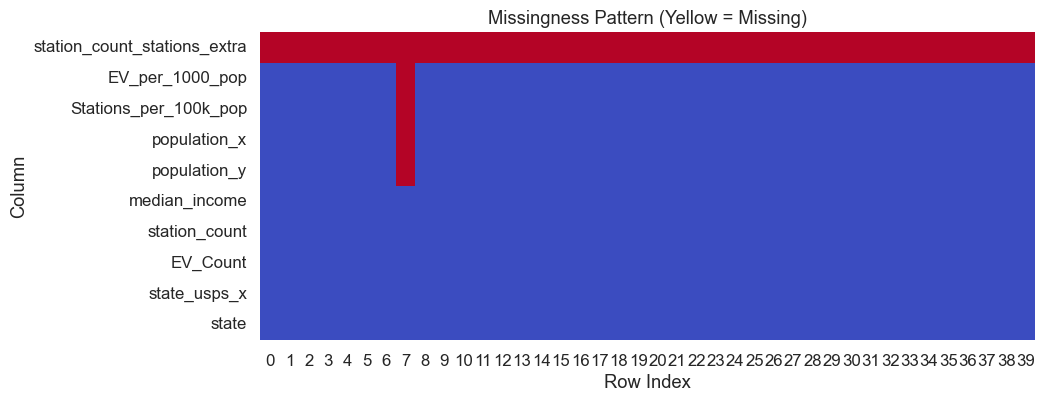

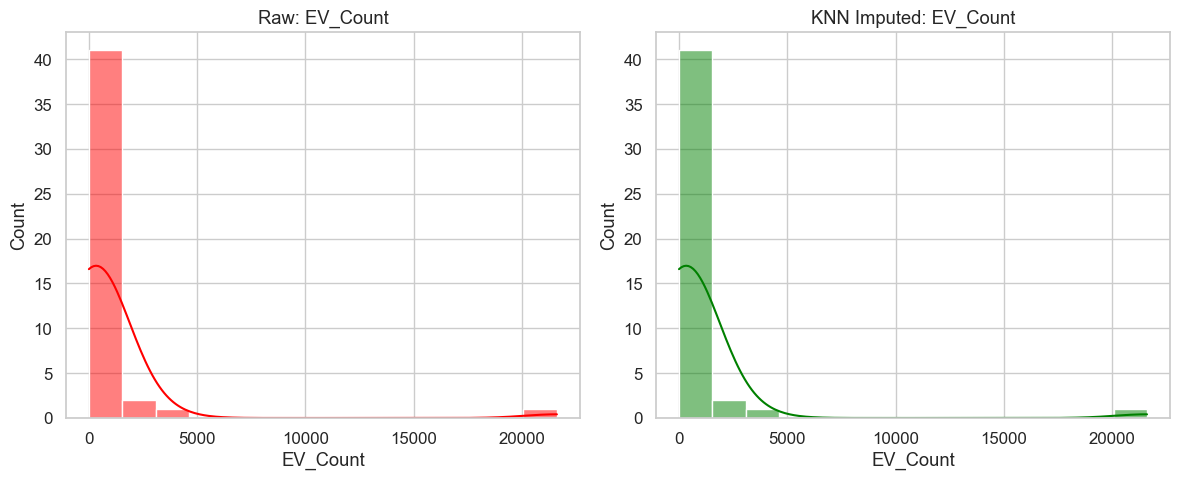

In [ ]:
subset_cols = miss_df_sorted.head(10).index.tolist()  # top 10 columns with most missing
heat_data = df[subset_cols].isna().head(40)  # first 40 rows

plt.figure(figsize=(10,4))
sns.heatmap(heat_data.T, cmap="coolwarm", cbar=False)
plt.title("Missingness Pattern (Yellow = Missing)")
plt.xlabel("Row Index")
plt.ylabel("Column")
plt.show()

numeric_cols = df_knn.select_dtypes(include=[np.number]).columns.tolist()

feature = "EV_Count"  

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df[feature], kde=True, color="red")
plt.title(f"Raw: {feature}")

plt.subplot(1,2,2)
sns.histplot(df_knn[feature], kde=True, color="green")
plt.title(f"KNN Imputed: {feature}")

plt.tight_layout()
plt.show()



# Outlier detection

In [ ]:
# Key columns to check for outliers
outlier_cols = [
    "EV_Count",
    "station_count",
    "median_income",
    "ev_per_1000",
    "stations_per_100k",
    "renewable_share_pct",
    "policy_score",
]

outlier_cols = [c for c in outlier_cols if c in df_knn.columns]

print("Outlier check on:", outlier_cols)

z_df = df_knn[outlier_cols].apply(lambda x: zscore(x, nan_policy='omit'))
z_df.columns = [c + "_z" for c in z_df.columns]

# Attach z-scores to df_knn
df_knn = pd.concat([df_knn, z_df], axis=1)

# Flag extreme outliers |z| > 3
for c in outlier_cols:
    z_col = c + "_z"
    out_flag_col = c + "_outlier_flag"
    df_knn[out_flag_col] = df_knn[z_col].abs() > 3

# Summary of how many outliers per column
outlier_counts = {
    c: int(df_knn[c + "_outlier_flag"].sum())
    for c in outlier_cols
}

print("Outlier counts (|z|>3):")
for k, v in outlier_counts.items():
    print(f"  {k}: {v}")


Outlier check on: ['EV_Count', 'station_count', 'median_income', 'renewable_share_pct', 'policy_score']
Outlier counts (|z|>3):
  EV_Count: 1
  station_count: 1
  median_income: 0
  renewable_share_pct: 0
  policy_score: 1


# Feature engineering 

In [ ]:
def safe_div(a, b):
    return np.where(b == 0, np.nan, a / b)

#  EV per 1000 residents
if {"EV_Count", "population"}.issubset(df_knn.columns):
    df_knn["ev_per_1000"] = safe_div(df_knn["EV_Count"], df_knn["population"]) * 1000

# Stations per 100k residents
if {"station_count", "population"}.issubset(df_knn.columns):
    df_knn["stations_per_100k"] = safe_div(df_knn["station_count"], df_knn["population"]) * 100000

# EV per station
if {"EV_Count", "station_count"}.issubset(df_knn.columns):
    df_knn["ev_per_station"] = safe_div(df_knn["EV_Count"], df_knn["station_count"])
# region mapping (Census-style)
region_map = {
    # Northeast
    "Maine":"Northeast","New Hampshire":"Northeast","Vermont":"Northeast",
    "Massachusetts":"Northeast","Rhode Island":"Northeast","Connecticut":"Northeast",
    "New York":"Northeast","New Jersey":"Northeast","Pennsylvania":"Northeast",
    # Midwest
    "Ohio":"Midwest","Indiana":"Midwest","Illinois":"Midwest","Michigan":"Midwest","Wisconsin":"Midwest",
    "Minnesota":"Midwest","Iowa":"Midwest","Missouri":"Midwest","North Dakota":"Midwest","South Dakota":"Midwest",
    "Nebraska":"Midwest","Kansas":"Midwest",
    # South
    "Delaware":"South","Maryland":"South","District of Columbia":"South","Virginia":"South","West Virginia":"South",
    "North Carolina":"South","South Carolina":"South","Georgia":"South","Florida":"South",
    "Kentucky":"South","Tennessee":"South","Alabama":"South","Mississippi":"South",
    "Arkansas":"South","Louisiana":"South","Oklahoma":"South","Texas":"South",
    # West
    "Montana":"West","Idaho":"West","Wyoming":"West","Colorado":"West","New Mexico":"West",
    "Arizona":"West","Utah":"West","Nevada":"West",
    "Washington":"West","Oregon":"West","California":"West","Alaska":"West","Hawaii":"West",
}

if "state" in df_knn.columns:
    df_knn["region"] = df_knn["state"].map(region_map)

print(df_knn[["state", "region"]].head())

# One-hot encode region
df_knn = pd.get_dummies(df_knn, columns=["region"], prefix="region", dummy_na=False)
# Income bins (quartiles)
if "median_income" in df_knn.columns:
    df_knn["income_bin"] = pd.qcut(
        df_knn["median_income"],
        q=4,
        labels=["Q1 (Low)", "Q2", "Q3", "Q4 (High)"]
    )

# Policy score bins
if "policy_score" in df_knn.columns:
    df_knn["policy_bin"] = pd.qcut(
        df_knn["policy_score"].rank(method="first"), 
        q=4,
        labels=["Low Policy", "Mid-Low", "Mid-High", "High Policy"]
    )

df_knn[["state", "median_income", "income_bin", "policy_score", "policy_bin"]].head()

# Income bins (quartiles)
if "median_income" in df_knn.columns:
    df_knn["income_bin"] = pd.qcut(
        df_knn["median_income"],
        q=4,
        labels=["Q1 (Low)", "Q2", "Q3", "Q4 (High)"]
    )

# Policy score bins
if "policy_score" in df_knn.columns:
    df_knn["policy_bin"] = pd.qcut(
        df_knn["policy_score"].rank(method="first"), 
        q=4,
        labels=["Low Policy", "Mid-Low", "Mid-High", "High Policy"]
    )

df_knn[["state", "median_income", "income_bin", "policy_score", "policy_bin"]].head()

# EV x policy interaction: states with both strong policy and many EVs
if {"EV_Count", "policy_score"}.issubset(df_knn.columns):
    df_knn["ev_policy_interaction"] = df_knn["EV_Count"] * df_knn["policy_score"]

# Infra readiness: chargers per EV weighted by policy
if {"ev_per_station", "policy_score"}.issubset(df_knn.columns):
    df_knn["infra_policy_readiness"] = df_knn["policy_score"] / df_knn["ev_per_station"].replace(0, np.nan)

# Clean energy adoption advantage: EV per 1000 × renewable share
if {"ev_per_1000", "renewable_share_pct"}.issubset(df_knn.columns):
    df_knn["clean_energy_ev_index"] = df_knn["ev_per_1000"] * (df_knn["renewable_share_pct"] / 100.0)
# Simple-imputation version (no KNN) if you want it
simple_path = os.path.join(PROC_DIR, "ev_master_imputed_simple.csv")
df_simple.to_csv(simple_path, index=False)
print(" Saved simple-imputed master →", simple_path)

# KNN + features version
features_path = os.path.join(PROC_DIR, "ev_master_features_knn.csv")
df_knn.to_csv(features_path, index=False)
print(" Saved feature-enhanced master →", features_path)




        state region
0      Alaska   West
1     Alabama  South
2    Arkansas  South
3     Arizona   West
4  California   West
 Saved simple-imputed master → data\processed\ev_master_imputed_simple.csv
 Saved feature-enhanced master → data\processed\ev_master_features_knn.csv


# EDA


In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.set(style="whitegrid", font_scale=1.1)

# Start from KNN-imputed master
eda = df_knn.copy()

# Build clean feature columns if not already present
if "EV_per_1000_pop" in eda.columns:
    eda["ev_per_1000"] = pd.to_numeric(eda["EV_per_1000_pop"], errors="coerce")
if "Stations_per_100k_pop" in eda.columns:
    eda["stations_per_100k"] = pd.to_numeric(eda["Stations_per_100k_pop"], errors="coerce")
if "renewable_share_pct" in eda.columns:
    eda["renewable_share"] = pd.to_numeric(eda["renewable_share_pct"], errors="coerce")
if "median_income" in eda.columns:
    eda["income"] = pd.to_numeric(eda["median_income"], errors="coerce")
if "policy_score" in eda.columns:
    eda["policy"] = pd.to_numeric(eda["policy_score"], errors="coerce")

# Region from any state_usps* col
usps_col = None
for c in ["state_usps_x", "state_usps_y", "state_usps"]:
    if c in eda.columns:
        usps_col = c
        break

if usps_col is not None:
    eda[usps_col] = eda[usps_col].astype(str).str.upper().str.strip()

    northeast = {"ME","NH","VT","MA","RI","CT","NY","NJ","PA"}
    midwest   = {"OH","MI","IN","IL","WI","MN","IA","MO","ND","SD","NE","KS"}
    south     = {"DE","MD","DC","VA","WV","NC","SC","GA","FL","KY","TN","AL","MS","AR","LA","OK","TX"}
    west      = {"MT","ID","WY","CO","NM","AZ","UT","NV","WA","OR","CA","AK","HI"}

    def region(usps):
        if usps in northeast: return "Northeast"
        if usps in midwest:   return "Midwest"
        if usps in south:     return "South"
        if usps in west:      return "West"
        return "Other"

    eda["region"] = eda[usps_col].map(region)

# Policy quartiles (for color/hue)
if "policy" in eda.columns:
    eda["policy_quartile"] = pd.qcut(
        eda["policy"],
        4,
        labels=["Q1 Low", "Q2", "Q3", "Q4 High"]
    )

# Renewable categories
if "renewable_share" in eda.columns:
    eda["renewable_high"] = pd.cut(
        eda["renewable_share"],
        bins=[-0.1, 10, 30, 100],
        labels=["Low", "Medium", "High"]
    )

print(eda[["state", "ev_per_1000", "stations_per_100k", "income", "policy"]].head())


        state  ev_per_1000  stations_per_100k    income  policy
0      Alaska     0.025920           3.410562   95665.0     8.0
1     Alabama     0.008345           0.973556   66659.0    13.5
2    Arkansas     0.161218           1.625452   62106.0    13.0
3     Arizona     0.048559           1.280065   81486.0    25.0
4  California     0.082460           1.497901  100149.0   148.0


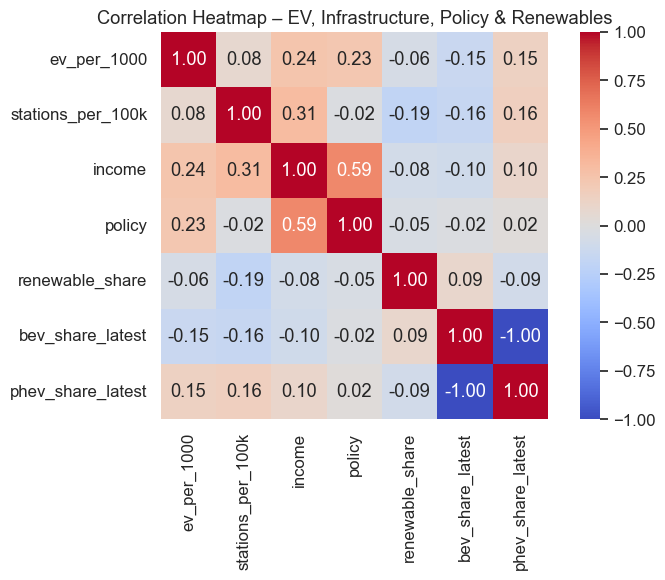

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.set(style="whitegrid", font_scale=1.1)

# -----------------------------
# 1. Work on a copy
# -----------------------------
eda = df_knn.copy()

# Short, readable column aliases
eda = eda.rename(columns={
    "EV_Count": "ev_count",
    "EV_per_1000_pop": "ev_per_1000",
    "Stations_per_100k_pop": "stations_per_100k",
    # keep renewable_share_pct as-is to avoid duplicate names
    "policy_score": "policy",
    "median_income": "income"
})

# -----------------------------
# 2. Grouping / binning variables
# -----------------------------

# Policy & income quartiles
eda["policy_quartile"] = pd.qcut(
    eda["policy"], 4, labels=["Q1 Low", "Q2", "Q3", "Q4 High"]
)

eda["income_quartile"] = pd.qcut(
    eda["income"], 4, labels=["Q1 Low", "Q2", "Q3", "Q4 High"]
)

# Renewable share bands based on renewable_share_pct
eda["renewable_band"] = pd.cut(
    eda["renewable_share_pct"],        # <-- use pct column
    bins=[-0.1, 10, 30, 100],
    labels=["Low", "Medium", "High"]
)

# -----------------------------
# 3. Simple US region mapping
# -----------------------------
northeast = {"ME","NH","VT","MA","RI","CT","NY","NJ","PA"}
midwest   = {"OH","MI","IN","IL","WI","MN","IA","MO","ND","SD","NE","KS"}
south     = {"DE","MD","DC","VA","WV","NC","SC","GA","FL","KY","TN","AL","MS","AR","LA","OK","TX"}
west      = {"MT","ID","WY","CO","NM","AZ","UT","NV","WA","OR","CA","AK","HI"}

def region(usps):
    if usps in northeast: return "Northeast"
    if usps in midwest:   return "Midwest"
    if usps in south:     return "South"
    if usps in west:      return "West"
    return "Other"

eda["region"] = eda["state_usps_x"].map(region)
num_cols = ["ev_per_1000", "stations_per_100k",
            "income", "policy", "renewable_share",
            "bev_share_latest", "phev_share_latest"]

corr = eda[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap – EV, Infrastructure, Policy & Renewables")
plt.tight_layout()
plt.show()


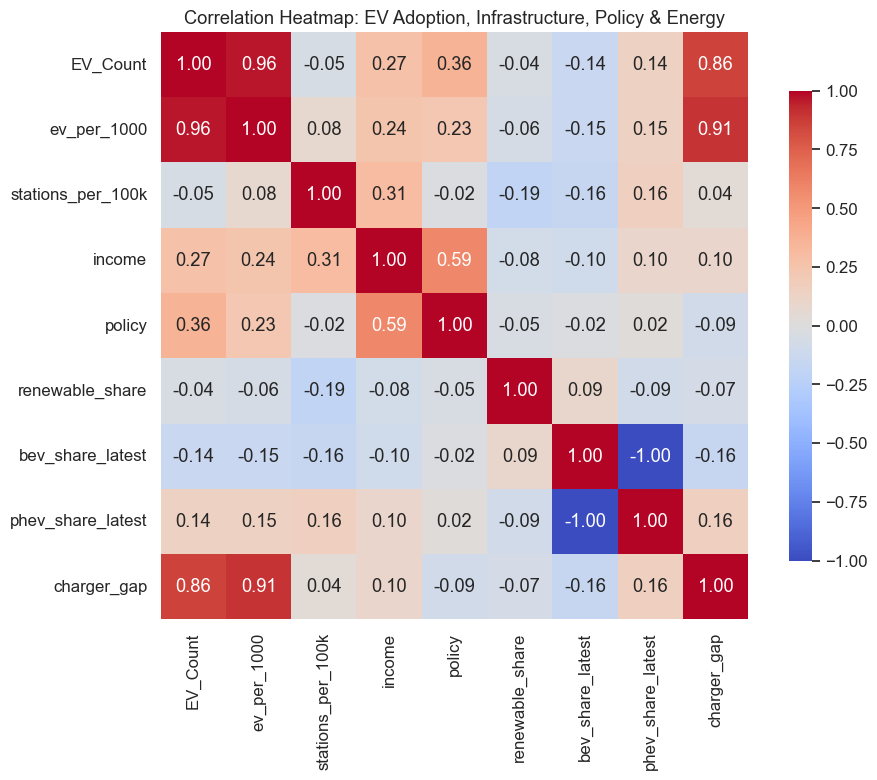

In [57]:
# Pick important numeric features
corr_cols = [
    "EV_Count", "ev_per_1000", "stations_per_100k",
    "income", "policy", "renewable_share",
    "bev_share_latest", "phev_share_latest",
    "charger_gap"
]

corr_cols = [c for c in corr_cols if c in eda.columns]

corr = eda[corr_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap: EV Adoption, Infrastructure, Policy & Energy")
plt.tight_layout()
plt.show()


# Pair plot 

Shape used for pairplot: (45, 6)
Dtypes:
 ev_per_1000            float64
stations_per_100k      float64
income                 float64
policy                 float64
renewable_share_pct    float64
policy_quartile         object
dtype: object


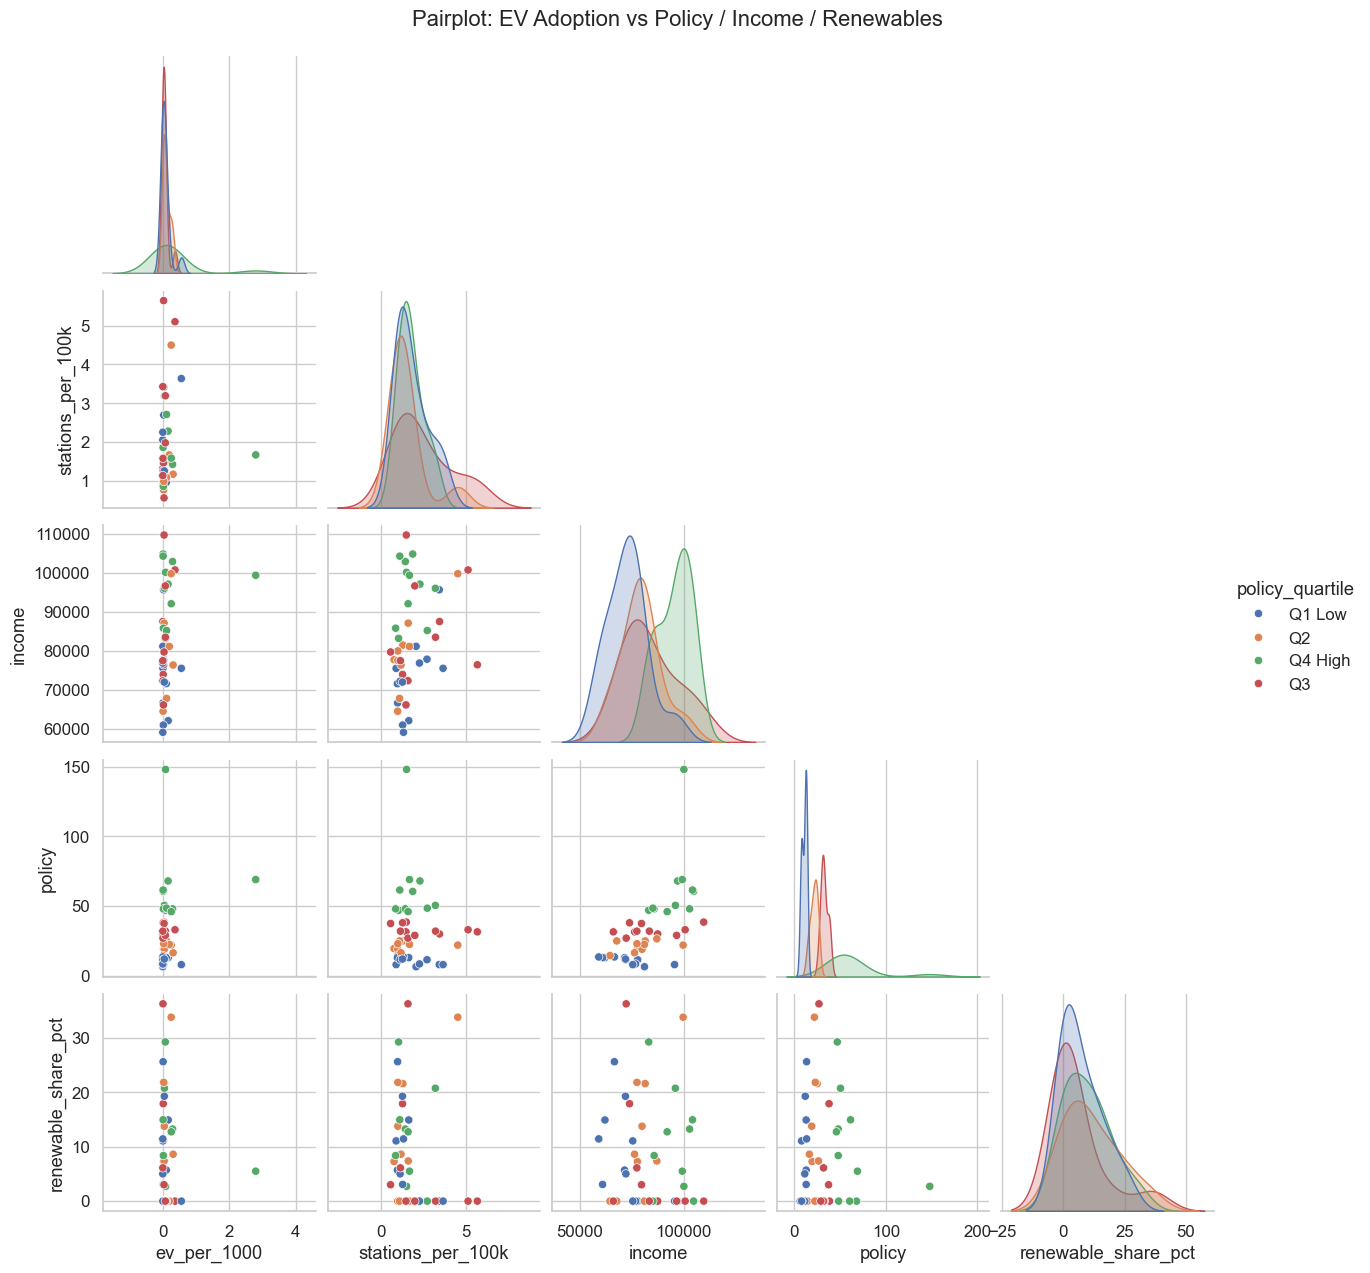

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set(style="whitegrid", font_scale=1.1)

# Columns to include in the pairplot
pair_cols = ["ev_per_1000", "stations_per_100k", "income", "policy", "renewable_share_pct"]
pair_cols = [c for c in pair_cols if c in eda.columns]  # safety

# Build a clean DataFrame for pairplot
eda_pair = eda[pair_cols + ["policy_quartile"]].copy()

# Ensure all feature columns are numeric
for c in pair_cols:
    eda_pair[c] = pd.to_numeric(eda_pair[c], errors="coerce")

# Drop any rows with NA in numeric or hue
eda_pair = eda_pair.dropna(subset=pair_cols + ["policy_quartile"])

# Make hue a simple string (avoids categorical weirdness)
eda_pair["policy_quartile"] = eda_pair["policy_quartile"].astype(str)

print("Shape used for pairplot:", eda_pair.shape)
print("Dtypes:\n", eda_pair.dtypes)

sns.pairplot(
    data=eda_pair,
    vars=pair_cols,
    hue="policy_quartile",
    corner=True,
    diag_kind="kde"
)
plt.suptitle("Pairplot: EV Adoption vs Policy / Income / Renewables", y=1.02)
plt.show()


# Box/ Violin plot

# Ev adoption by policy quartile 

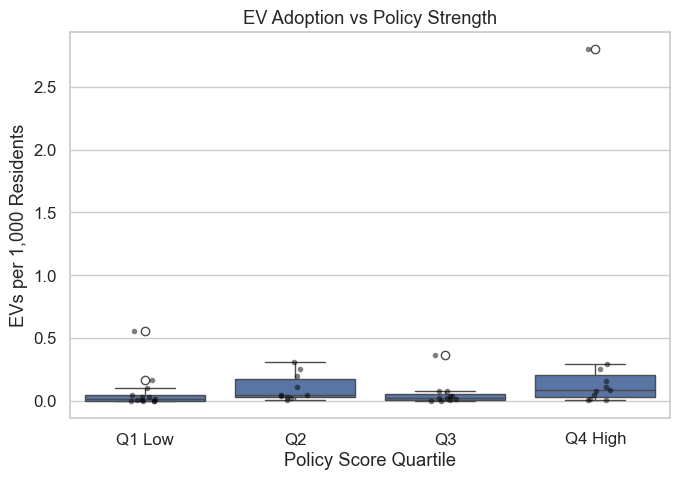

In [44]:
plt.figure(figsize=(7,5))
sns.boxplot(data=eda, x="policy_quartile", y="ev_per_1000")
sns.stripplot(data=eda, x="policy_quartile", y="ev_per_1000",
              color="black", alpha=0.5, size=4)
plt.xlabel("Policy Score Quartile")
plt.ylabel("EVs per 1,000 Residents")
plt.title("EV Adoption vs Policy Strength")
plt.tight_layout()
plt.show()


# EV adoption by renewable high

Columns in eda:
 Index(['state', 'state_usps_x', 'ev_count', 'station_count', 'income',
       'population_x', 'ev_per_1000', 'stations_per_100k', 'EV_per_station',
       'Income_Index', 'population_y', 'station_count_stations_extra',
       'median_income_income_extra', 'renewable_energy_btu',
       'total_energy_btu', 'renewable_share', 'state_usps_y', 'num_ev_laws',
       'num_incentives', 'num_regulations', 'policy', 'latest_model_year',
       'n_vehicles_latest', 'avg_range_latest', 'bev_share_latest',
       'phev_share_latest', 'renewable_share', 'ideal_station_count',
       'charger_gap', 'EV_Count_z', 'station_count_z', 'median_income_z',
       'renewable_share_pct_z', 'policy_score_z', 'EV_Count_outlier_flag',
       'station_count_outlier_flag', 'median_income_outlier_flag',
       'renewable_share_pct_outlier_flag', 'policy_score_outlier_flag',
       'ev_per_station', 'region_Midwest', 'region_Northeast', 'region_South',
       'region_West', 'region_Midwest', 'regio

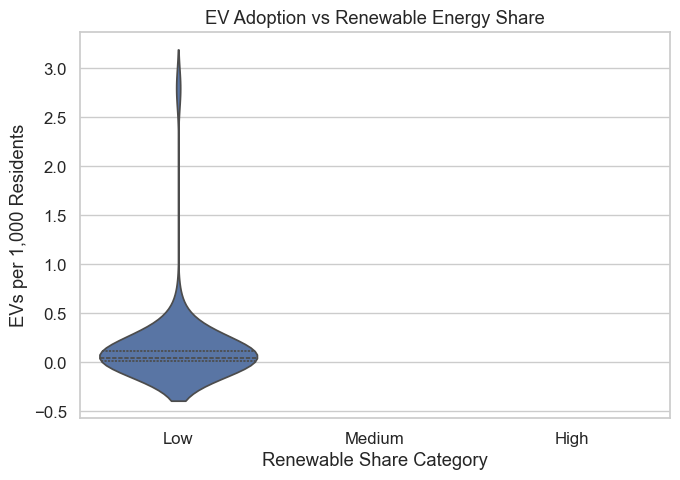

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", font_scale=1.1)

#  Fresh EDA copy
eda = df_knn.copy()

# Rename to shorter / consistent names
eda = eda.rename(columns={
    "EV_Count": "ev_count",
    "EV_per_1000_pop": "ev_per_1000",
    "Stations_per_100k_pop": "stations_per_100k",
    "renewable_share_pct": "renewable_share",   # <- from your merged df
    "policy_score": "policy",
    "median_income": "income"
})

print("Columns in eda:\n", eda.columns)

#  Extract a 1D version of renewable_share
raw_rs = eda["renewable_share"]

# If duplicate column names exist, this may be a DataFrame; handle both cases
if isinstance(raw_rs, pd.DataFrame):
    # Take the first column if it's a DataFrame with duplicate name
    rs_series = raw_rs.iloc[:, 0]
else:
    rs_series = raw_rs

eda["renewable_share_clean"] = pd.to_numeric(rs_series, errors="coerce")

#  Create renewable_high categories using the clean numeric column
eda["renewable_high"] = pd.cut(
    eda["renewable_share_clean"],
    bins=[-0.1, 10, 30, 100],          # tweak thresholds if you want
    labels=["Low", "Medium", "High"]
)

#  Drop rows with missing values in required columns
plot_df = eda.dropna(subset=["renewable_high", "ev_per_1000"])

print("Value counts for renewable_high:\n", plot_df["renewable_high"].value_counts(dropna=False))

#  Violin plot
plt.figure(figsize=(7, 5))
sns.violinplot(
    data=plot_df,
    x="renewable_high",
    y="ev_per_1000",
    inner="quartile"
)
plt.xlabel("Renewable Share Category")
plt.ylabel("EVs per 1,000 Residents")
plt.title("EV Adoption vs Renewable Energy Share")
plt.tight_layout()
plt.show()


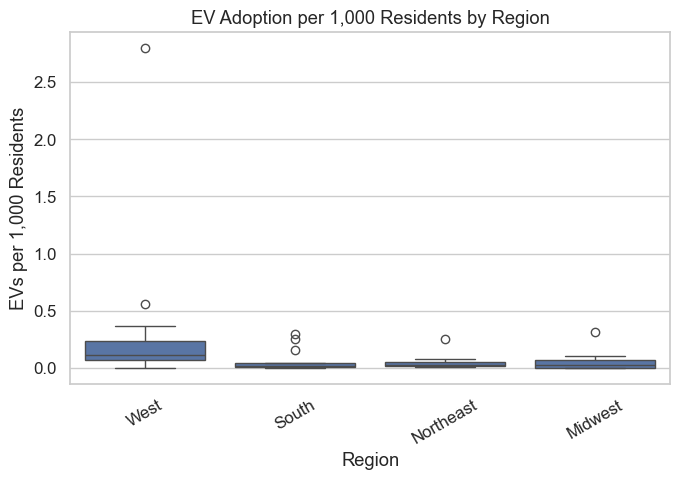

In [58]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=eda, x="region", y="ev_per_1000")
plt.xlabel("Region")
plt.ylabel("EVs per 1,000 Residents")
plt.title("EV Adoption per 1,000 Residents by Region")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


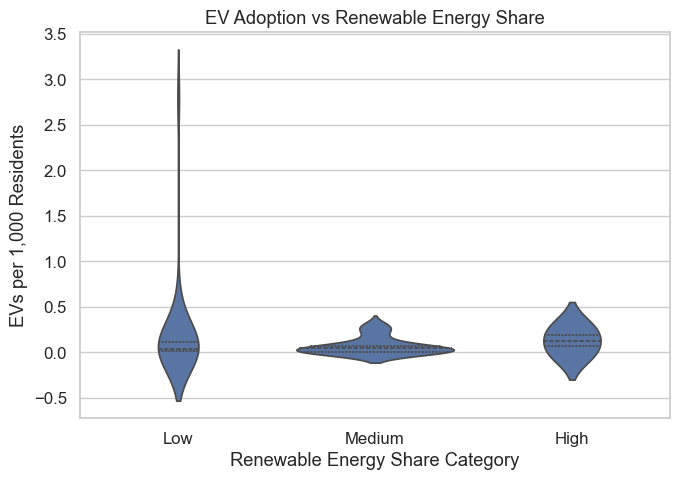

In [59]:
plt.figure(figsize=(7, 5))
sns.violinplot(
    data=eda,
    x="renewable_high",
    y="ev_per_1000",
    inner="quartile"
)
plt.xlabel("Renewable Energy Share Category")
plt.ylabel("EVs per 1,000 Residents")
plt.title("EV Adoption vs Renewable Energy Share")
plt.tight_layout()
plt.show()


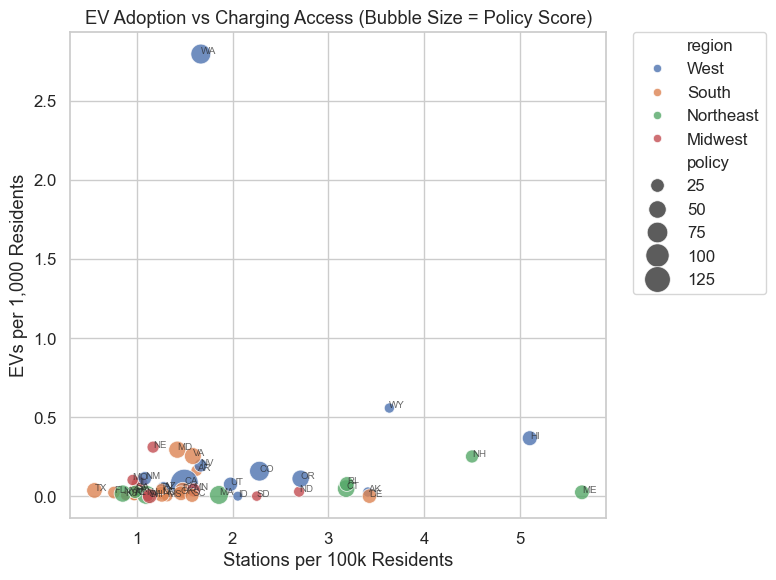

In [60]:
plt.figure(figsize=(8, 6))

plot_df = eda.dropna(subset=["ev_per_1000", "stations_per_100k", "policy", "region"])

sns.scatterplot(
    data=plot_df,
    x="stations_per_100k",
    y="ev_per_1000",
    size="policy",
    hue="region",
    sizes=(50, 400),
    alpha=0.8
)

for _, row in plot_df.iterrows():
    plt.text(
        row["stations_per_100k"],
        row["ev_per_1000"],
        row["state_usps_x"] if "state_usps_x" in row.index else "",
        fontsize=7,
        alpha=0.7
    )

plt.xlabel("Stations per 100k Residents")
plt.ylabel("EVs per 1,000 Residents")
plt.title("EV Adoption vs Charging Access (Bubble Size = Policy Score)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)
plt.tight_layout()
plt.show()


# Radar Chart 

Radar will plot these states: ['California', 'Texas', 'Florida']


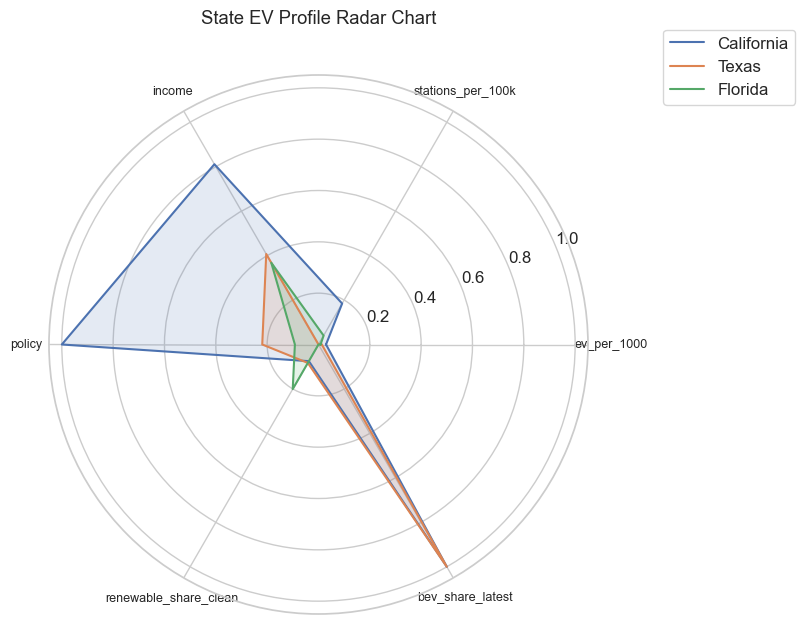

In [ ]:
from math import pi
import numpy as np
import matplotlib.pyplot as plt

#  Make sure we have the right columns for the radar
radar_vars = [
    "ev_per_1000",
    "stations_per_100k",
    "income",
    "policy",
    "renewable_share_clean",   # use the cleaned numeric version
    "bev_share_latest",
]

missing_cols = [c for c in radar_vars if c not in eda.columns]
if missing_cols:
    print("⚠ These radar vars are missing from eda:", missing_cols)

# Keep only existing columns
radar_vars = [c for c in radar_vars if c in eda.columns]

#  Use 'state' as index (if that's full names)
#    If your states are USPS codes, change "state" → "state_usps_x"
radar_df = eda.set_index("state")[radar_vars]

# Drop rows where everything is NaN
radar_df = radar_df.dropna(how="all")

#  Pick states to plot, but only keep the ones that exist in the index
requested_states = ["California", "Texas", "Michigan", "Florida"]
states_to_plot = [s for s in requested_states if s in radar_df.index]

if not states_to_plot:
    print("⚠ None of the requested states found in index.")
    print("Available state examples:", radar_df.index.unique().tolist()[:10])
else:
    print("Radar will plot these states:", states_to_plot)

    #  Normalize 0–1 for each variable
    radar_norm = (radar_df - radar_df.min()) / (radar_df.max() - radar_df.min())

    # Filter to selected states & drop remaining NaNs
    radar_data = radar_norm.loc[states_to_plot].dropna()

    #  Build the radar chart
    labels = radar_vars
    N = len(labels)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]  # close the loop

    plt.figure(figsize=(7, 7))
    ax = plt.subplot(111, polar=True)

    for state_name, row in radar_data.iterrows():
        values = row.values.tolist()
        values += values[:1]  # close the loop
        ax.plot(angles, values, linewidth=1.5, label=state_name)
        ax.fill(angles, values, alpha=0.15)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=9)
    ax.set_title("State EV Profile Radar Chart", y=1.08)
    ax.legend(loc="upper right", bbox_to_anchor=(1.4, 1.1))
    plt.show()


# PCA Scatter

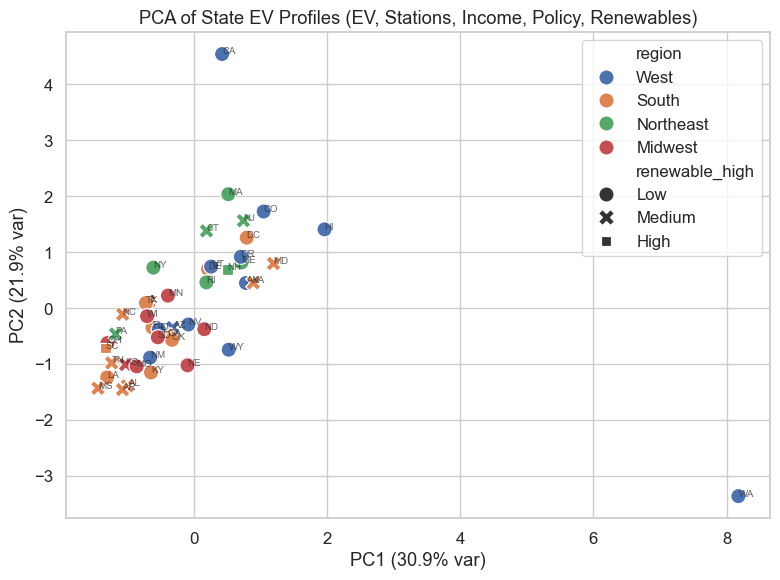

In [62]:
from sklearn.decomposition import PCA

pca_cols = [
    "ev_per_1000", "stations_per_100k",
    "income", "policy", "renewable_share",
    "bev_share_latest", "charger_gap"
]
pca_cols = [c for c in pca_cols if c in eda.columns]

pca_df = eda.dropna(subset=pca_cols + ["region"]).copy()

X = pca_df[pca_cols].values
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df["PC1"] = X_pca[:, 0]
pca_df["PC2"] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=pca_df,
    x="PC1",
    y="PC2",
    hue="region",
    style="renewable_high",
    s=120
)

for _, row in pca_df.iterrows():
    plt.text(row["PC1"], row["PC2"], row[usps_col], fontsize=7, alpha=0.7)

plt.title("PCA of State EV Profiles (EV, Stations, Income, Policy, Renewables)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)")
plt.tight_layout()
plt.show()


# Joint plot

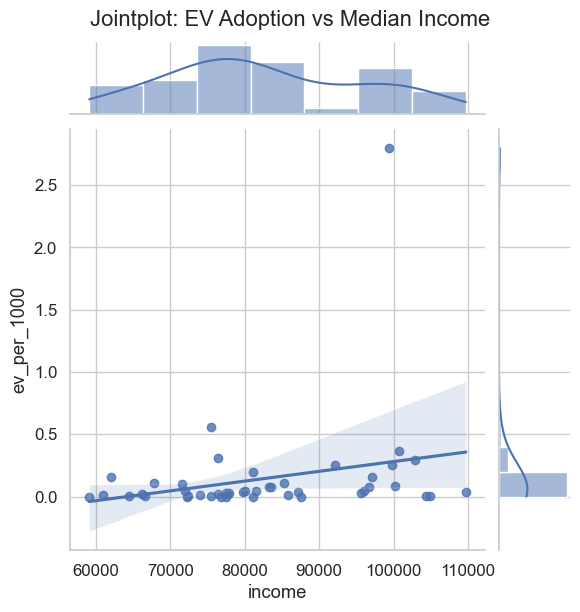

In [63]:
sns.jointplot(
    data=eda,
    x="income",
    y="ev_per_1000",
    kind="reg",
    height=6
)
plt.suptitle("Jointplot: EV Adoption vs Median Income", y=1.02)
plt.show()


# Statistical EDA 


# Anova : does EV adoption differ by policy quartile?

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

#  Rebuild EDA frame from df_knn
eda = df_knn.copy()

#  Rename to shorter, consistent names (only if those columns exist)
rename_map = {}
if "EV_Count" in eda.columns:
    rename_map["EV_Count"] = "ev_count"
if "EV_per_1000_pop" in eda.columns:
    rename_map["EV_per_1000_pop"] = "ev_per_1000"
if "Stations_per_100k_pop" in eda.columns:
    rename_map["Stations_per_100k_pop"] = "stations_per_100k"
if "renewable_share_pct" in eda.columns:
    rename_map["renewable_share_pct"] = "renewable_share"
if "policy_score" in eda.columns:
    rename_map["policy_score"] = "policy"
if "median_income" in eda.columns:
    rename_map["median_income"] = "income"

eda = eda.rename(columns=rename_map)

#  Make sure the columns we need exist
if "policy" not in eda.columns or "ev_per_1000" not in eda.columns:
    raise ValueError(
        "Need columns 'policy' and 'ev_per_1000' in eda. "
        f"Current columns: {list(eda.columns)}"
    )

#  Drop rows with NA in these key columns
eda_anova = eda.dropna(subset=["policy", "ev_per_1000"]).copy()

#  Create policy_quartile (recreate even if it existed before)
eda_anova["policy_quartile"] = pd.qcut(
    eda_anova["policy"],
    4,
    labels=["Q1 Low", "Q2", "Q3", "Q4 High"]
)

print("Value counts for policy_quartile:")
print(eda_anova["policy_quartile"].value_counts())

#  Build ANOVA groups
groups = []
labels = []
for q in eda_anova["policy_quartile"].cat.categories:
    g = eda_anova.loc[eda_anova["policy_quartile"] == q, "ev_per_1000"].dropna()
    if len(g) > 1:   # need at least 2 values for ANOVA
        groups.append(g)
        labels.append(q)

print("\nGroups used in ANOVA:", labels)

if len(groups) >= 2:
    anova_F, anova_p = stats.f_oneway(*groups)
    print("\nANOVA: ev_per_1000 ~ policy_quartile")
    print(f"  F = {anova_F:.3f}, p = {anova_p:.4f}")
else:
    print("⚠ Not enough groups with data to run ANOVA.")


Value counts for policy_quartile:
policy_quartile
Q1 Low     13
Q3         11
Q4 High    11
Q2         10
Name: count, dtype: int64

Groups used in ANOVA: ['Q1 Low', 'Q2', 'Q3', 'Q4 High']

ANOVA: ev_per_1000 ~ policy_quartile
  F = 1.192, p = 0.3247


# T-test & Chi square Test


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

#  Rebuild EDA frame from df_knn
eda = df_knn.copy()

#  Create clean, short names for key metrics
#    We will NOT rename to 'renewable_share' here to avoid collisions first.
if "EV_per_1000_pop" in eda.columns:
    eda["ev_per_1000"] = pd.to_numeric(eda["EV_per_1000_pop"], errors="coerce")

# Build renewable_share from the source column you actually have
if "renewable_share_pct" in eda.columns:
    renew_source = eda["renewable_share_pct"]
elif "renewable_share" in eda.columns:
    renew_source = eda["renewable_share"]
else:
    raise ValueError(
        "No renewable share column found. Looked for 'renewable_share_pct' or 'renewable_share'.\n"
        f"Available columns: {list(eda.columns)}"
    )

# If for some reason this is a DataFrame, take the first column
if isinstance(renew_source, pd.DataFrame):
    renew_source = renew_source.iloc[:, 0]

# Ensure it's 1-D numeric
eda["renewable_share"] = pd.to_numeric(renew_source, errors="coerce")

# Also keep a clean income / policy if present
if "median_income" in eda.columns:
    eda["income"] = pd.to_numeric(eda["median_income"], errors="coerce")
if "policy_score" in eda.columns:
    eda["policy"] = pd.to_numeric(eda["policy_score"], errors="coerce")

#  Build renewable_high category (Low / Medium / High)
eda["renewable_high"] = pd.cut(
    eda["renewable_share"],
    bins=[-0.1, 10, 30, 100],   # tweak thresholds if you want
    labels=["Low", "Medium", "High"]
)

print("renewable_high value counts:")
print(eda["renewable_high"].value_counts(dropna=False))

#  Region from any state_usps*_ column
usps_col = None
for c in ["state_usps_x", "state_usps_y", "state_usps"]:
    if c in eda.columns:
        usps_col = c
        break

if usps_col is None:
    raise ValueError("No state_usps column found (looked for state_usps_x, state_usps_y, state_usps).")

eda[usps_col] = eda[usps_col].astype(str).str.upper().str.strip()

northeast = {"ME","NH","VT","MA","RI","CT","NY","NJ","PA"}
midwest   = {"OH","MI","IN","IL","WI","MN","IA","MO","ND","SD","NE","KS"}
south     = {"DE","MD","DC","VA","WV","NC","SC","GA","FL","KY","TN","AL","MS","AR","LA","OK","TX"}
west      = {"MT","ID","WY","CO","NM","AZ","UT","NV","WA","OR","CA","AK","HI"}

def region(usps):
    if usps in northeast: return "Northeast"
    if usps in midwest:   return "Midwest"
    if usps in south:     return "South"
    if usps in west:      return "West"
    return "Other"

eda["region"] = eda[usps_col].map(region)

print("\nRegion value counts:")
print(eda["region"].value_counts(dropna=False))

#  T-test: EV_per_1000 in High vs Low renewable states
high = eda.loc[eda["renewable_high"] == "High", "ev_per_1000"].dropna()
low  = eda.loc[eda["renewable_high"] == "Low",  "ev_per_1000"].dropna()

print("\nSample sizes for t-test:")
print(f"  High renewables: {len(high)} states")
print(f"  Low renewables : {len(low)} states")

if len(high) > 1 and len(low) > 1:
    t_stat, p_val = stats.ttest_ind(high, low, equal_var=False)
    print("\nT-test: ev_per_1000 in High vs Low renewable states")
    print(f"  t = {t_stat:.3f}, p = {p_val:.4f}")
    print(f"  mean_high = {high.mean():.2f}, mean_low = {low.mean():.2f}")
else:
    print("⚠ Not enough states in High/Low groups to run t-test.")

#  Chi-square: Region vs High EV adoption
eda_chi = eda.dropna(subset=["region", "ev_per_1000"]).copy()
threshold = eda_chi["ev_per_1000"].median()
eda_chi["ev_high"] = (eda_chi["ev_per_1000"] >= threshold).astype(int)

ct = pd.crosstab(eda_chi["region"], eda_chi["ev_high"])
chi2, p, dof, exp = stats.chi2_contingency(ct)

print("\nChi-square: Region vs High EV adoption")
print("Contingency table:\n", ct)
print(f"\nchi2 = {chi2:.3f}, p = {p:.4f}, dof = {dof}")


renewable_high value counts:
renewable_high
Low       29
Medium    14
High       2
Name: count, dtype: int64

Region value counts:
region
South        16
West         12
Midwest       9
Northeast     8
Name: count, dtype: int64

Sample sizes for t-test:
  High renewables: 2 states
  Low renewables : 29 states

T-test: ev_per_1000 in High vs Low renewable states
  t = -0.333, p = 0.7641
  mean_high = 0.13, mean_low = 0.18

Chi-square: Region vs High EV adoption
Contingency table:
 ev_high     0   1
region           
Midwest     5   4
Northeast   5   3
South      10   6
West        2  10

chi2 = 6.926, p = 0.0743, dof = 3


# Linear Algebra Based Methods

## Feature matrix & scaling

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA

sns.set(style="whitegrid", font_scale=1.1)

# ---------- 1. Start from your KNN-imputed master ----------
la_df = df_knn.copy()   # df_knn is your cleaned + imputed master

# Choose numeric features for linear-algebra methods
base_features = [
    "EV_Count",
    "station_count",
    "median_income",
    "EV_per_1000_pop",
    "Stations_per_100k_pop",
    "renewable_share_pct",
    "policy_score",
    "bev_share_latest",
    "phev_share_latest",
    "charger_gap"
]

# Keep only columns that actually exist
feature_cols = [c for c in base_features if c in la_df.columns]
print("Linear-algebra feature columns:", feature_cols)

# Build numeric matrix X (states × features)
X = la_df[feature_cols].astype(float)

# Safety: fill any residual NaNs with column median
X = X.apply(lambda col: col.fillna(col.median()))

print("Feature matrix shape:", X.shape)


Linear-algebra feature columns: ['EV_Count', 'station_count', 'median_income', 'EV_per_1000_pop', 'Stations_per_100k_pop', 'renewable_share_pct', 'policy_score', 'bev_share_latest', 'phev_share_latest', 'charger_gap']
Feature matrix shape: (45, 10)


zscore scaled: mean≈-0.000, std≈1.000
minmax scaled: mean≈0.263, std≈0.322
robust scaled: mean≈0.353, std≈2.664


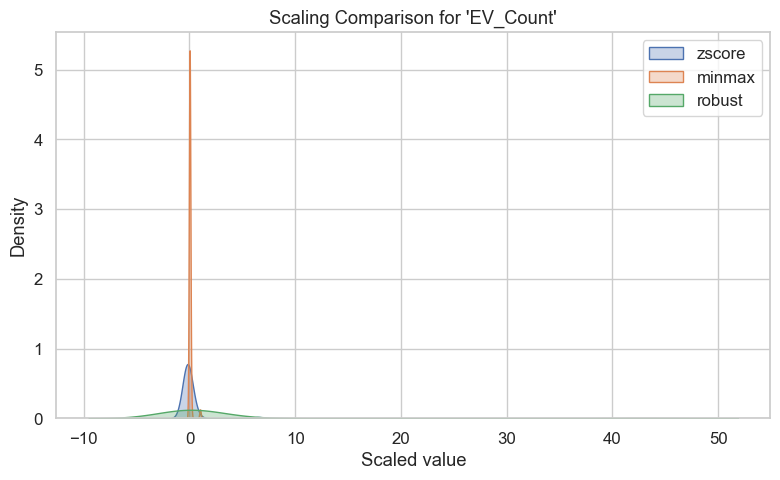

In [65]:
scalers = {
    "zscore": StandardScaler(),
    "minmax": MinMaxScaler(),
    "robust": RobustScaler()
}

scaled_mats = {}
for name, scaler in scalers.items():
    scaled_mats[name] = scaler.fit_transform(X)
    print(f"{name} scaled: mean≈{scaled_mats[name].mean():.3f}, std≈{scaled_mats[name].std():.3f}")

# Quick visual: distribution of one feature under different scalers
feat_idx = 0  # look at first feature for illustration
feat_name = feature_cols[feat_idx]

plt.figure(figsize=(8,5))
for name, mat in scaled_mats.items():
    sns.kdeplot(mat[:, feat_idx], label=name, fill=True, alpha=0.3)

plt.title(f"Scaling Comparison for '{feat_name}'")
plt.xlabel("Scaled value")
plt.legend()
plt.tight_layout()
plt.show()


# PCA


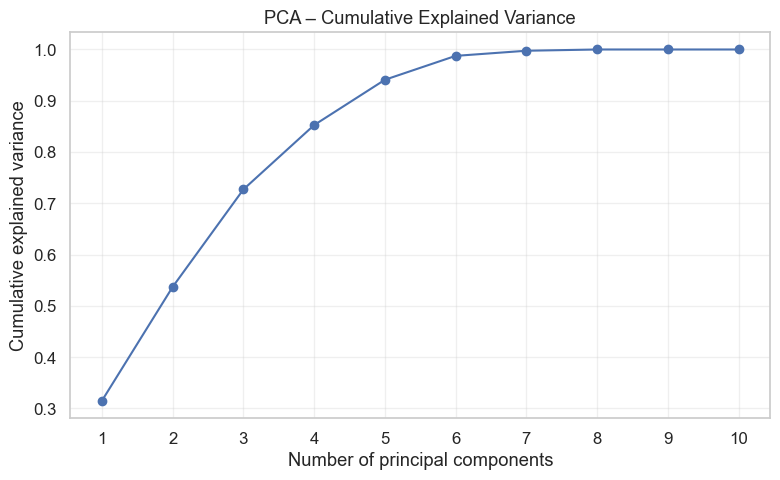

Explained variance per PC:
  PC1: 31.5%
  PC2: 22.2%
  PC3: 19.0%
  PC4: 12.5%
  PC5: 8.8%
  PC6: 4.7%
  PC7: 1.0%
  PC8: 0.2%
  PC9: 0.0%
  PC10: 0.0%


In [66]:
# ---------- 3.1 Standardize & run PCA ----------
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA()   # all components
X_pca = pca.fit_transform(X_std)

explained = pca.explained_variance_ratio_
cum_explained = np.cumsum(explained)

# ---------- 3.2 Explained variance plot ----------
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained)+1), cum_explained, marker="o")
plt.xticks(range(1, len(explained)+1))
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative explained variance")
plt.title("PCA – Cumulative Explained Variance")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Explained variance per PC:")
for i, v in enumerate(explained, start=1):
    print(f"  PC{i}: {v*100:.1f}%")


# SVD

In [67]:
# ---------- 4.1 SVD on standardized feature matrix ----------
U, s, VT = np.linalg.svd(X_std, full_matrices=False)
print("SVD shapes:", U.shape, s.shape, VT.shape)

# Energy captured by each singular value
singular_energy = (s**2) / np.sum(s**2)
print("\nSingular value energy (%):")
for i, e in enumerate(singular_energy, start=1):
    print(f"  s{i}: {e*100:.1f}%")

# ---------- 4.2 Low-rank approximation (k = 2, 3) ----------
for k in [1, 2, 3]:
    X_k = (U[:, :k] * s[:k]) @ VT[:k, :]
    rel_error = np.linalg.norm(X_std - X_k, ord="fro") / np.linalg.norm(X_std, ord="fro")
    print(f"\nLow-rank approximation with k={k}:")
    print(f"  Relative Frobenius error = {rel_error:.4f}")


SVD shapes: (45, 10) (10,) (10, 10)

Singular value energy (%):
  s1: 31.5%
  s2: 22.2%
  s3: 19.0%
  s4: 12.5%
  s5: 8.8%
  s6: 4.7%
  s7: 1.0%
  s8: 0.2%
  s9: 0.0%
  s10: 0.0%

Low-rank approximation with k=1:
  Relative Frobenius error = 0.8276

Low-rank approximation with k=2:
  Relative Frobenius error = 0.6804

Low-rank approximation with k=3:
  Relative Frobenius error = 0.5224


# Machine learning Model

# Regression task

In [69]:
import numpy as np 
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Work on a fresh copy
reg_df = df_knn.copy()

# ---- Target & features ----
target_col = "EV_per_1000_pop"   # make sure this exists in your df
if target_col not in reg_df.columns:
    raise ValueError(f"{target_col} not found in df_knn.columns")

feature_cols = [
    "station_count",
    "Stations_per_100k_pop",
    "median_income",
    "policy_score",
    "renewable_share_pct",
    "bev_share_latest",
    "phev_share_latest",
    "charger_gap",
    "PC1",
    "PC2",
]

# Keep only features that actually exist
feature_cols = [c for c in feature_cols if c in reg_df.columns]
print("Using regression features:", feature_cols)

# Drop rows with missing target
reg_df = reg_df.dropna(subset=[target_col])

X = reg_df[feature_cols].astype(float)
y = reg_df[target_col].astype(float)

# ---- Train / test split ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42
)

print("Train size:", X_train.shape[0], "Test size:", X_test.shape[0])

# ---- Helper to train + evaluate ----
def eval_regressor(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2  = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Older sklearn: no `squared` argument → compute RMSE manually
    mse  = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # 5-fold CV R²
    cv_r2 = cross_val_score(model, X, y, cv=5, scoring="r2").mean()

    print(f"\n[{name}]")
    print(f"  Test R²   : {r2:.3f}")
    print(f"  Test MAE  : {mae:.3f}")
    print(f"  Test RMSE : {rmse:.3f}")
    print(f"  CV(5) R²  : {cv_r2:.3f}")
    return model

# ---- Models ----
lin_reg   = eval_regressor("LinearRegression", LinearRegression())
ridge_reg = eval_regressor("Ridge(alpha=1.0)", Ridge(alpha=1.0))
lasso_reg = eval_regressor("Lasso(alpha=0.01)", Lasso(alpha=0.01, max_iter=10000))
rf_reg    = eval_regressor(
    "RandomForestRegressor",
    RandomForestRegressor(n_estimators=300, random_state=42)
)
gbr_reg   = eval_regressor(
    "GradientBoostingRegressor",
    GradientBoostingRegressor(random_state=42)
)


Using regression features: ['station_count', 'Stations_per_100k_pop', 'median_income', 'policy_score', 'renewable_share_pct', 'bev_share_latest', 'phev_share_latest', 'charger_gap']
Train size: 33 Test size: 12

[LinearRegression]
  Test R²   : 0.188
  Test MAE  : 0.077
  Test RMSE : 0.096
  CV(5) R²  : -0.212

[Ridge(alpha=1.0)]
  Test R²   : 0.207
  Test MAE  : 0.076
  Test RMSE : 0.095
  CV(5) R²  : -0.212

[Lasso(alpha=0.01)]
  Test R²   : 0.309
  Test MAE  : 0.073
  Test RMSE : 0.088
  CV(5) R²  : -0.282

[RandomForestRegressor]
  Test R²   : -5.749
  Test MAE  : 0.136
  Test RMSE : 0.276
  CV(5) R²  : -14.982

[GradientBoostingRegressor]
  Test R²   : -4.098
  Test MAE  : 0.115
  Test RMSE : 0.240
  CV(5) R²  : -21.911


# Classification

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)
from sklearn.model_selection import train_test_split

# Start from your KNN-imputed / cleaned dataframe
clf_df = df_knn.copy()

# 1️⃣ Label: high vs low EV adoption (binary classification target)
threshold = clf_df["EV_per_1000_pop"].median()
clf_df["high_ev"] = (clf_df["EV_per_1000_pop"] >= threshold).astype(int)

# 2️⃣ Features (reuse from regression; assumes `feature_cols` is already defined)
feature_cols_clf = feature_cols   # reuse from previous cell

X = clf_df[feature_cols_clf].astype(float)
y = clf_df["high_ev"].astype(int)

# 3️⃣ Train / test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

# 4️⃣ Helper to train + evaluate classifiers
def eval_classifier(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    f1  = f1_score(y_test, y_pred, average="macro")

    print(f"\n[{name}]")
    print(f"  Accuracy : {acc:.3f}")
    print(f"  Macro F1 : {f1:.3f}")
    print("\nClassification report:\n", classification_report(y_test, y_pred))

    if y_prob is not None:
        auc = roc_auc_score(y_test, y_prob)
        print(f"  ROC AUC  : {auc:.3f}")

    return model, y_pred, y_prob

# 5️⃣ Run models
log_clf, log_pred, log_prob = eval_classifier(
    "LogisticRegression",
    LogisticRegression(max_iter=1000)
)

rf_clf, rf_pred, rf_prob = eval_classifier(
    "RandomForestClassifier",
    RandomForestClassifier(n_estimators=300, random_state=42)
)

# 6️⃣ Confusion matrix for Random Forest (or whichever performs best)
cm = confusion_matrix(y_test, rf_pred)
print("\nRandomForest Confusion Matrix:\n", cm)


c:\Users\palicher\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



[LogisticRegression]
  Accuracy : 0.833
  Macro F1 : 0.829

Classification report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.67      0.80         6

    accuracy                           0.83        12
   macro avg       0.88      0.83      0.83        12
weighted avg       0.88      0.83      0.83        12

  ROC AUC  : 0.972

[RandomForestClassifier]
  Accuracy : 0.917
  Macro F1 : 0.916

Classification report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.83      0.91         6

    accuracy                           0.92        12
   macro avg       0.93      0.92      0.92        12
weighted avg       0.93      0.92      0.92        12

  ROC AUC  : 0.861

RandomForest Confusion Matrix:
 [[6 0]
 [1 5]]


# Regression Model evaluation

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

sns.set(style="whitegrid", font_scale=1.1)

# ---- Collect regression models ----
reg_models = {
    "LinearRegression": lin_reg,
    "Ridge(alpha=1.0)": ridge_reg,
    "Lasso(alpha=0.01)": lasso_reg,
    "RandomForestRegressor": rf_reg,
    "GradientBoostingRegressor": gbr_reg,
}

reg_results = []

for name, model in reg_models.items():
    # Predictions on test set
    y_pred = model.predict(X_test)

    r2   = r2_score(y_test, y_pred)
    mae  = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # 5-fold CV R² on full data
    cv_r2 = cross_val_score(model, X, y, cv=5, scoring="r2").mean()

    reg_results.append({
        "model": name,
        "r2_test": r2,
        "mae_test": mae,
        "rmse_test": rmse,
        "cv_r2": cv_r2,
    })

reg_results_df = pd.DataFrame(reg_results).sort_values("r2_test", ascending=False)
print(" Regression model comparison:")
display(reg_results_df)


 Regression model comparison:


,model,r2_test,mae_test,rmse_test,cv_r2
2,Lasso(alpha=0.01),-0.566076,0.462184,0.625715,-24.165708
1,Ridge(alpha=1.0),-0.570520,0.461351,0.626602,-24.496244
0,LinearRegression,-0.571246,0.461150,0.626747,-24.553870
4,GradientBoostingRegressor,-0.636925,0.458222,0.639712,-0.319903
3,RandomForestRegressor,-0.699635,0.477137,0.651850,-0.047854



Best regression model (by test R²): Lasso(alpha=0.01)


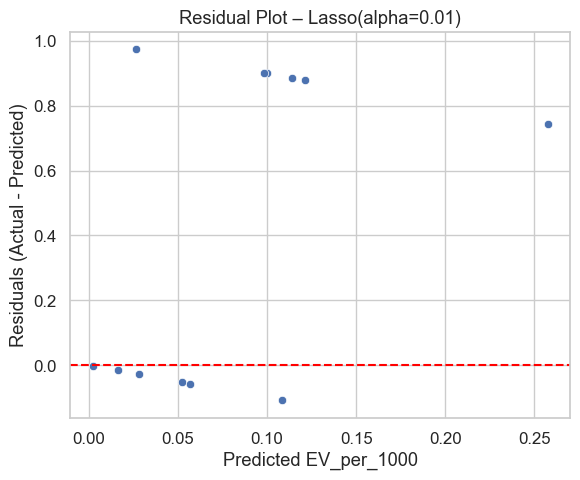

In [74]:
# Pick best by test R²
best_row = reg_results_df.iloc[0]
best_name = best_row["model"]
best_model = reg_models[best_name]

print(f"\nBest regression model (by test R²): {best_name}")

y_pred_best = best_model.predict(X_test)
residuals = y_test - y_pred_best

plt.figure(figsize=(6,5))
sns.scatterplot(x=y_pred_best, y=residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted EV_per_1000")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title(f"Residual Plot – {best_name}")
plt.tight_layout()
plt.show()


# Classification Model Evaluation

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

# We already have: log_clf, rf_clf, log_pred, rf_pred, log_prob, rf_prob, y_test

# ---- 1. Metrics table ----
clf_results = []

def clf_metrics(name, y_true, y_pred, y_prob=None):
    acc = accuracy_score(y_true, y_pred)
    f1  = f1_score(y_true, y_pred, average="macro")
    res = {"model": name, "accuracy": acc, "macro_f1": f1}

    if y_prob is not None:
        auc = roc_auc_score(y_true, y_prob)
        res["roc_auc"] = auc
    else:
        res["roc_auc"] = np.nan

    return res

clf_results.append(clf_metrics("LogisticRegression", y_test, log_pred, log_prob))
clf_results.append(clf_metrics("RandomForestClassifier", y_test, rf_pred, rf_prob))

clf_results_df = pd.DataFrame(clf_results)
print(" Classification model comparison:")
display(clf_results_df)


🧪 Classification model comparison:


,model,accuracy,macro_f1,roc_auc
0,LogisticRegression,0.833333,0.828571,0.972222
1,RandomForestClassifier,0.916667,0.916084,0.861111


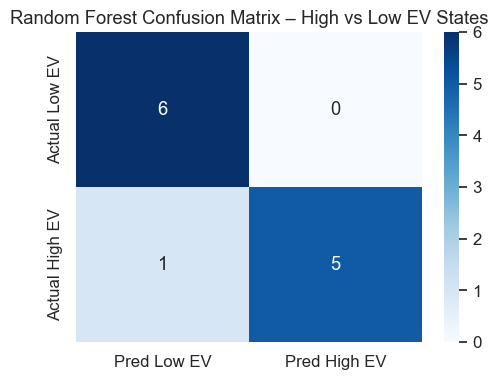


Classification report – Random Forest:
              precision    recall  f1-score   support

      Low EV       0.86      1.00      0.92         6
     High EV       1.00      0.83      0.91         6

    accuracy                           0.92        12
   macro avg       0.93      0.92      0.92        12
weighted avg       0.93      0.92      0.92        12



In [77]:
cm = confusion_matrix(y_test, rf_pred)
cm_df = pd.DataFrame(
    cm,
    index=["Actual Low EV", "Actual High EV"],
    columns=["Pred Low EV", "Pred High EV"]
)

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix – High vs Low EV States")
plt.tight_layout()
plt.show()

print("\nClassification report – Random Forest:")
print(classification_report(y_test, rf_pred, target_names=["Low EV", "High EV"]))


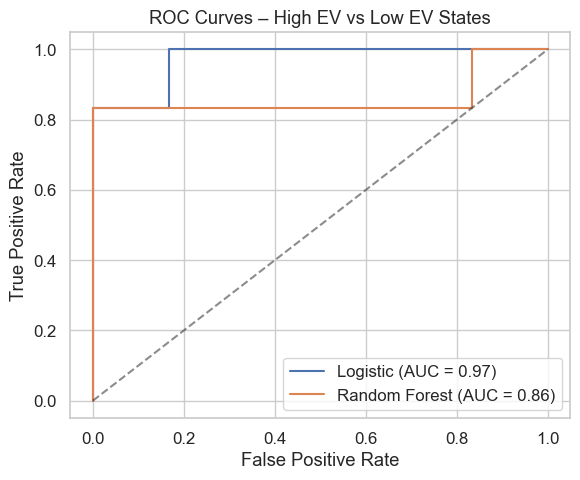

In [78]:
plt.figure(figsize=(6,5))

# Logistic Regression ROC
fpr_log, tpr_log, _ = roc_curve(y_test, log_prob)
auc_log = roc_auc_score(y_test, log_prob)
plt.plot(fpr_log, tpr_log, label=f"Logistic (AUC = {auc_log:.2f})")

# Random Forest ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_prob)
auc_rf = roc_auc_score(y_test, rf_prob)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")

plt.plot([0,1], [0,1], "k--", alpha=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – High EV vs Low EV States")
plt.legend()
plt.tight_layout()
plt.show()


# Advanced Modelling Techniques

## Hyperparameter optimization

# RandomForestRegressor & RandomForestclassifier

In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from scipy.stats import randint, uniform

# Reuse X, y from your regression block (EV_per_1000_pop target)
print("Hyperparameter tuning for RandomForestRegressor...")

rf_base = RandomForestRegressor(random_state=42)

param_dist_reg = {
    "n_estimators": randint(200, 600),
    "max_depth": randint(3, 15),
    "min_samples_split": randint(2, 10),
    "min_samples_leaf": randint(1, 5),
    "max_features": ["auto", "sqrt", 0.5]
}

cv_reg = KFold(n_splits=5, shuffle=True, random_state=42)

rf_rand_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist_reg,
    n_iter=30,
    cv=cv_reg,
    scoring="r2",
    n_jobs=-1,
    random_state=42,
    verbose=1
)

rf_rand_search.fit(X, y)

print("\nBest RF regressor params:")
print(rf_rand_search.best_params_)
print("Best CV R²:", rf_rand_search.best_score_)

rf_reg_tuned = rf_rand_search.best_estimator_


Hyperparameter tuning for RandomForestRegressor...
Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\palicher\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
40 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
29 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\palicher\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\palicher\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  F


Best RF regressor params:
{'max_depth': 10, 'max_features': 0.5, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 457}
Best CV R²: -0.24739960263762958


In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

print("\nHyperparameter tuning for RandomForestClassifier...")

# Rebuild classification frame quickly
clf_df = df_knn.copy()
threshold = clf_df["EV_per_1000_pop"].median()
clf_df["high_ev"] = (clf_df["EV_per_1000_pop"] >= threshold).astype(int)

X_clf = clf_df[feature_cols].astype(float)
y_clf = clf_df["high_ev"].astype(int)

rf_clf_base = RandomForestClassifier(random_state=42)

param_dist_clf = {
    "n_estimators": randint(200, 600),
    "max_depth": randint(3, 15),
    "min_samples_split": randint(2, 10),
    "min_samples_leaf": randint(1, 5),
    "max_features": ["auto", "sqrt", 0.5]
}

cv_clf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf_clf_search = RandomizedSearchCV(
    estimator=rf_clf_base,
    param_distributions=param_dist_clf,
    n_iter=30,
    cv=cv_clf,
    scoring="f1_macro",
    n_jobs=-1,
    random_state=42,
    verbose=1
)

rf_clf_search.fit(X_clf, y_clf)

print("\nBest RF classifier params:")
print(rf_clf_search.best_params_)
print("Best CV macro F1:", rf_clf_search.best_score_)

rf_clf_tuned = rf_clf_search.best_estimator_



Hyperparameter tuning for RandomForestClassifier...
Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\palicher\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
40 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
13 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\palicher\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\palicher\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  F


Best RF classifier params:
{'max_depth': 14, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 467}
Best CV macro F1: 0.6411111111111111


# PCA (linear regression + logistics regression)

In [81]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression

# -------- Common numeric feature matrix --------
num_cols_for_pca = [
    "EV_per_1000_pop",
    "station_count",
    "Stations_per_100k_pop",
    "median_income",
    "policy_score",
    "renewable_share_pct",
    "bev_share_latest",
    "phev_share_latest",
    "charger_gap",
]

num_cols_for_pca = [c for c in num_cols_for_pca if c in df_knn.columns]
print("PCA numeric features:", num_cols_for_pca)

pca_df = df_knn.dropna(subset=num_cols_for_pca).copy()
X_num = pca_df[num_cols_for_pca].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

pca = PCA(n_components=2, random_state=42)
X_pcs = pca.fit_transform(X_scaled)

pca_df["PC1_pca"] = X_pcs[:, 0]
pca_df["PC2_pca"] = X_pcs[:, 1]

print("PCA explained variance ratios:", pca.explained_variance_ratio_)
print("Total explained variance (PC1+PC2):", pca.explained_variance_ratio_.sum())


PCA numeric features: ['EV_per_1000_pop', 'station_count', 'Stations_per_100k_pop', 'median_income', 'policy_score', 'renewable_share_pct', 'bev_share_latest', 'phev_share_latest', 'charger_gap']
PCA explained variance ratios: [0.27211727 0.2460221 ]
Total explained variance (PC1+PC2): 0.5181393698455061


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_reg_pca = pca_df["EV_per_1000_pop"].astype(float)
X_reg_pca = pca_df[["PC1_pca", "PC2_pca"]].values

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_reg_pca, y_reg_pca, test_size=0.25, random_state=42
)

lin_pca = LinearRegression()
lin_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = lin_pca.predict(X_test_pca)

r2_pca = r2_score(y_test_pca, y_pred_pca)
mae_pca = mean_absolute_error(y_test_pca, y_pred_pca)
rmse_pca = np.sqrt(mean_squared_error(y_test_pca, y_pred_pca))

print("\nPCA + Linear Regression:")
print(f"  R²   = {r2_pca:.3f}")
print(f"  MAE  = {mae_pca:.3f}")
print(f"  RMSE = {rmse_pca:.3f}")



PCA + Linear Regression:
  R²   = -1.784
  MAE  = 0.133
  RMSE = 0.177


In [83]:
# High vs low EV label
threshold = pca_df["EV_per_1000_pop"].median()
pca_df["high_ev"] = (pca_df["EV_per_1000_pop"] >= threshold).astype(int)

X_clf_pca = pca_df[["PC1_pca", "PC2_pca"]].values
y_clf_pca = pca_df["high_ev"].values

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_clf_pca, y_clf_pca, test_size=0.25, random_state=42, stratify=y_clf_pca
)

log_pca = LogisticRegression(max_iter=1000)
log_pca.fit(X_train_c, y_train_c)
y_pred_c = log_pca.predict(X_test_c)

print("\nPCA + Logistic Regression:")
print("  Accuracy:", accuracy_score(y_test_c, y_pred_c))
print("  Macro F1:", f1_score(y_test_c, y_pred_c, average='macro'))
print("\nClassification report:\n", classification_report(y_test_c, y_pred_c))



PCA + Logistic Regression:
  Accuracy: 0.6666666666666666
  Macro F1: 0.6571428571428571

Classification report:
               precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       0.75      0.50      0.60         6

    accuracy                           0.67        12
   macro avg       0.69      0.67      0.66        12
weighted avg       0.69      0.67      0.66        12



# K-means clustering

In [85]:
from sklearn.cluster import KMeans

cluster_cols = [
    "EV_per_1000_pop",
    "Stations_per_100k_pop",
    "median_income",
    "policy_score",
    "renewable_share_pct",
]

cluster_cols = [c for c in cluster_cols if c in df_knn.columns]
print("Clustering features:", cluster_cols)

clust_df = df_knn.dropna(subset=cluster_cols).copy()

scaler_clust = StandardScaler()
X_clust = scaler_clust.fit_transform(clust_df[cluster_cols].values)

k = 3  # you can play with 3–5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clust_df["cluster_k3"] = kmeans.fit_predict(X_clust)

print("\nCluster counts:")
print(clust_df["cluster_k3"].value_counts())

print("\nCluster centers (in original feature scale):")
centers_scaled = kmeans.cluster_centers_
centers_original = scaler_clust.inverse_transform(centers_scaled)
centers_df = pd.DataFrame(centers_original, columns=cluster_cols)
centers_df["cluster"] = range(k)
display(centers_df)

cluster_summary = clust_df.groupby("cluster_k3")[["EV_per_1000_pop", "policy_score", "Stations_per_100k_pop"]].mean()
print("\nCluster profile summary:")
display(cluster_summary)



Clustering features: ['EV_per_1000_pop', 'Stations_per_100k_pop', 'median_income', 'policy_score', 'renewable_share_pct']

Cluster counts:
cluster_k3
0    27
1    17
2     1
Name: count, dtype: int64

Cluster centers (in original feature scale):


,EV_per_1000_pop,Stations_per_100k_pop,median_income,policy_score,renewable_share_pct,cluster
0,0.049270,1.289032,74390.0,21.351852,10.272422,0
1,0.139782,2.823865,94601.0,44.882353,5.774191,1
2,2.797388,1.669426,99389.0,69.000000,5.501035,2



Cluster profile summary:


,EV_per_1000_pop,policy_score,Stations_per_100k_pop
cluster_k3,,,
0,0.049270,21.351852,1.289032
1,0.139782,44.882353,2.823865
2,2.797388,69.000000,1.669426


# Fiarness-style Group performance 

In [86]:
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

#  Rebuild classification frame with region / policy_quartile / income_quartile
fair_df = df_knn.copy()

# EV adoption label
threshold = fair_df["EV_per_1000_pop"].median()
fair_df["high_ev"] = (fair_df["EV_per_1000_pop"] >= threshold).astype(int)

# ---- Policy & income quartiles ----
fair_df["policy_quartile"] = pd.qcut(
    fair_df["policy_score"],
    4,
    labels=["Q1 Low", "Q2", "Q3", "Q4 High"]
)

fair_df["income_quartile"] = pd.qcut(
    fair_df["median_income"],
    4,
    labels=["Q1 Low", "Q2", "Q3", "Q4 High"]
)

# ---- Region (reuse mapping) ----
usps_col = None
for c in ["state_usps_x", "state_usps_y", "state_usps"]:
    if c in fair_df.columns:
        usps_col = c
        break

if usps_col is None:
    raise ValueError("No state_usps column found for region mapping.")

fair_df[usps_col] = fair_df[usps_col].astype(str).str.upper().str.strip()

northeast = {"ME","NH","VT","MA","RI","CT","NY","NJ","PA"}
midwest   = {"OH","MI","IN","IL","WI","MN","IA","MO","ND","SD","NE","KS"}
south     = {"DE","MD","DC","VA","WV","NC","SC","GA","FL","KY","TN","AL","MS","AR","LA","OK","TX"}
west      = {"MT","ID","WY","CO","NM","AZ","UT","NV","WA","OR","CA","AK","HI"}

def region(usps):
    if usps in northeast: return "Northeast"
    if usps in midwest:   return "Midwest"
    if usps in south:     return "South"
    if usps in west:      return "West"
    return "Other"

fair_df["region"] = fair_df[usps_col].map(region)

#  Train a classifier on the whole dataset (for fairness analysis)
fair_features = feature_cols  # same as before
X_fair = fair_df[fair_features].astype(float)
y_fair = fair_df["high_ev"].astype(int)

rf_fair = RandomForestClassifier(n_estimators=300, random_state=42)
rf_fair.fit(X_fair, y_fair)
fair_df["pred_high_ev"] = rf_fair.predict(X_fair)

#  Group-based performance helper
def group_metrics(df, group_col):
    rows = []
    for g, sub in df.groupby(group_col):
        if len(sub) < 3:
            continue
        acc = accuracy_score(sub["high_ev"], sub["pred_high_ev"])
        f1  = f1_score(sub["high_ev"], sub["pred_high_ev"], average="binary")
        rows.append({"group": g, "n_states": len(sub), "accuracy": acc, "f1": f1})
    return pd.DataFrame(rows).sort_values("accuracy", ascending=False)

print("\n Region-wise performance:")
display(group_metrics(fair_df, "region"))

print("\n Policy quartile-wise performance:")
display(group_metrics(fair_df, "policy_quartile"))

print("\n Income quartile-wise performance:")
display(group_metrics(fair_df, "income_quartile"))



 Region-wise performance:


,group,n_states,accuracy,f1
0,Midwest,9,1.0,1.0
1,Northeast,8,1.0,1.0
2,South,16,1.0,1.0
3,West,12,1.0,1.0



 Policy quartile-wise performance:


C:\Users\palicher\AppData\Local\Temp\ipykernel_22404\3663511266.py:62: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for g, sub in df.groupby(group_col):


,group,n_states,accuracy,f1
0,Q1 Low,13,1.0,1.0
1,Q2,10,1.0,1.0
2,Q3,11,1.0,1.0
3,Q4 High,11,1.0,1.0



 Income quartile-wise performance:


C:\Users\palicher\AppData\Local\Temp\ipykernel_22404\3663511266.py:62: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for g, sub in df.groupby(group_col):


,group,n_states,accuracy,f1
0,Q1 Low,12,1.0,1.0
1,Q2,11,1.0,1.0
2,Q3,11,1.0,1.0
3,Q4 High,11,1.0,1.0


# Feature Importance + Permutation Importance

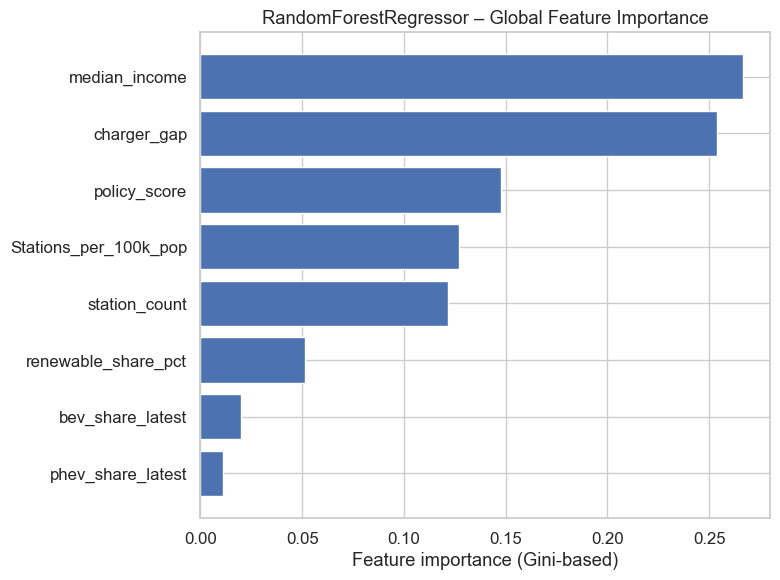

median_income            0.266841
charger_gap              0.254108
policy_score             0.147736
Stations_per_100k_pop    0.127162
station_count            0.121689
renewable_share_pct      0.051558
bev_share_latest         0.019714
phev_share_latest        0.011192
dtype: float64


In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Use whichever RF regressor you ended up liking best
rf_model = rf_reg_tuned if "rf_reg_tuned" in globals() else rf_reg

importances = pd.Series(
    rf_model.feature_importances_,
    index=feature_cols
).sort_values(ascending=True)  # ascending for nice barh plot

plt.figure(figsize=(8,6))
plt.barh(importances.index, importances.values)
plt.xlabel("Feature importance (Gini-based)")
plt.title("RandomForestRegressor – Global Feature Importance")
plt.tight_layout()
plt.show()

print(importances.sort_values(ascending=False))


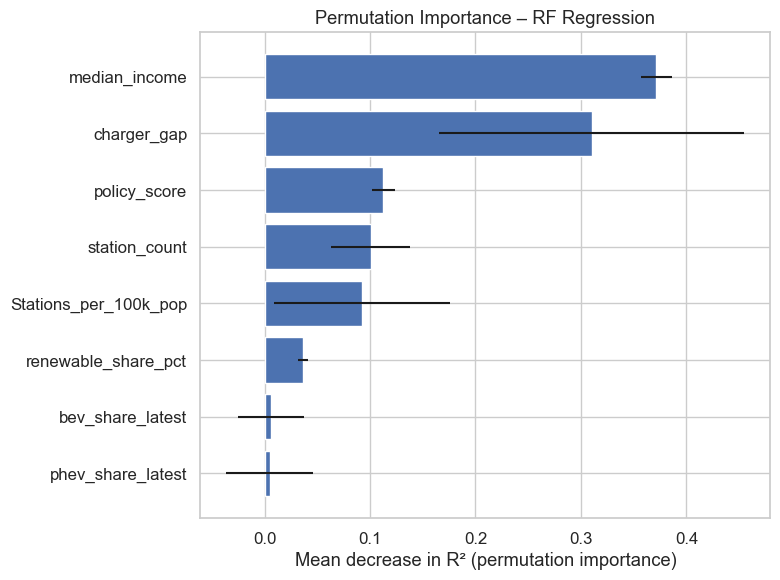

median_income            0.371227
charger_gap              0.310082
policy_score             0.112463
station_count            0.100631
Stations_per_100k_pop    0.092276
renewable_share_pct      0.036525
bev_share_latest         0.006460
phev_share_latest        0.005070
dtype: float64


In [88]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    rf_model,
    X_test,
    y_test,
    n_repeats=30,
    random_state=42
)

perm_mean = result.importances_mean
perm_std  = result.importances_std

perm_series = pd.Series(perm_mean, index=feature_cols).sort_values(ascending=True)

plt.figure(figsize=(8,6))
plt.barh(perm_series.index, perm_series.values, xerr=perm_std[perm_series.index.argsort()])
plt.xlabel("Mean decrease in R² (permutation importance)")
plt.title("Permutation Importance – RF Regression")
plt.tight_layout()
plt.show()

print(perm_series.sort_values(ascending=False))
